# Multiple Linear Regression
## Housing Price Prediction - Assignment
### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

#### The solution is divided into the following sections:

- Data understanding and exploration
    - Understanding
    - Missing Value Treatment
    - Outlier Detection
- Data Visualisation
- Data preparation
- Model building and evaluation
    - Linear Model
    - RFE and then linear model with 20 features
    - Ridge
    - Lasso
    - Summary
- Questions solved

# 1. Data understanding and exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### In this dataframe there are many valid NA values which should not be treated as NaNs

In [2]:
df = pd.read_csv('train.csv', keep_default_na=False, na_values=['-1.#IND', '1.#QNAN', '1.#IND', '-1.#QNAN', '#N/A N/A', '#N/A', 'N/A', 'n/a', '', '#NA', 'NULL', 'null', 'NaN', '-NaN', 'nan', '-nan', ''])

In [3]:
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
pd.options.display.max_columns=None

In [5]:
df.head()

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0        196        Gd        TA      PConc       Gd       TA           No   
1          0        TA        TA     CBlock       Gd       TA           Gd   
2        162        Gd        TA      PConc       Gd       TA           Mn   
3          0        TA        TA     BrkTil       TA       Gd           No   
4        350        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Ty

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Missing value treatment

### Here we will check the missing values based on what are the acceptable values as per data dictionaries

In [9]:
for col in df.columns:
#     print(df[col].dtype, type(df[col].dtype), isinstance(df[col].dtype, np.dtype.int64))
    if df[col].dtype!=np.int64:
        print(col)
        print(df[col].value_counts())

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
LotFrontage
NA     259
60     143
70      70
80      69
50      57
      ... 
137      1
38       1
33       1
150      1
46       1
Name: LotFrontage, Length: 111, dtype: int64
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
Alley
NA      1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74


#### columns requiring missing values treatment
#### LotFrontage, MasVnrType, MasVnrArea, Electrical, GarageYrBlt

In [10]:
####### LotFrontage
df.LotFrontage.replace('NA', np.nan, inplace=True)  # here NA is actually NaNs
df.LotFrontage = df.LotFrontage.astype('float')

In [11]:
df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [13]:
# we should replace the missing value with median but since mean and median are close and most of the values\
# are multiples of 5, we replace the missing value with 70
df.LotFrontage.fillna(70, inplace=True)

In [14]:
######### MasVnrType
df.MasVnrType.replace('NA', np.nan, inplace=True)  # here NA is actually NaNs
df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [15]:
# we replace the missing value with the mode value: None
df.MasVnrType.fillna('None', inplace=True)

In [16]:
####### MasVnrArea
df.MasVnrArea.replace('NA', np.nan, inplace=True)  # here NA is actually NaNs
df.MasVnrArea = df.MasVnrArea.astype('float')

In [17]:
df[df.MasVnrType=='None'].MasVnrArea.value_counts()

0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

In [18]:
# since most of the MasVnrType==None have MasVnrArea as 0, we replace the missing MasVnrArea with 0
df.MasVnrArea.fillna(0, inplace=True)

In [19]:
######## Electrical
df.Electrical.replace('NA', np.nan, inplace=True)  # here NA is actually NaNs
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [20]:
# here also we replace the missing values with the mdoe: SBrkr
df.Electrical.fillna('SBrkr', inplace=True)

In [21]:
######### GarageYrBlt
df.GarageYrBlt.value_counts()

NA      81
2005    65
2006    59
2004    53
2003    50
        ..
1927     1
1900     1
1906     1
1908     1
1933     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [22]:
# here we cannot replace the GarageYrBlt with mean or median as no garage is present but we need numerical data in this coulmn.
# Thus, i choose to replace this columns missing values with the YearRemodAdd i.e. the remodeling year of the house
df.GarageYrBlt.replace('NA', np.nan, inplace=True)
df.GarageYrBlt.fillna(df.YearRemodAdd, inplace=True)
df.GarageYrBlt = df.GarageYrBlt.astype(np.int64)

In [23]:
df.isnull().sum().sum()  # total null values are 0

0

## convert numerical columns which are coming as object into numerical

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [25]:
# drop Id as it is not a feature
Id = df.pop('Id')
Id

0          1
1          2
2          3
3          4
4          5
        ... 
1455    1456
1456    1457
1457    1458
1458    1459
1459    1460
Name: Id, Length: 1460, dtype: int64

#### All the columns have correct data type

## Outlier Detection

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [27]:
df_orig = df.copy()

<AxesSubplot:>

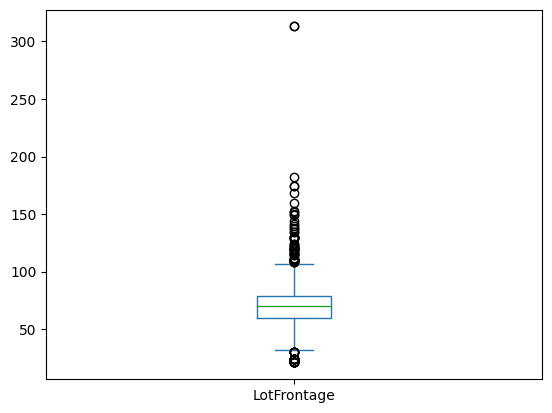

In [28]:
#### LotFrontage
df.LotFrontage.plot.box()

In [29]:
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr
    df = df.loc[(df[col_name]>=lower_lim) & (df[col_name] <= upper_lim)]
    return df

In [30]:
def percent_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1
    lower_lim = q1 - 1.5 * iqr
    upper_lim = q3 + 1.5 * iqr
    per = (1- df.loc[(df[col_name]>=lower_lim) & (df[col_name] <= upper_lim)].shape[0]/df.shape[0])*100
    return per

In [31]:
percent_outliers(df, 'LotFrontage')

7.260273972602738

In [32]:
df['log_LotFrontage'] = np.log(df.LotFrontage)

In [33]:
percent_outliers(df, 'log_LotFrontage')

8.42465753424657

#### here log transformation doesnt help and outlier percentage increases because of it. so we drop the log transformed column

In [34]:
df.drop('log_LotFrontage', axis=1, inplace=True)

In [35]:
df = remove_outliers(df, 'LotFrontage')
df.shape

(1354, 80)

<AxesSubplot:>

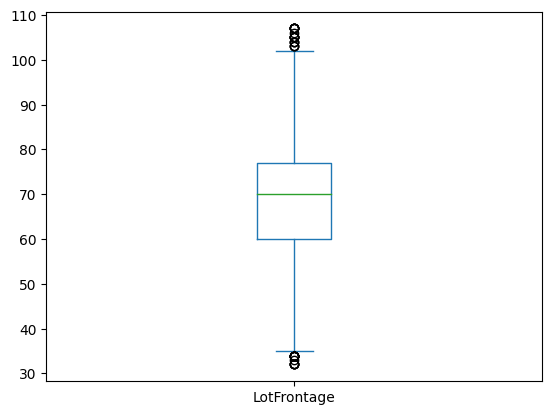

In [36]:
df.LotFrontage.plot.box()

<AxesSubplot:ylabel='Frequency'>

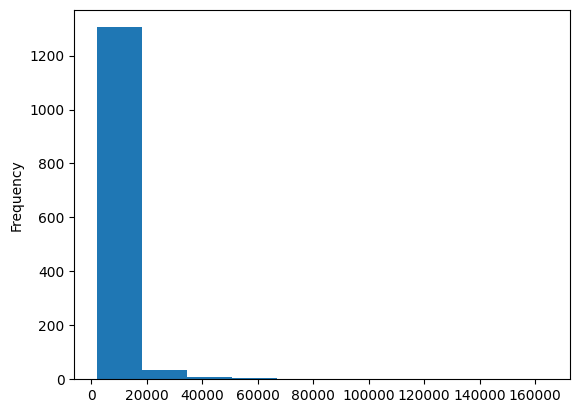

In [37]:
##### LotArea
df.LotArea.plot.hist()

<AxesSubplot:>

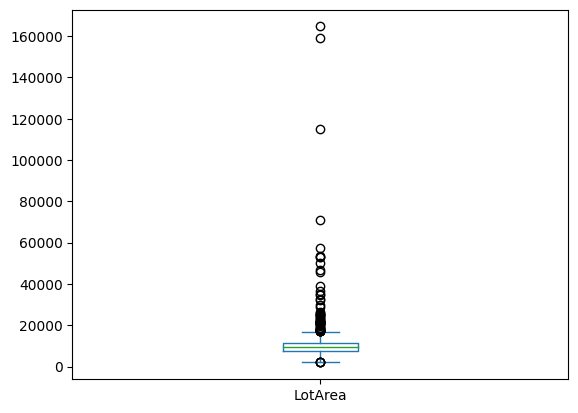

In [38]:
df.LotArea.plot.box()

In [39]:
percent_outliers(df, 'LotArea')

4.87444608567208

In [40]:
df['log_LotArea'] = np.log(df.LotArea)
percent_outliers(df, 'log_LotArea')

7.976366322008865

<AxesSubplot:>

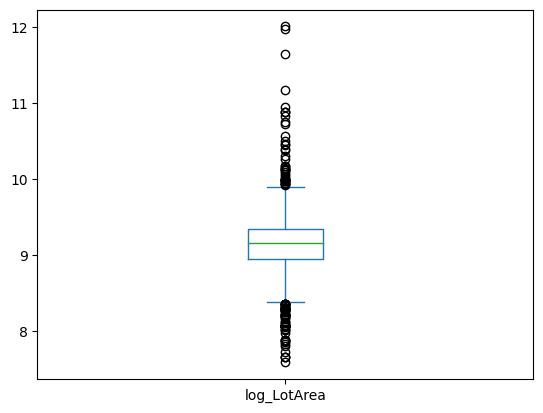

In [41]:
df.log_LotArea.plot.box()

#### here also log transformation doesnt help and outlier percentage increases because of it. so we drop the log transformed column

In [42]:
df.drop('log_LotArea', axis=1, inplace=True)

In [43]:
df = remove_outliers(df, 'LotArea')
df.shape

(1288, 80)

<AxesSubplot:>

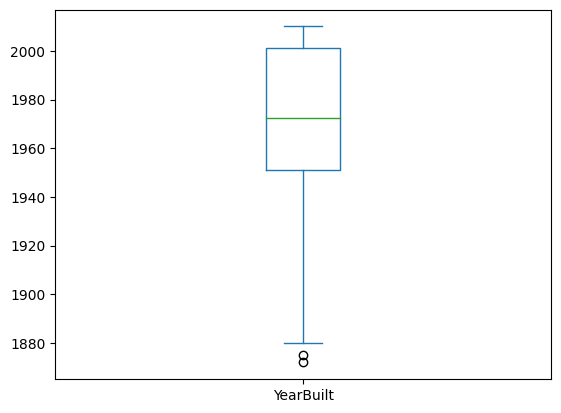

In [44]:
##### YearBuilt
df.YearBuilt.plot.box()  # the outlier is not a lot so ignoring it

<AxesSubplot:>

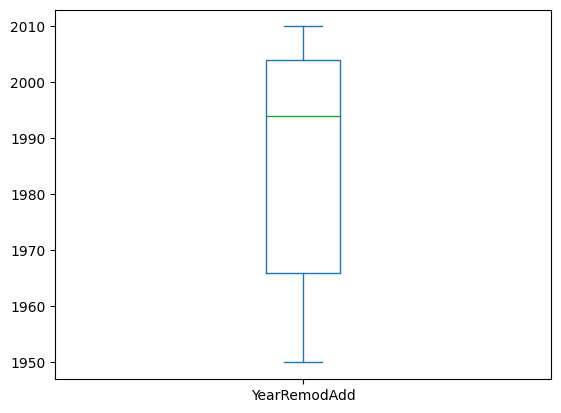

In [45]:
#### YearRemodAdd
df.YearRemodAdd.plot.box()

<AxesSubplot:>

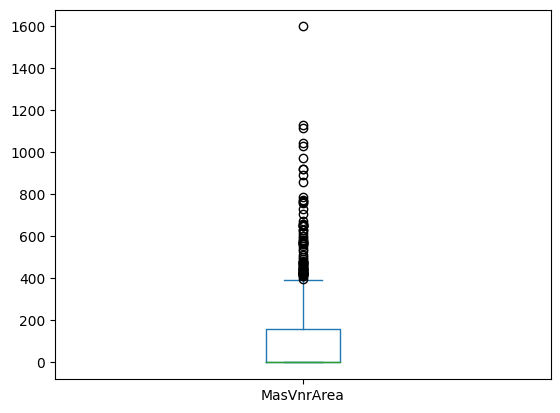

In [46]:
##### MasVnrArea
df.MasVnrArea.plot.box()

In [47]:
df = remove_outliers(df, 'MasVnrArea')
df.shape

(1209, 80)

<AxesSubplot:>

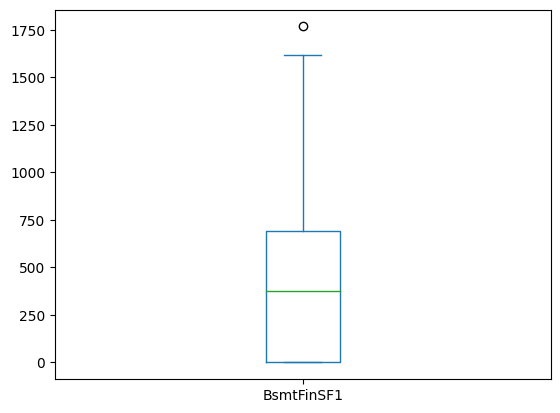

In [48]:
##### BsmtFinSF1
df.BsmtFinSF1.plot.box()

In [49]:
df = remove_outliers(df, 'BsmtFinSF1')
df.shape

(1208, 80)

<AxesSubplot:>

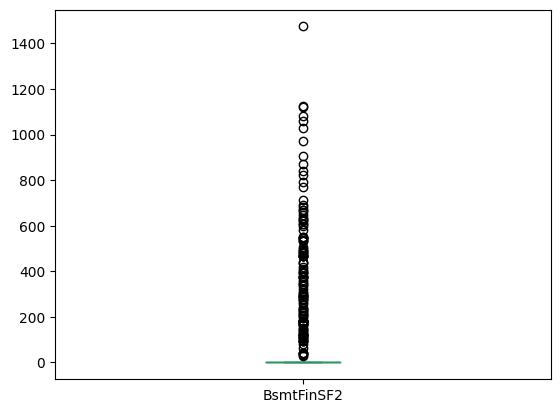

In [50]:
##### BsmtFinSF2
df.BsmtFinSF2.plot.box()

In [51]:
df = remove_outliers(df, 'BsmtFinSF2')
df.shape

(1072, 80)

<AxesSubplot:>

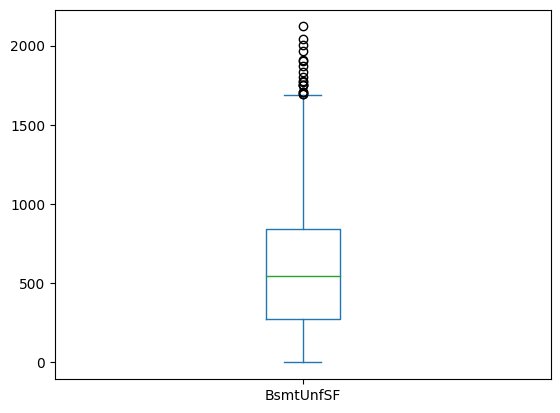

In [52]:
##### BsmtUnfSF
df.BsmtUnfSF.plot.box()

In [53]:
df = remove_outliers(df, 'BsmtUnfSF')
df.shape

(1054, 80)

<AxesSubplot:>

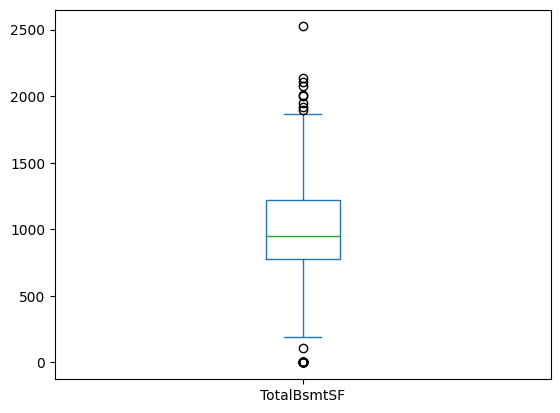

In [54]:
##### TotalBsmtSF
df.TotalBsmtSF.plot.box()

In [55]:
df = remove_outliers(df, 'TotalBsmtSF')
df.shape

(1010, 80)

<AxesSubplot:>

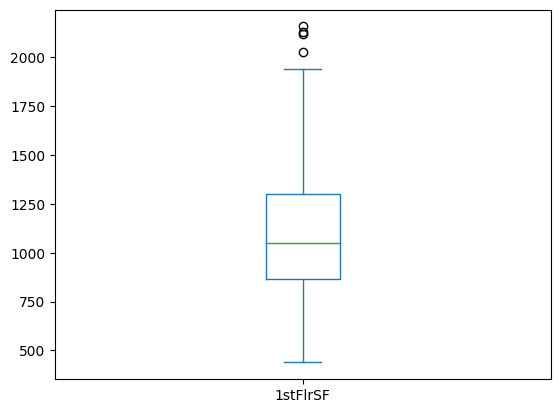

In [56]:
##### 1stFlrSF
df['1stFlrSF'].plot.box()

In [57]:
df = remove_outliers(df, '1stFlrSF')
df.shape

(1006, 80)

<AxesSubplot:>

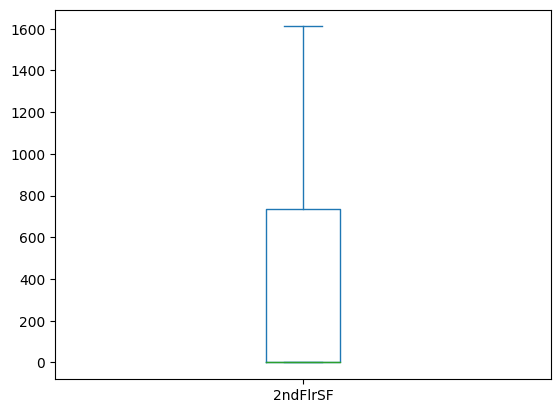

In [58]:
##### 2ndFlrSF
df['2ndFlrSF'].plot.box()

<AxesSubplot:>

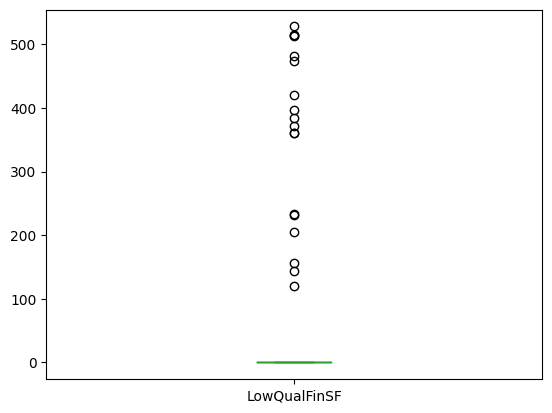

In [59]:
##### LowQualFinSF
df['LowQualFinSF'].plot.box()

In [60]:
df = remove_outliers(df, 'LowQualFinSF')
df.shape

(988, 80)

<AxesSubplot:>

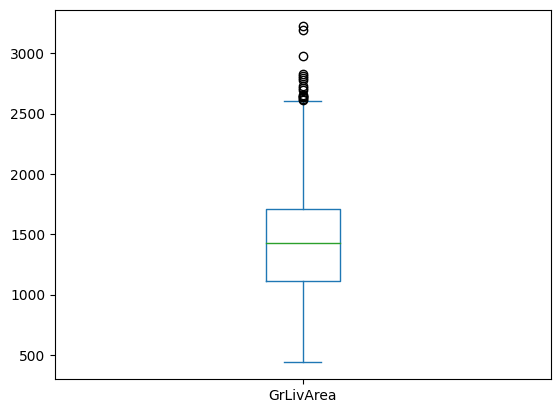

In [61]:
##### GrLivArea
df['GrLivArea'].plot.box()

In [62]:
df = remove_outliers(df, 'GrLivArea')
df.shape

(972, 80)

<AxesSubplot:>

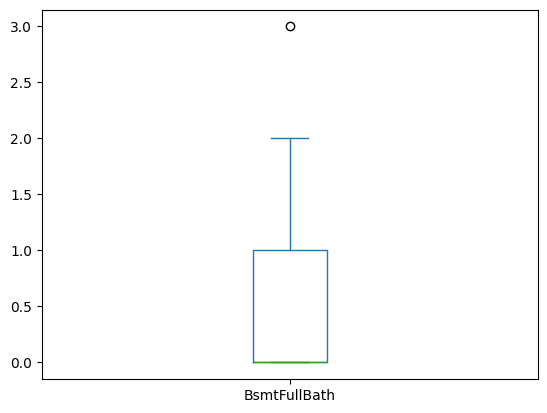

In [63]:
##### BsmtFullBath
df['BsmtFullBath'].plot.box()  # not handling outlier for this

<AxesSubplot:>

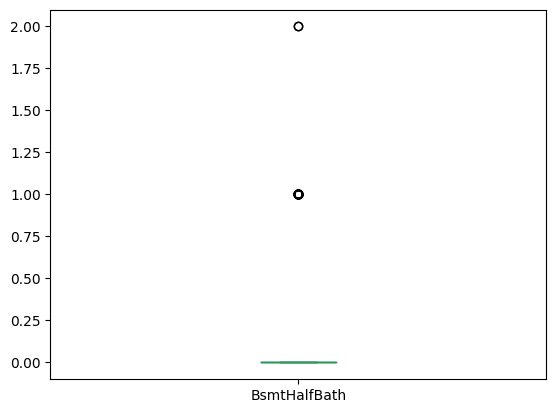

In [64]:
##### BsmtHalfBath
df['BsmtHalfBath'].plot.box()  # not handling outlier for this

<AxesSubplot:>

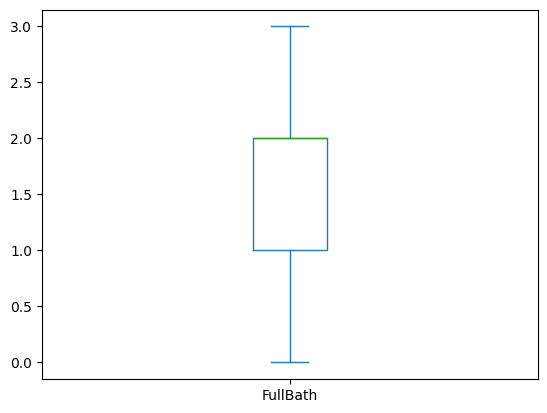

In [65]:
##### FullBath
df['FullBath'].plot.box()

<AxesSubplot:>

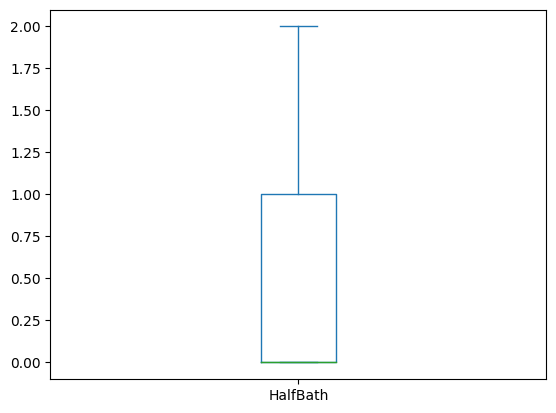

In [66]:
##### HalfBath
df['HalfBath'].plot.box()

<AxesSubplot:>

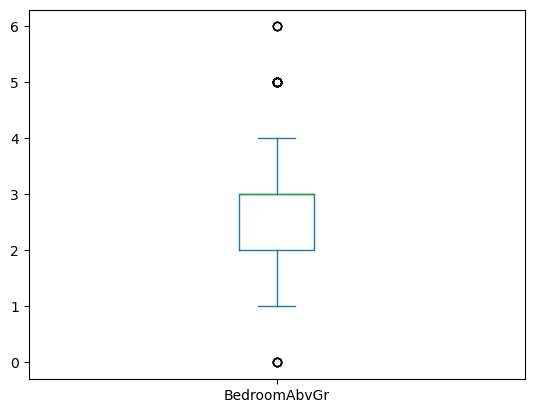

In [67]:
##### BedroomAbvGr
df.BedroomAbvGr.plot.box()

In [68]:
df = remove_outliers(df, 'BedroomAbvGr')
df.shape

(954, 80)

<AxesSubplot:>

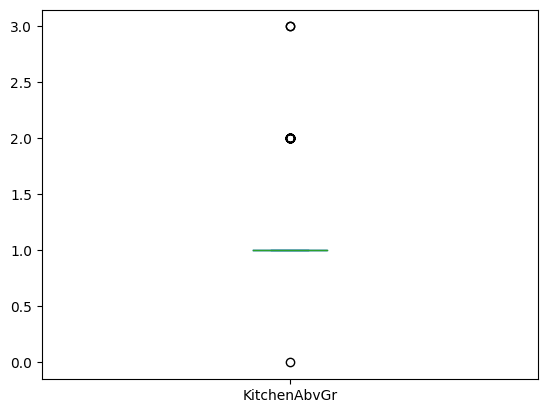

In [69]:
##### KitchenAbvGr
df.KitchenAbvGr.plot.box()

In [70]:
df = remove_outliers(df, 'KitchenAbvGr')
df.shape

(923, 80)

<AxesSubplot:>

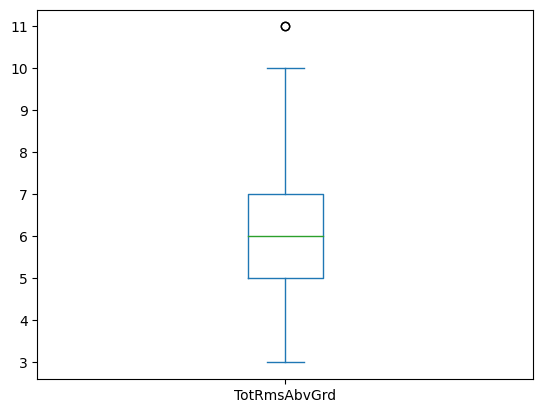

In [71]:
##### TotRmsAbvGrd
df.TotRmsAbvGrd.plot.box()

In [72]:
df = remove_outliers(df, 'TotRmsAbvGrd')
df.shape

(921, 80)

<AxesSubplot:>

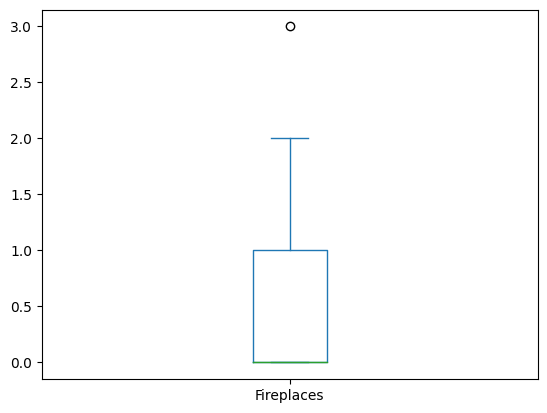

In [73]:
##### Fireplaces
df.Fireplaces.plot.box()  # not handling outlier for this as it is a single point and not very far

<AxesSubplot:>

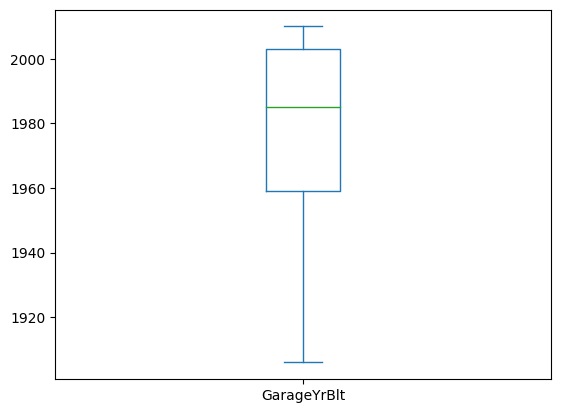

In [74]:
##### GarageYrBlt
df.GarageYrBlt.plot.box()

<AxesSubplot:>

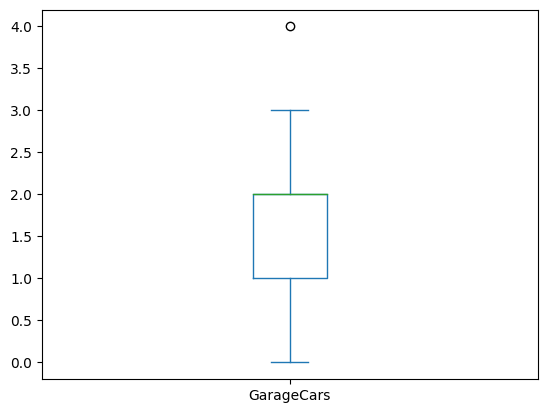

In [75]:
##### GarageCars
df.GarageCars.plot.box()  # not handling outlier for this as it is a single point and not very far

<AxesSubplot:>

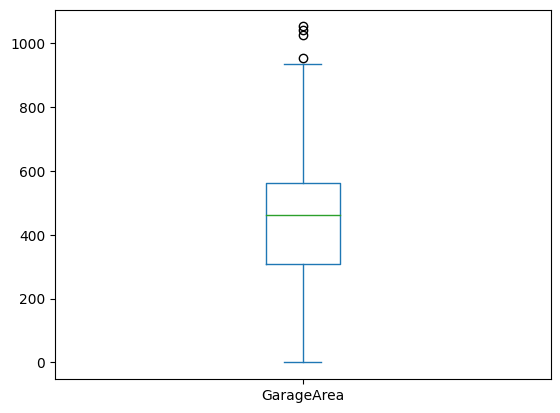

In [76]:
##### GarageArea
df.GarageArea.plot.box()

In [77]:
df = remove_outliers(df, 'GarageArea')
df.shape

(917, 80)

<AxesSubplot:>

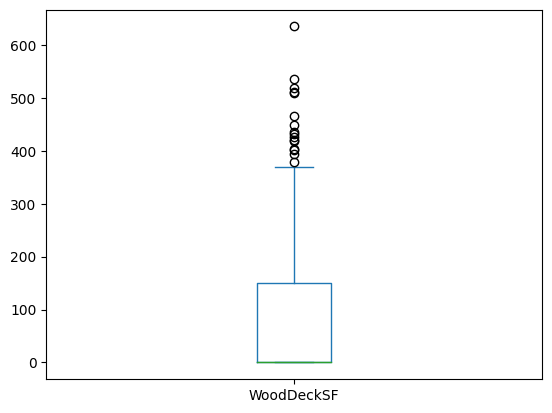

In [78]:
##### WoodDeckSF
df.WoodDeckSF.plot.box()

In [79]:
df = remove_outliers(df, 'WoodDeckSF')
df.shape

(901, 80)

<AxesSubplot:>

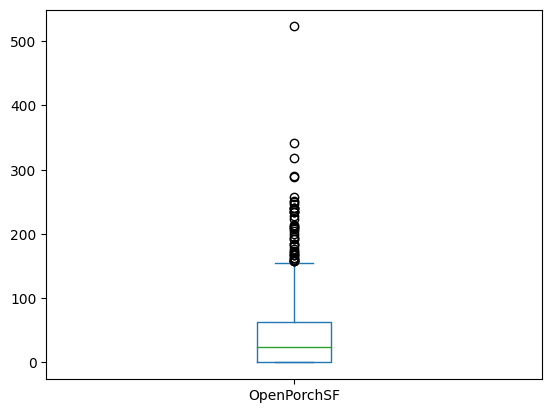

In [80]:
##### OpenPorchSF
df.OpenPorchSF.plot.box()

In [81]:
df = remove_outliers(df, 'OpenPorchSF')
df.shape

(856, 80)

<AxesSubplot:>

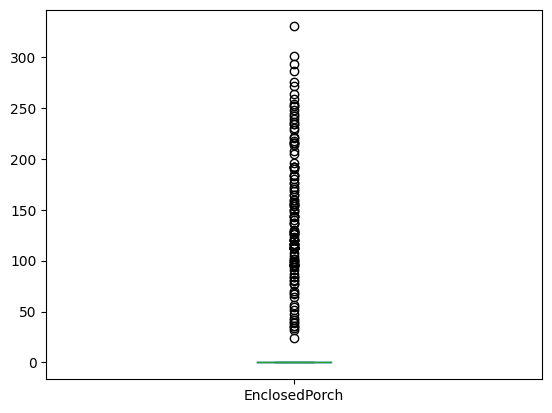

In [82]:
##### EnclosedPorch
df.EnclosedPorch.plot.box()

In [83]:
df = remove_outliers(df, 'EnclosedPorch')
df.shape

(722, 80)

<AxesSubplot:>

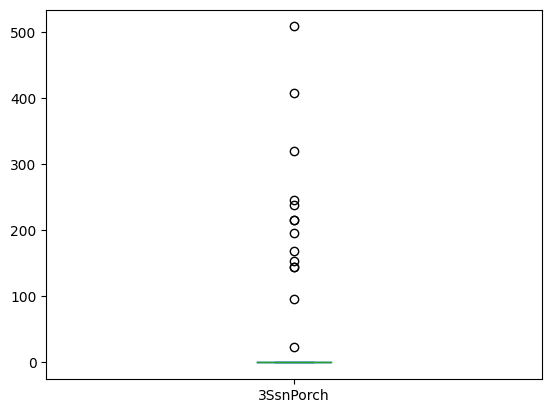

In [84]:
##### 3SsnPorch
df['3SsnPorch'].plot.box()

In [85]:
df = remove_outliers(df, '3SsnPorch')
df.shape

(708, 80)

<AxesSubplot:>

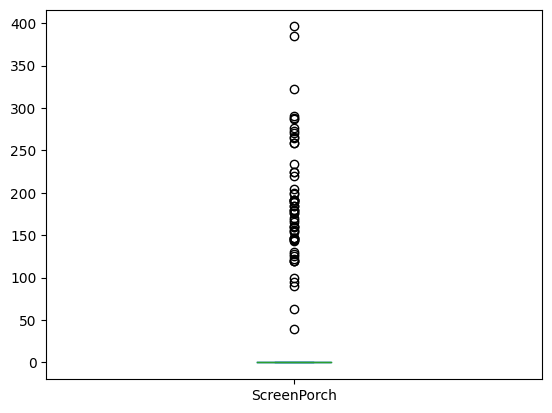

In [86]:
##### ScreenPorch
df['ScreenPorch'].plot.box()

In [87]:
df = remove_outliers(df, 'ScreenPorch')
df.shape

(647, 80)

<AxesSubplot:>

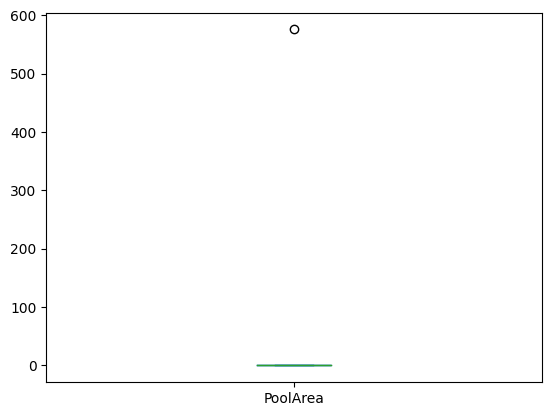

In [88]:
##### PoolArea
df['PoolArea'].plot.box()

In [89]:
df = remove_outliers(df, 'PoolArea')
df.shape

(646, 80)

<AxesSubplot:>

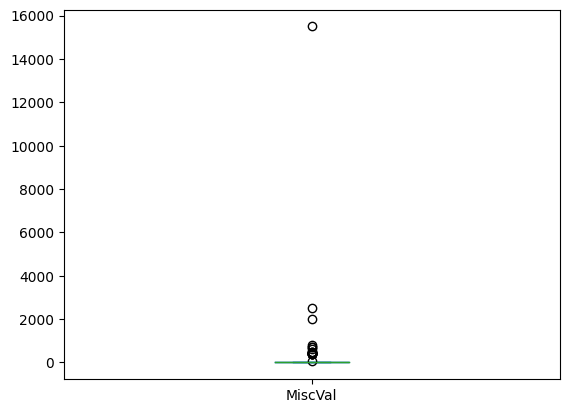

In [90]:
##### MiscVal
df['MiscVal'].plot.box()

In [91]:
df = remove_outliers(df, 'MiscVal')
df.shape

(626, 80)

<AxesSubplot:>

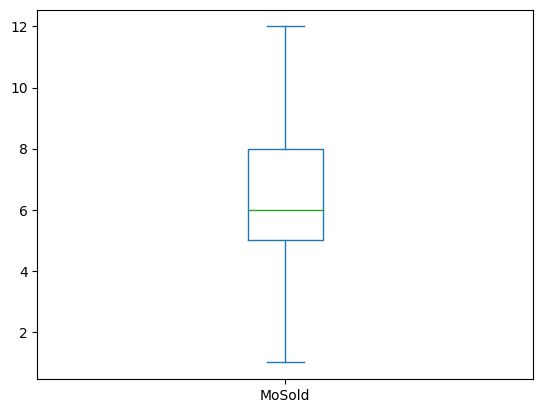

In [92]:
##### MoSold
df['MoSold'].plot.box()

<AxesSubplot:>

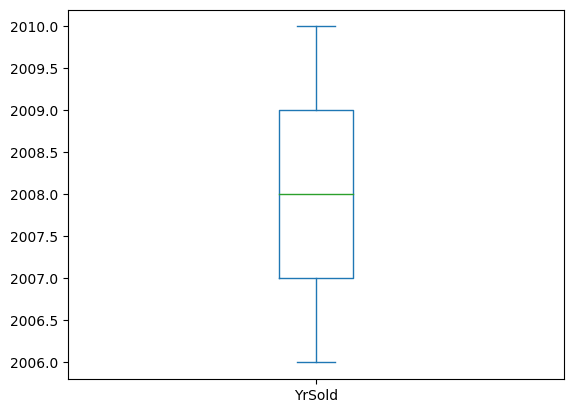

In [93]:
##### YrSold
df['YrSold'].plot.box()

In [94]:
df.shape

(626, 80)

#### Removing outliers sequentially, one after the other, results in more than half the data getting removed(1460 rows to 626 rows). This is not acceptable. Thus we remove outliers from the original df for each column and then the intersection rows for each column.

In [95]:
df = df_orig.copy()
df.shape

(1460, 80)

In [96]:
numerical_columns = [col for col in df.columns if df[col].dtype==np.int64 or df[col].dtype==np.float]
# following columns are numerical but are categories as per data definition
numerical_columns = [col for col in numerical_columns if col not in ['MSSubClass', 'OverallQual', 'OverallCond', 'SalePrice']]
numerical_columns

C:\Users\z003hz2y\AppData\Local\Temp\ipykernel_15772\2276997245.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  numerical_columns = [col for col in df.columns if df[col].dtype==np.int64 or df[col].dtype==np.float]


['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [97]:
df_prev = None
for col in numerical_columns:
    df = remove_outliers(df_orig, col)
    if df_prev is not None:
        df = pd.merge(df, df_prev, how='inner')
    df_prev = df
print(df.shape)

(623, 80)


#### Now also we lose a lot of data, we try another apporach below

#### Using Power Transformer before removing outliers

In [98]:
from sklearn.preprocessing import PowerTransformer

In [99]:
df = df_orig.copy()
df.shape

(1460, 80)

In [100]:
power_trans = PowerTransformer()
df[numerical_columns] = power_trans.fit_transform(df[numerical_columns])

D:\python_project\upgrad\venv\lib\site-packages\numpy\core\_methods.py:236: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [101]:
df_prev = None
for col in numerical_columns:
    df = remove_outliers(df, col)
    if df_prev is not None:
        df = pd.merge(df, df_prev, how='inner')
    df_prev = df
print(df.shape)

(385, 80)


#### Now also we lose a lot of data, we continue with orig data for now, do feature elimination and try to fit a model and based on prediction metrics, we will decide the further course of actions

In [102]:
df = df_orig.copy()
df.shape

(1460, 80)

#### Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes; some of which are explored and manipulated here:

In [103]:
# Assigning string values to different MSSubClass instead of numeric values. These numeric values may misindicate some order to it.
def number_map(col):
    return col.map({
        20: '1_ST_1946_NEW',
        30: '1_ST_1945_OLD',
        40: '1_ST_W_FINISHED_ATTIC',
        45: '1_1/2_ST_UNF',
        50: '1_1/2_ST_FIN',
        60: '2_ST_1946_NEW',
        70: '2_ST_1945_OLD',
        75: '2_1/2_ST',
        80: 'SPLIT_OR_MULTI_LEVEL',
        85: 'SPLIT_FOYER',
        90: 'DUPLEX',
       120: '1_ST_PUD_1946_NEW',
       150: '1_1/2_ST_PUD',
       160: '2_ST_PUD_1946_NEW',
       180: 'PUD_MULTILEVEL',
       190: '2_FAMILY_CONVERSION'
    })
    
df[['MSSubClass']] = df[['MSSubClass']].apply(number_map)

## Derived Features
There are no derived features for these columns

# 2. Data Visualisation

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Understanding the distribution of various numeric variables 
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [104]:
df_cat = df.select_dtypes('object')

In [105]:
len(df_cat.columns)

44

In [106]:
plt.figure(figsize=(50,200))
for i, col in enumerate(df_cat.columns):
    plt.subplot(22,2,i+1)
    sns.boxplot(x=df[col], y=df.SalePrice)
plt.show()

In [107]:
# check if a column has single value and remove them
for col in df.columns:
    print(col, len(df[col].unique()), len(df[col].unique())==1)

MSSubClass 15 False
MSZoning 5 False
LotFrontage 110 False
LotArea 1073 False
Street 2 False
Alley 3 False
LotShape 4 False
LandContour 4 False
Utilities 2 False
LotConfig 5 False
LandSlope 3 False
Neighborhood 25 False
Condition1 9 False
Condition2 8 False
BldgType 5 False
HouseStyle 8 False
OverallQual 10 False
OverallCond 9 False
YearBuilt 112 False
YearRemodAdd 61 False
RoofStyle 6 False
RoofMatl 8 False
Exterior1st 15 False
Exterior2nd 16 False
MasVnrType 4 False
MasVnrArea 327 False
ExterQual 4 False
ExterCond 5 False
Foundation 6 False
BsmtQual 5 False
BsmtCond 5 False
BsmtExposure 5 False
BsmtFinType1 7 False
BsmtFinSF1 637 False
BsmtFinType2 7 False
BsmtFinSF2 144 False
BsmtUnfSF 780 False
TotalBsmtSF 721 False
Heating 6 False
HeatingQC 5 False
CentralAir 2 False
Electrical 5 False
1stFlrSF 753 False
2ndFlrSF 417 False
LowQualFinSF 24 False
GrLivArea 861 False
BsmtFullBath 4 False
BsmtHalfBath 3 False
FullBath 4 False
HalfBath 3 False
BedroomAbvGr 8 False
KitchenAbvGr 4 False


#### no column has single value

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

In [108]:
df_numeric = df.select_dtypes(['float', 'int64'])
df_numeric.columns, len(df_numeric.columns)

(Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 36)

In [109]:
df_numeric.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         1             3             1             8           0   
1         0             3             1             6           1   
2         1             3             1             6           1   
3         0             3             1             7           1   
4         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         2003           2         548           0           61   
1         1976           2         460         298            0   
2         2001           2         608           0           42   
3         1998           3         642           0           35   
4         2000           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [110]:
# pairplot would result in 44*44 plots and thus is not feasible
#sns.pairplot(df_numeric)
#plt.show()

In [111]:
df_numeric.corr()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.306689     0.234227    -0.052842   0.117555   
LotArea           0.306689  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.234227  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.052842 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.117555  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.082775  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.178690  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.215760  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2        0.043298  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.122249 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.363366  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.414246  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.072479  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.036879  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.368376  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.091428  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.006446  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.180431  0.126031     0.550600    -0.194149   0.468271   
HalfBath          0.048209  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.237016  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr     -0.005762 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.320166  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.235636  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.062782 -0.019671     0.525756    -0.274895   0.773931   
GarageCars        0.269722  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.323658  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF        0.077032  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.137435  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.009814 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.062317  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.037683  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.180867  0.077672     0.065166    -0.001985   0.004950   
MiscVal           0.001101  0.038068    -0.031406     0.068777  -0.034383   
MoSold            0.010172  0.001205     0.070815    -0.003511   0.012398   
YrSold            0.006750 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.334897  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.082775    0.178690    0.215760    0.043298   0.122249   
LotArea            0.013788    0.103321    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.407252    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.125694   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.311600    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.176529    0.128451   -0.067759   0.181133   
MasVnrArea         0.176529    1.000000    0.261256   -0.071330   0.113862   
BsmtFinSF1         0.128451    0.261256    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.071330   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.113862   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.360067    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.339850    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.173800   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.068628   -0.064503    0.014807   0.02816

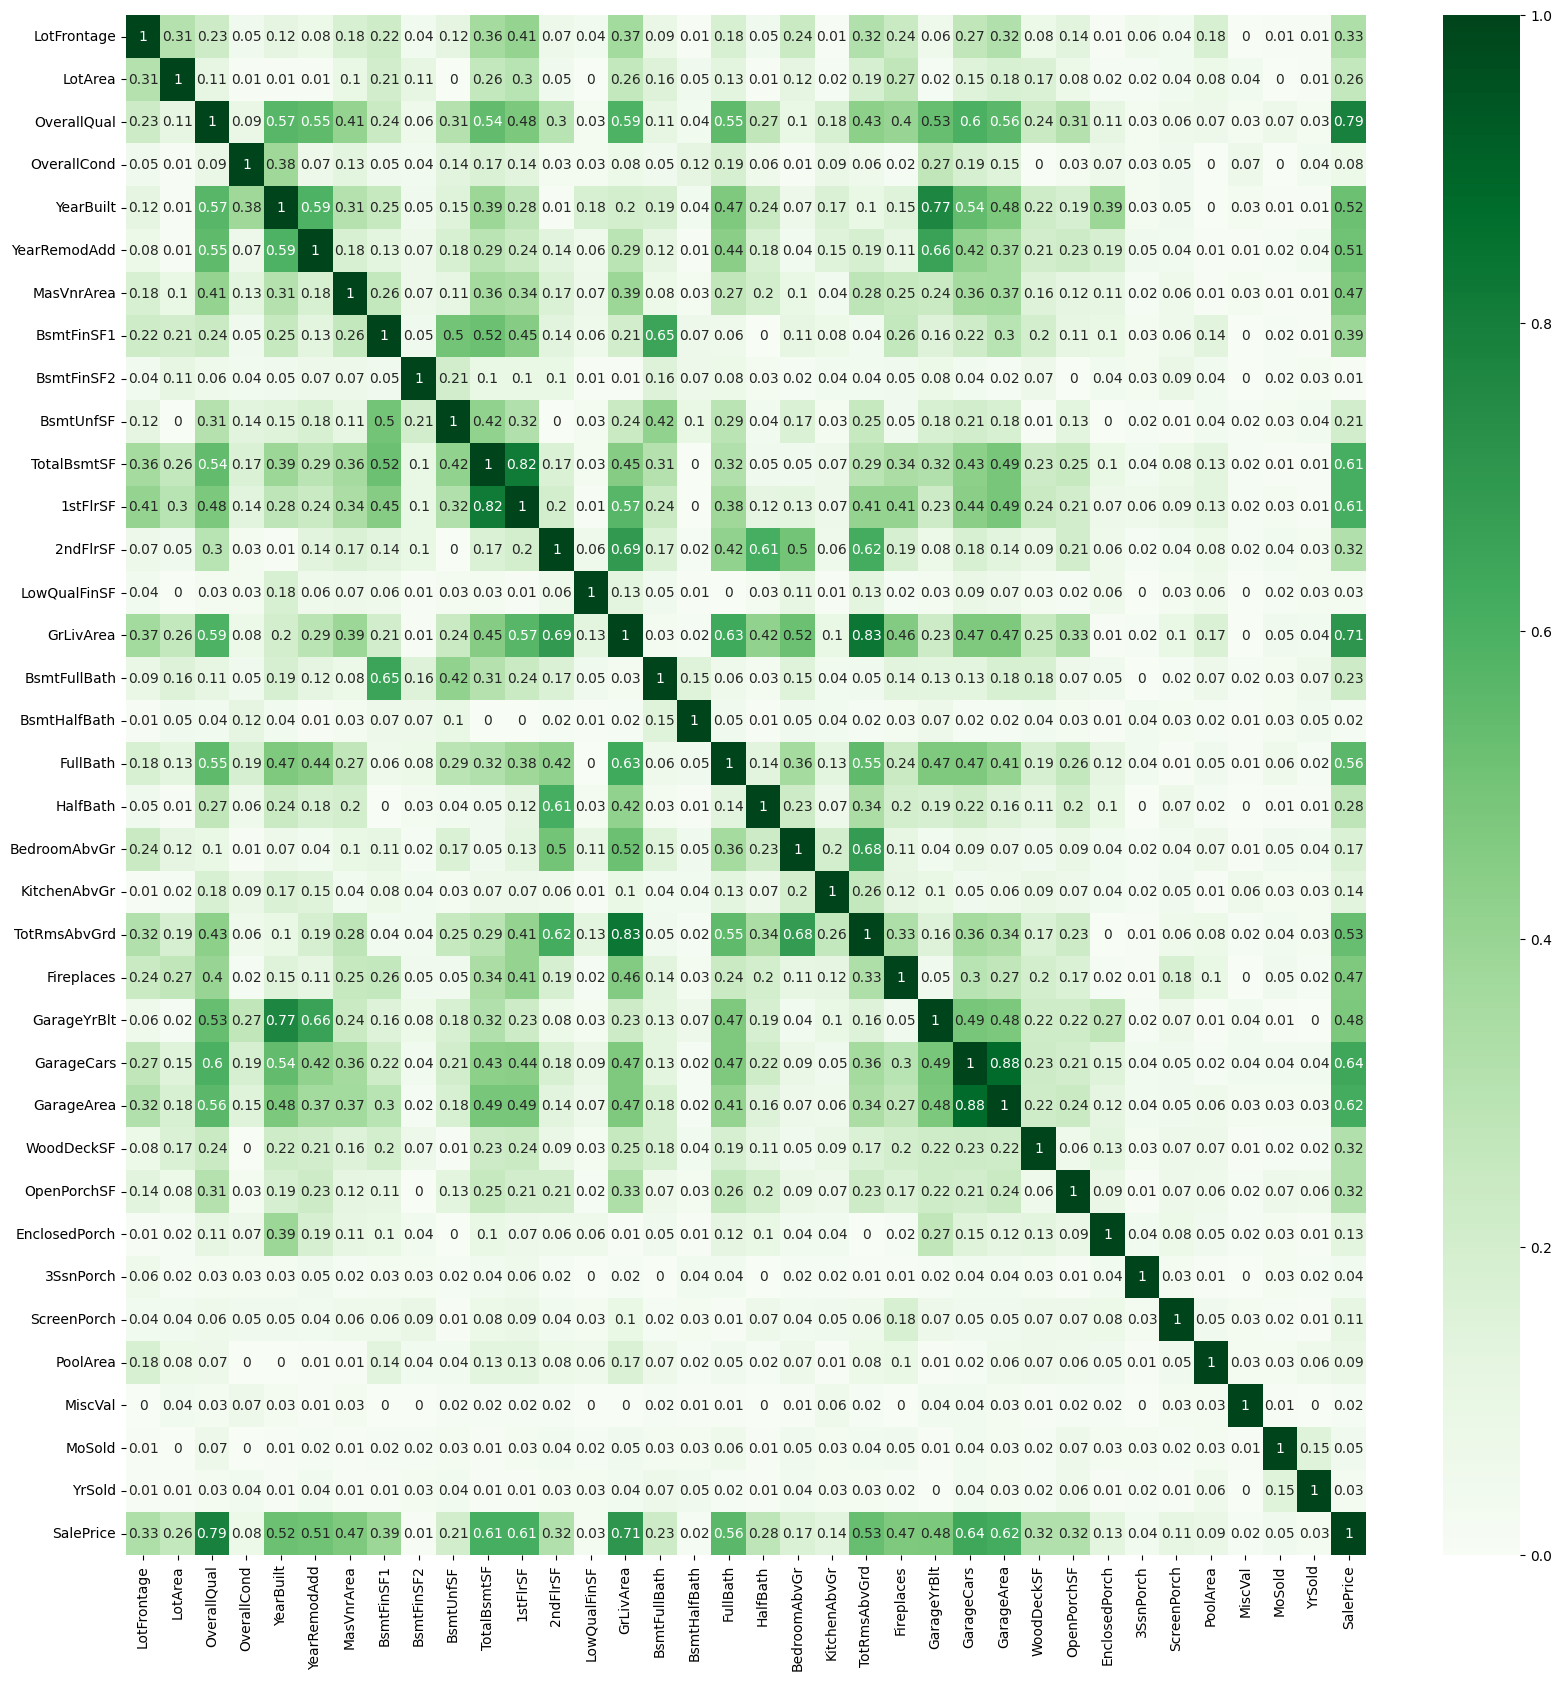

In [112]:
plt.figure(figsize=(20,20))
sns.heatmap(round(abs(df_numeric.corr()),2), annot=True, cmap='Greens')
plt.show()

#### heatmap shows a lot of insights
- sales Price is highly correlated with OverallQuality and GrLivArea. 
- There are 10 variables which have absolute correlation of 0.5 or more with the Sales Price
- There are many features which are correlated with one another signifying that there is a good chance of multilinearity being present.

# 3. Data Preparation

In [113]:
# convert categorical variables into dummies.
# Note: we do this only for nominal categorical variables and not for ordinal categorical variables
nominal_cat_columns = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotConfig', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 
                       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition']
ordinal_cat_columns = [col for col in df_cat.columns if col not in nominal_cat_columns]
print(ordinal_cat_columns)


['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']


In [114]:
# for nominal categorical columns we create dummy columns
# df_cat_nominal = df_cat[nominal_cat_columns]
df_dummy = pd.get_dummies(df, drop_first=True, columns=nominal_cat_columns)
df_dummy.head()

LotFrontage  LotArea LotShape LandContour Utilities LandSlope  OverallQual  \
0         65.0     8450      Reg         Lvl    AllPub       Gtl            7   
1         80.0     9600      Reg         Lvl    AllPub       Gtl            6   
2         68.0    11250      IR1         Lvl    AllPub       Gtl            7   
3         60.0     9550      IR1         Lvl    AllPub       Gtl            7   
4         84.0    14260      IR1         Lvl    AllPub       Gtl            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea ExterQual ExterCond  \
0            5       2003          2003       196.0        Gd        TA   
1            8       1976          1976         0.0        TA        TA   
2            5       2001          2002       162.0        Gd        TA   
3            5       1915          1970         0.0        TA        TA   
4            5       2000          2000       350.0        Gd        TA   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ         706          Unf   
1       Gd       TA           Gd          ALQ         978          Unf   
2       Gd       TA           Mn          GLQ         486          Unf   
3       TA       Gd           No          ALQ         216          Unf   
4       Gd       TA           Av          GLQ         655          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC CentralAir  1stFlrSF  \
0           0        150          856        Ex          Y       856   
1           0        284         1262        Ex          Y      1262   
2           0        434          920        Ex          Y       920   
3           0        540          756        Gd          Y       961   
4           0        490         1145        Ex          Y      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0         1             3             1          Gd             8        Typ   
1         0             3             1          TA             6        Typ   
2         1             3             1          Gd             6        Typ   
3         0             3             1          Gd             7        Typ   
4         1             4             1          Gd             9        Typ   

   Fireplaces FireplaceQu  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0          NA         2003          RFn           2         548   
1           1          TA         1976          RFn           2         460   
2           1          TA         2001          RFn           2         608   
3           1          Gd         1998          Unf           3         642   
4           1          TA         2000          RFn           3         836   

  GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA          Y           0           61              0   
1         TA         TA          Y         298            0              0   
2         TA         TA          Y           0           42              0   
3         TA         TA          Y           0           35            272   
4         TA         TA          Y         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  MiscVal  MoSold  YrSold  \
0          0            0         0     NA    NA        0       2    2008   
1          0            0         0     NA    NA        0       5    2007   
2          0            0         0     NA    NA        0     

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
labelencoders = {}
for col in ordinal_cat_columns:
    labelencoders[col] = LabelEncoder()
    df_dummy[col] = labelencoders[col].fit_transform(df_dummy[col])
df_dummy.head()

LotFrontage  LotArea  LotShape  LandContour  Utilities  LandSlope  \
0         65.0     8450         3            3          0          0   
1         80.0     9600         3            3          0          0   
2         68.0    11250         0            3          0          0   
3         60.0     9550         0            3          0          0   
4         84.0    14260         0            3          0          0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7            5       2003          2003       196.0          2   
1            6            8       1976          1976         0.0          3   
2            7            5       2001          2002       162.0          2   
3            7            5       1915          1970         0.0          3   
4            8            5       2000          2000       350.0          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          4         2         4             4             2         706   
1          4         2         4             1             0         978   
2          4         2         4             2             2         486   
3          4         4         1             4             0         216   
4          4         2         4             0             2         655   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             6           0        150          856          0           1   
1             6           0        284         1262          0           1   
2             6           0        434          920          0           1   
3             6           0        540          756          2           1   
4             6           0        490         1145          0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1             4             1            2             9   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           6           0            3         2003             2           2   
1           6           1            5         1976             2           2   
2           6           1            5         2001             2           2   
3           6           1            2         1998             3           3   
4           6           1            5         2000             2           3   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548           5           5           2           0           61   
1         460           5           5           2         298            0   
2         608           5           5           2           0           42   
3         642           5           5           2           0           35   
4         836           5           5           2         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0              0          0            0         0       3      4        0   
1              0          0            0         0       3      4        0   
2              0          0  

In [117]:
df_dummy.shape

(1460, 214)

# 4. Model Building and Evaluation

In [118]:
# we start with the train test split
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(df_dummy, train_size=0.7, random_state=100)
df_train.shape

(1021, 214)

In [119]:
df_train.head()

LotFrontage  LotArea  LotShape  LandContour  Utilities  LandSlope  \
318          90.0     9900         3            2          0          1   
239          52.0     8741         3            3          0          0   
986          59.0     5310         3            3          0          0   
1416         60.0    11340         3            3          0          0   
390          50.0     8405         3            3          0          0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
318             7            5       1993          1993       256.0   
239             6            4       1945          1950         0.0   
986             6            8       1910          2003         0.0   
1416            4            6       1885          1950         0.0   
390             5            8       1900          1950         0.0   

      ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
318           2          4         2         4             1             2   
239           3          4         4         0             4             3   
986           3          2         4         0             4             6   
1416          3          4         4         4             4             6   
390           3          4         4         1             4             5   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
318          987             6           0        360         1347          0   
239           94             6           0        641          735          4   
986            0             6           0        485          485          2   
1416           0             6           0        777          777          2   
390          241             1         391        229          861          0   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318            1      1372      1274             0       2646             1   
239            1       798       689             0       1487             0   
986            1      1001       634             0       1635             0   
1416           1      1246      1044             0       2290             0   
390            1       961       406             0       1367             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318              0         2         1             4             1   
239              0         1         1             3             1   
986              0         1         0             2             1   
1416             0         2         0             4             2   
390              0         1         0             4             1   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
318             2             9           6           1            5   
239             3             7           6           1            2   
986             2             5           6           0            3   
1416            3            11           6           0            3   
390             3             7           6           0            3   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
318          1993             2           3         656           5   
239          1949             3           1         220           5   
986          1950             3           1         255           1   
1416         1971             3           2         560           5   
390          1978             3           1         384           5   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
318            5           2         340           60            144   
239            5           2           0          140              0   
986            5           2         394            0              0   
1416           5           0           0            0            114   
390            5           2           0          130   

### Scaling

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler=MinMaxScaler()
df_train[:] = scaler.fit_transform(df_train[:]) # all the dummy variables need not be encoded but their value will remain unchanged even after scaling

In [122]:
df_train.describe()

LotFrontage      LotArea     LotShape  LandContour    Utilities  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.166926     0.042162     0.649690     0.925563     0.000979   
std       0.075648     0.048221     0.468083     0.234564     0.031296   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.027937     0.000000     1.000000     0.000000   
50%       0.167808     0.037555     1.000000     1.000000     0.000000   
75%       0.195205     0.046943     1.000000     1.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         LandSlope  OverallQual  OverallCond    YearBuilt  YearRemodAdd  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean      0.032321     0.565894     0.572600     0.719719      0.583072   
std       0.141537     0.155515     0.136515     0.219718      0.343416   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     0.444444     0.500000     0.594203      0.283333   
50%       0.000000     0.555556     0.500000     0.731884      0.733333   
75%       0.000000     0.666667     0.625000     0.927536      0.900000   
max       1.000000     1.000000     1.000000     1.000000      1.000000   

        MasVnrArea    ExterQual    ExterCond     BsmtQual     BsmtCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.065306     0.847209     0.932419     0.679726     0.918952   
std       0.117088     0.229967     0.183142     0.321066     0.241738   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.666667     1.000000     0.500000     1.000000   
50%       0.000000     1.000000     1.000000     0.500000     1.000000   
75%       0.098750     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       BsmtExposure  BsmtFinType1   BsmtFinSF1  BsmtFinType2   BsmtFinSF2  \
count   1021.000000   1021.000000  1021.000000   1021.000000  1021.000000   
mean       0.721107      0.517140     0.079406      0.926706     0.033980   
std        0.396087      0.371734     0.082409      0.207927     0.115907   
min        0.000000      0.000000     0.000000      0.000000     0.000000   
25%        0.250000      0.166667     0.000000      1.000000     0.000000   
50%        1.000000      0.333333     0.069454      1.000000     0.000000   
75%        1.000000      1.000000     0.126152      1.000000     0.000000   
max        1.000000      1.000000     1.000000      1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF    HeatingQC   CentralAir     1stFlrSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.241329     0.173813     0.375612     0.928501     0.184401   
std       0.192097     0.075139     0.435499     0.257782     0.092106   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.092466     0.129787     0.000000     1.000000     0.116667   
50%       0.197774     0.162684     0.000000     1.000000     0.165278   
75%       0.345034     0.215057     1.000000     1.000000     0.243056   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath  \
count  1021.000000   1021.000000  1021.000000   1021.000000   1021.000000   
mean      0.166364      0.011649     0.207562      0.146588      0.029873   
std       0.210895      0.093608     0.102200      0.175127      0.120615   
min       0.000000      0.000000     0.000000      0.000000      0.000000   
25%       0.000000      0.000000     0.133935      0.000000      0.000000   
50%       0.000000      0.000000     0.197540      0.000000      0.000000   
75%       0.352542      0.000000     0.256726      0.333333      0.000000   
max       1.000000  

In [123]:
# sns.heatmap(round(abs(df_train.corr()),2), annot=True, cmap='Greens') taking a lot of time

### Building first linear regression model with all features

In [124]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [125]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [126]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [127]:
y_train_pred = linear.predict(X_train)

In [128]:
def adj_r2_score(y_true, y_pred, X):
    r2 = r2_score(y_true=y_true, y_pred=y_pred)
    n = X.shape[0]
    p = X.shape[1]
    return 1 - (1 - r2)*(n-1)/(n-p-1)

In [129]:
summary = {}
summary['lr'] = {}
summary['lr']['train r2 score'] = r2_score(y_true=y_train, y_pred=y_train_pred)
summary['lr']['train adj r2 score'] = adj_r2_score(y_train, y_train_pred, X_train)
summary['lr']['train MSE score'] = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
print('train r2 score', r2_score(y_true=y_train, y_pred=y_train_pred))
print('train adj r2 score', adj_r2_score(y_train, y_train_pred, X_train))
print('train MSE score', mean_squared_error(y_true=y_train, y_pred=y_train_pred))

train r2 score 0.9352588011982151
train adj r2 score 0.9181709754921679
train MSE score 0.0007803984673090902


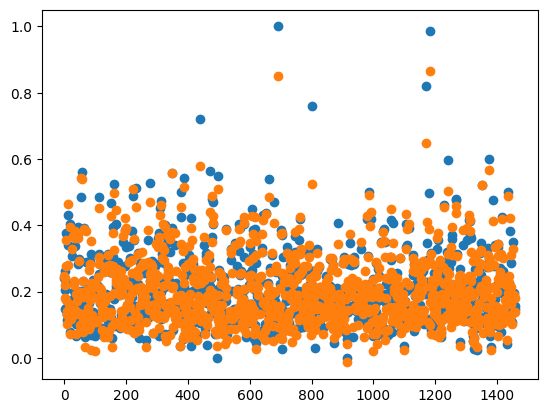

In [130]:
plt.scatter(X_train.index, y_train)
plt.scatter(X_train.index, y_train_pred)
plt.show()

#### the r2 score and adjusted r2 score is close showing that many redundant variables are not used

In [131]:
df_test[:] = scaler.transform(df_test[:])

In [132]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [133]:
y_test_pred = linear.predict(X_test)

In [134]:
summary['lr']['test r2 score'] = r2_score(y_true=y_test, y_pred=y_test_pred)
summary['lr']['test MSE score'] = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print('test r2 score', r2_score(y_true=y_test, y_pred=y_test_pred))
print('test MSE score', mean_squared_error(y_true=y_test, y_pred=y_test_pred))

test r2 score -7.156946432127437e+22
test MSE score 8.883979343255111e+20


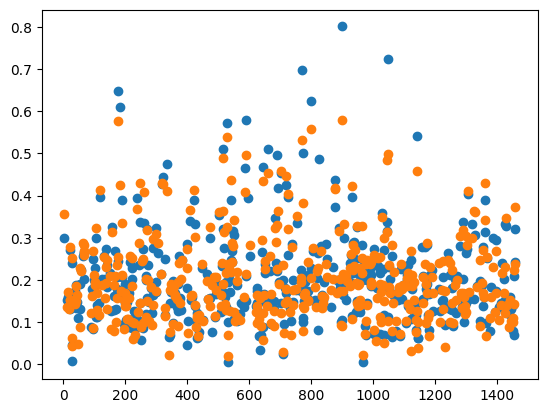

In [135]:
plt.scatter(X_test.index, y_test)
plt.scatter(y_test.index[(y_test_pred>=0.0)&(y_test_pred<=1.0)], y_test_pred[(y_test_pred>=0.0)&(y_test_pred<=1.0)])
plt.show()

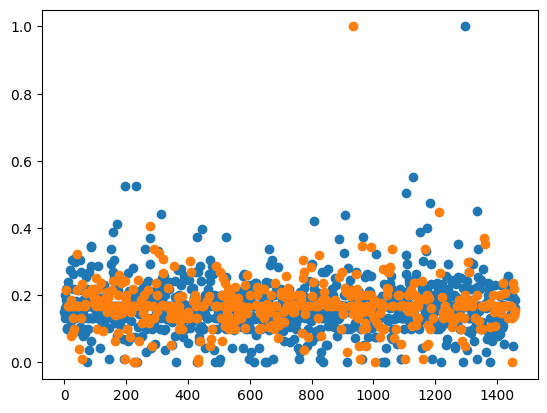

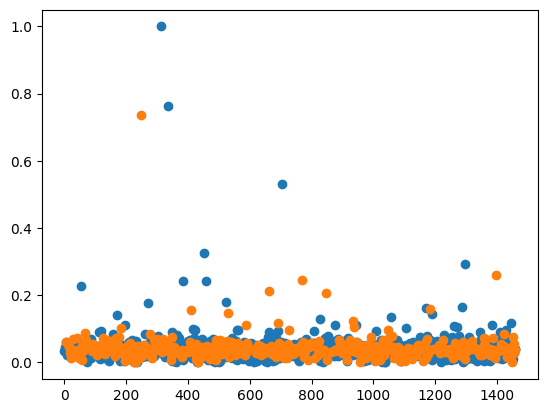

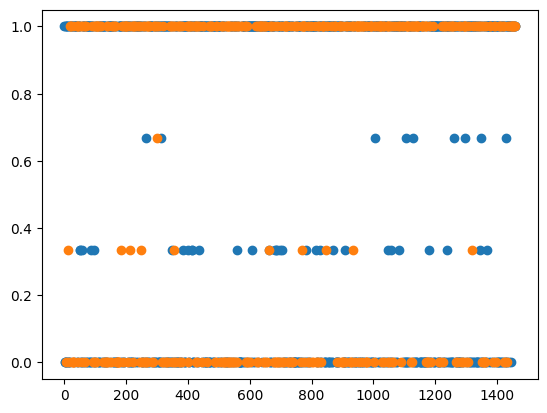

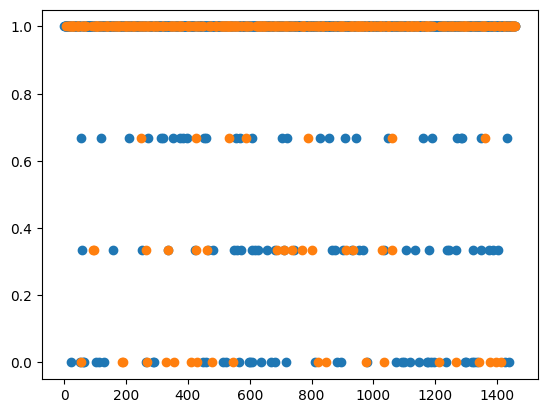

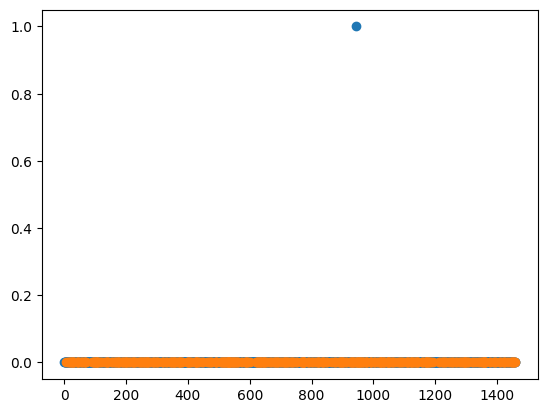

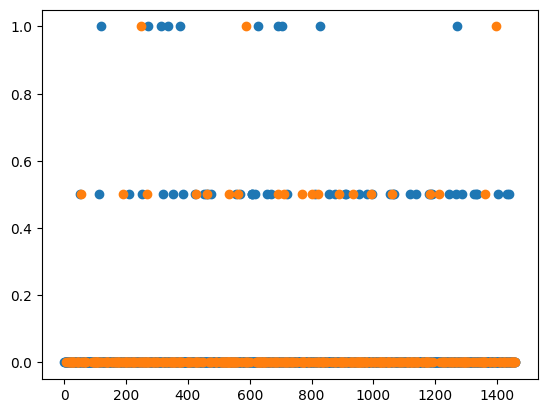

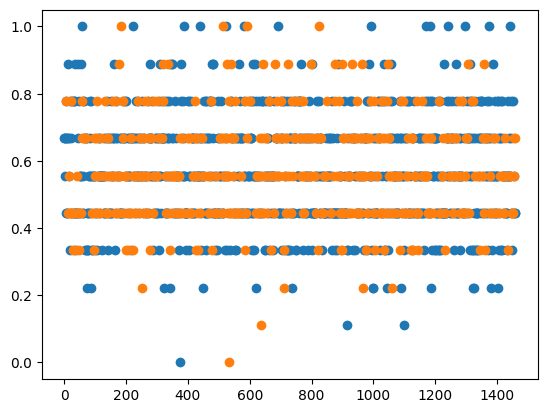

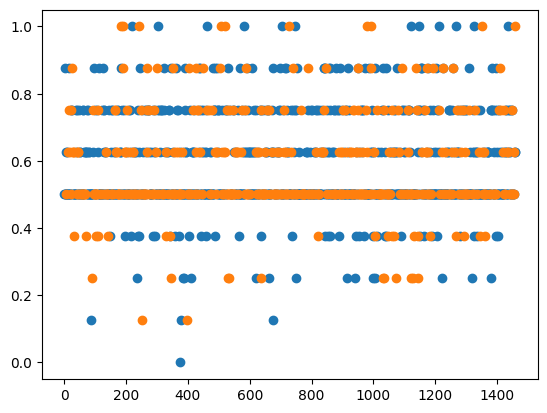

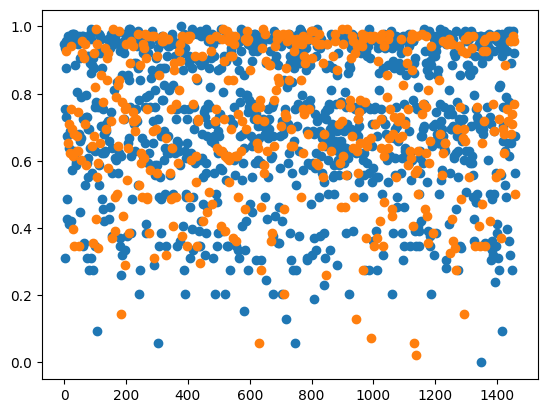

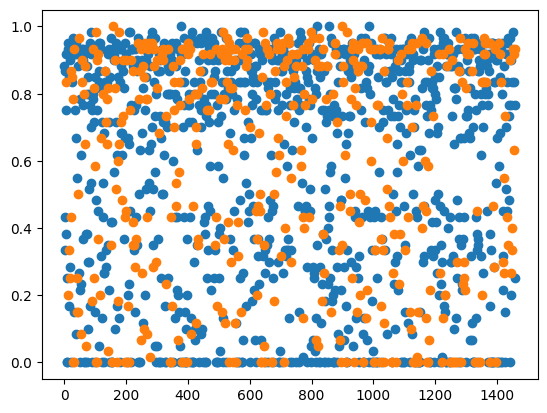

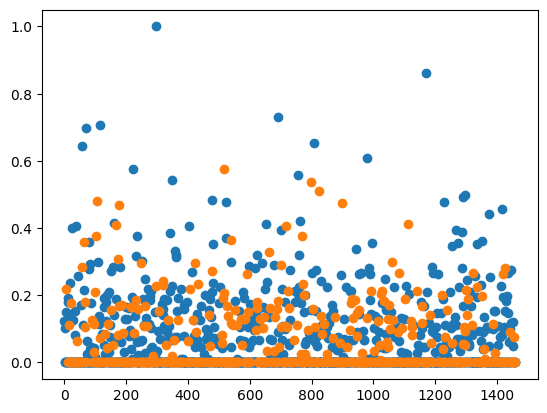

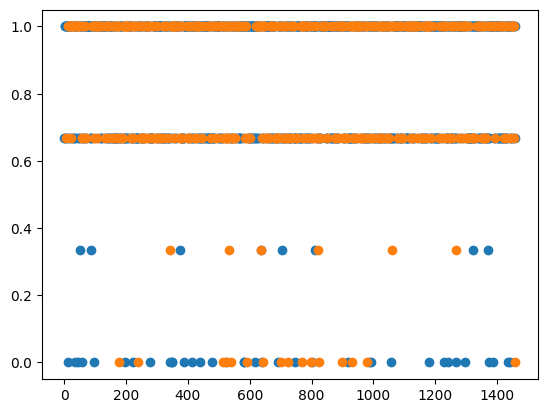

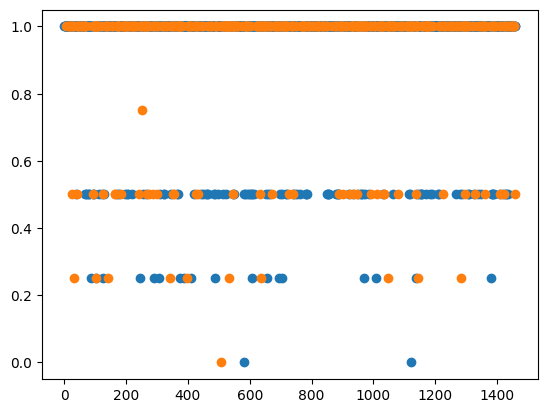

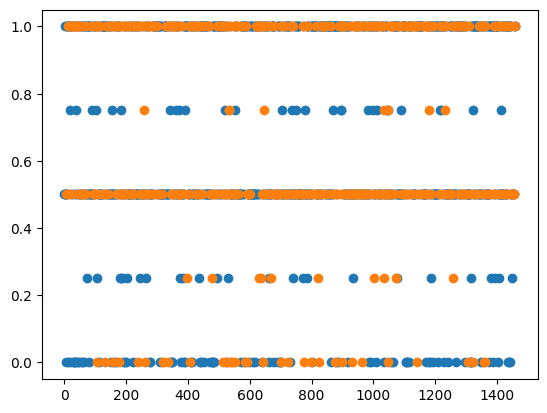

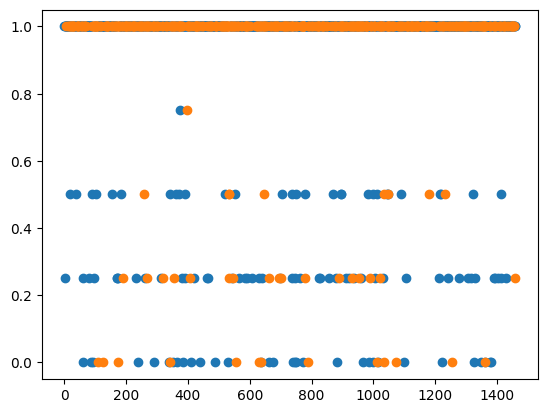

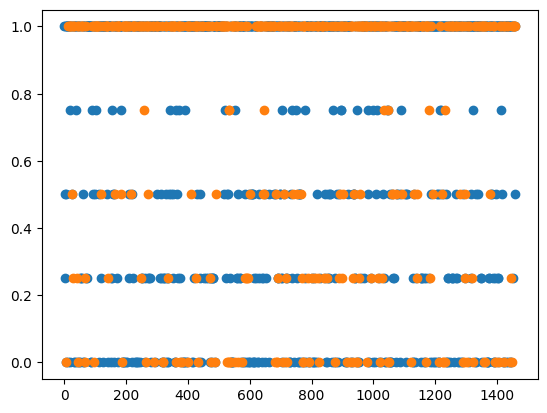

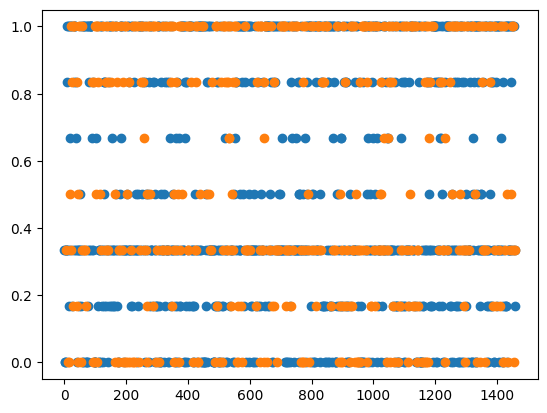

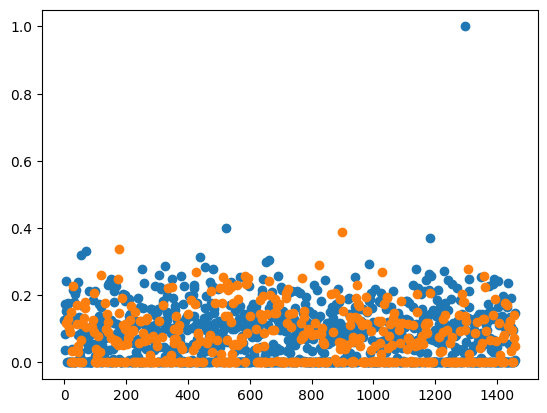

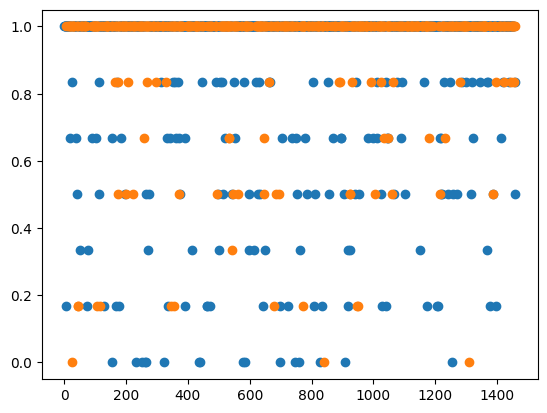

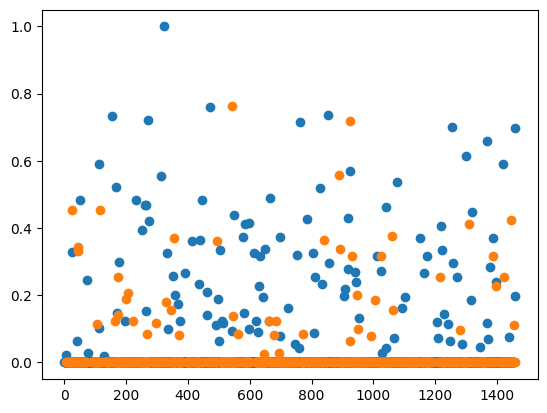

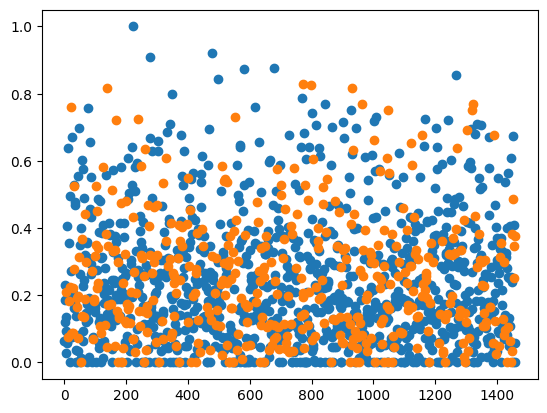

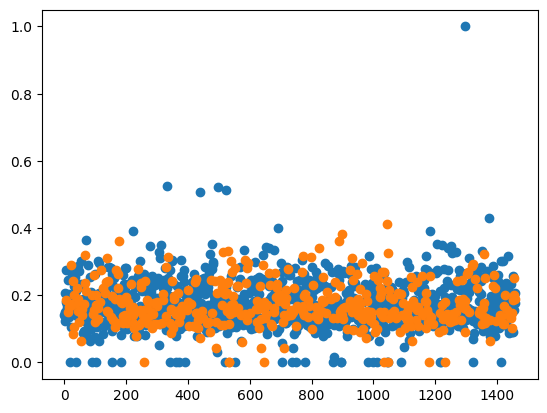

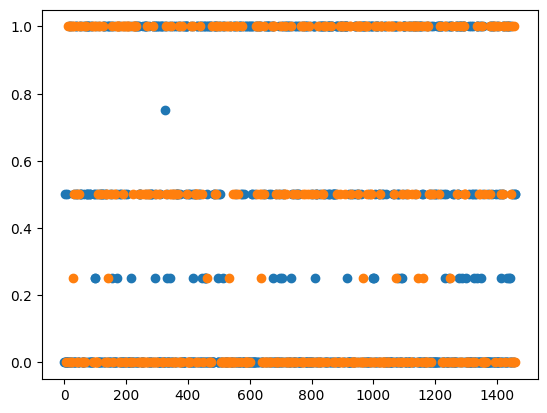

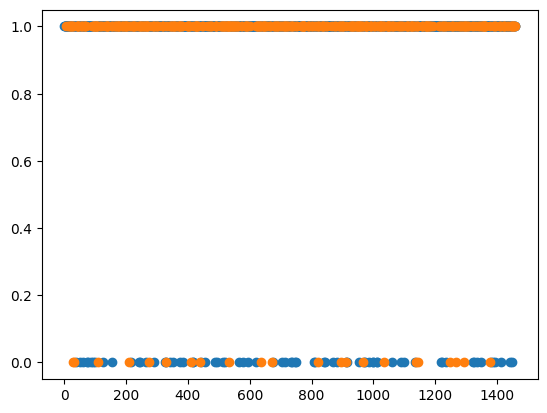

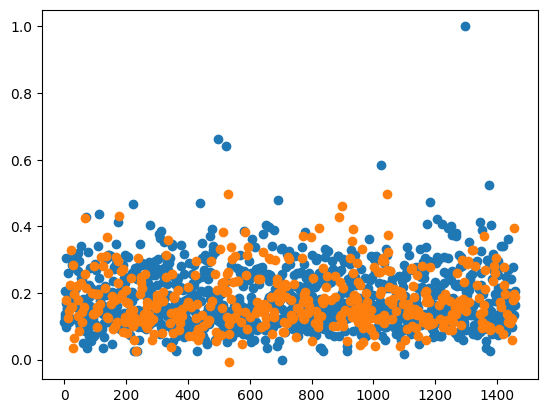

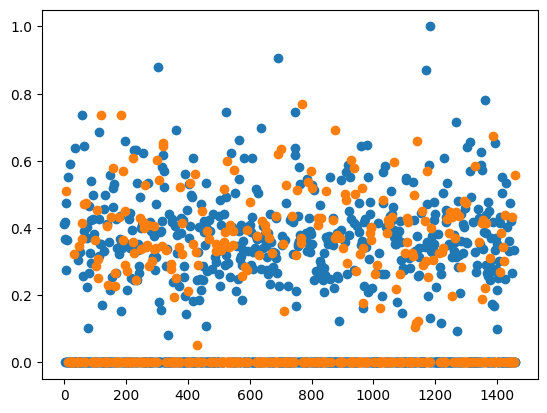

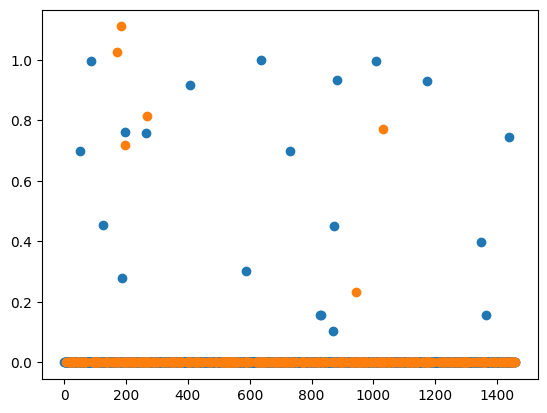

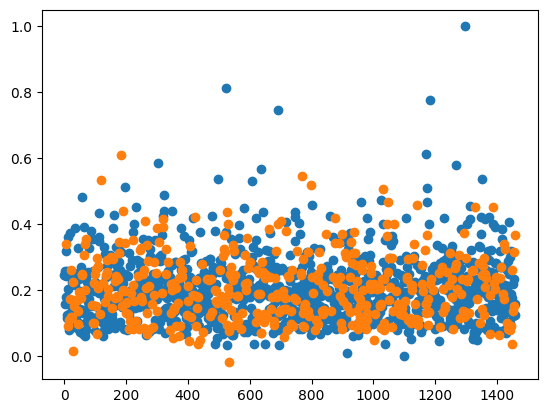

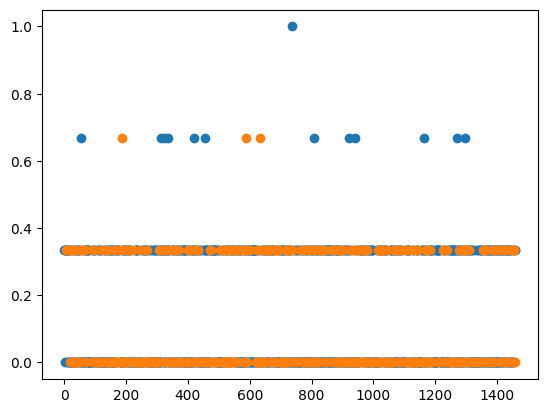

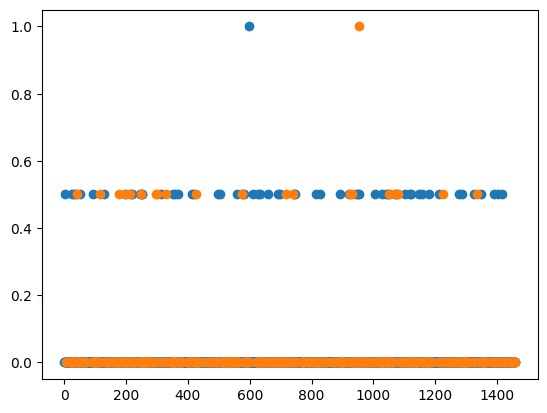

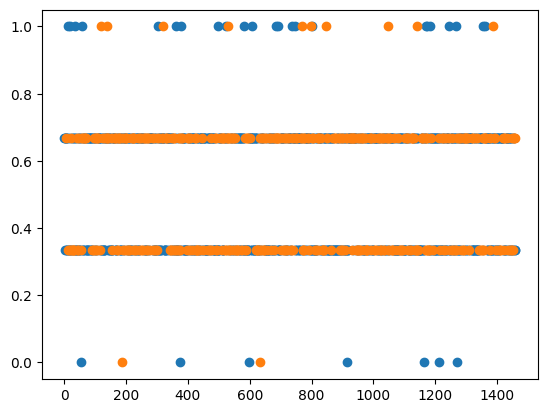

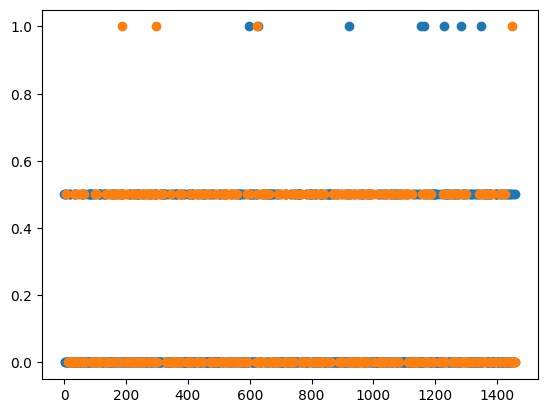

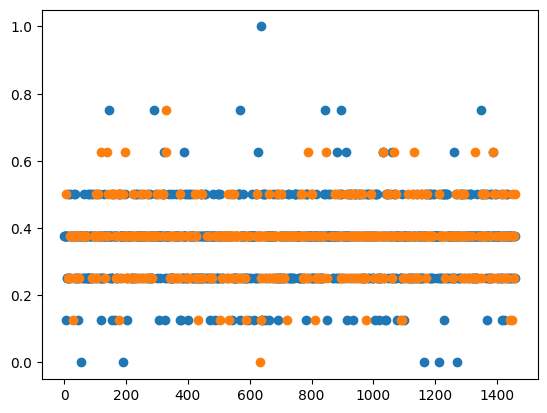

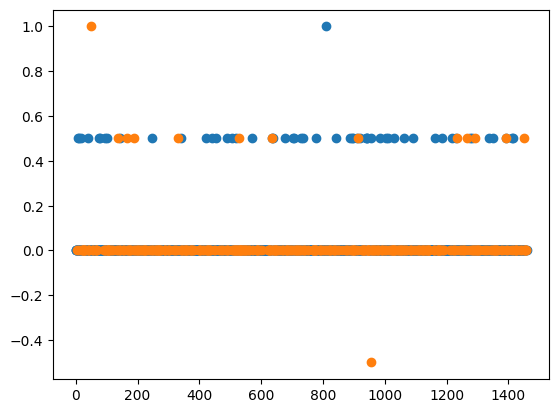

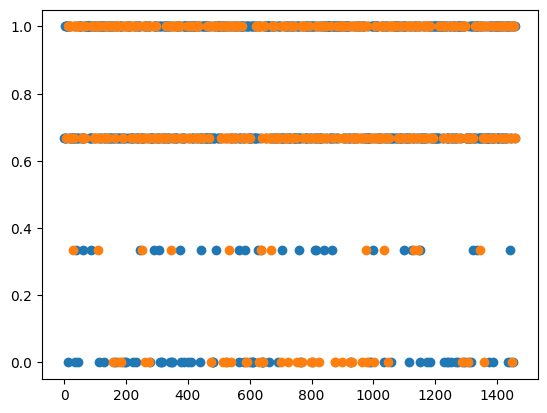

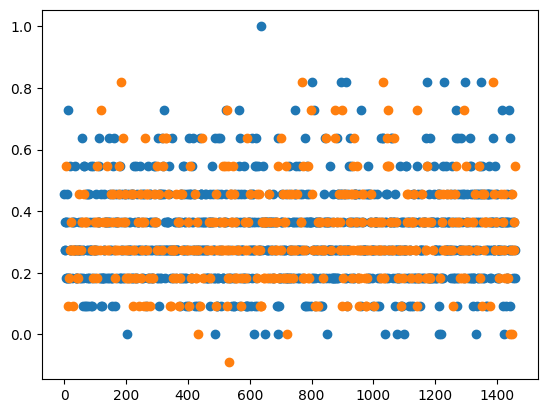

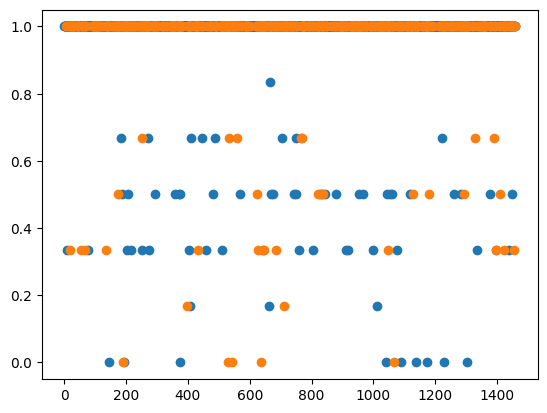

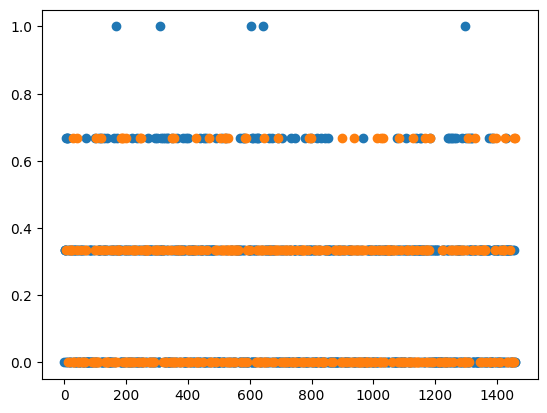

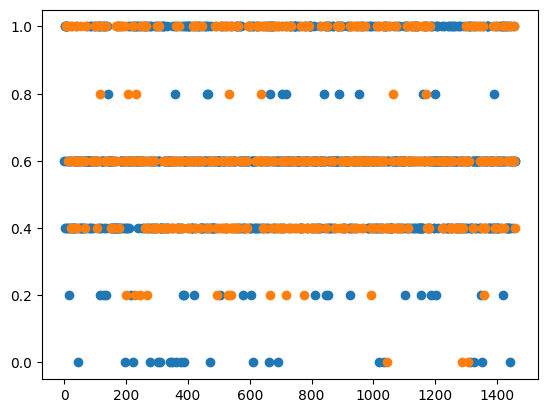

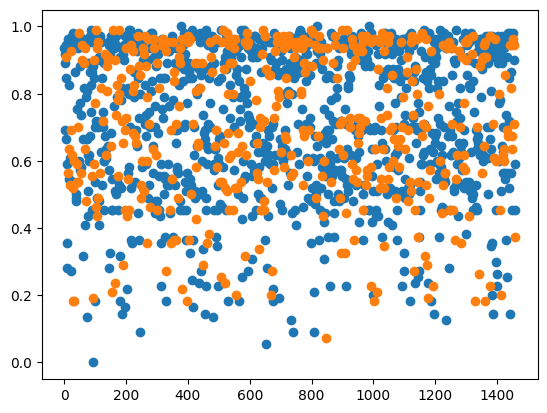

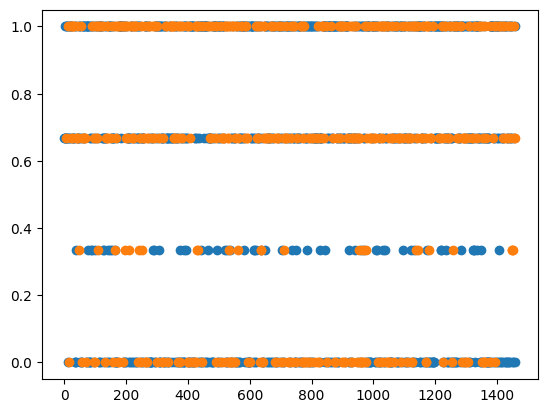

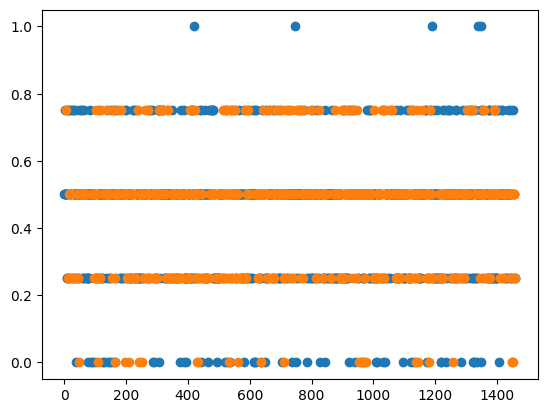

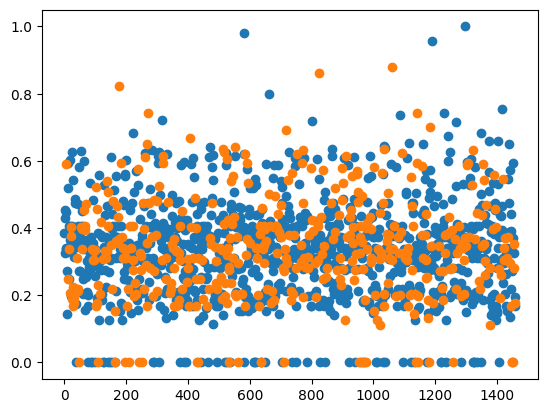

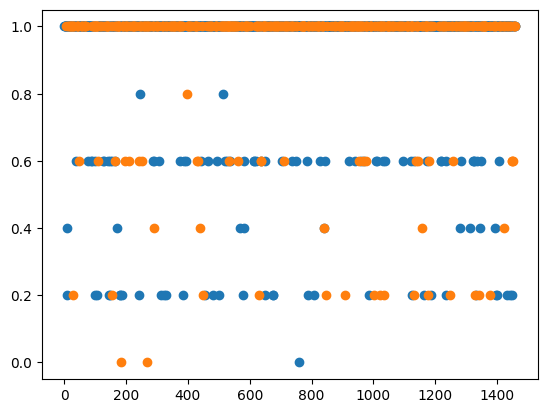

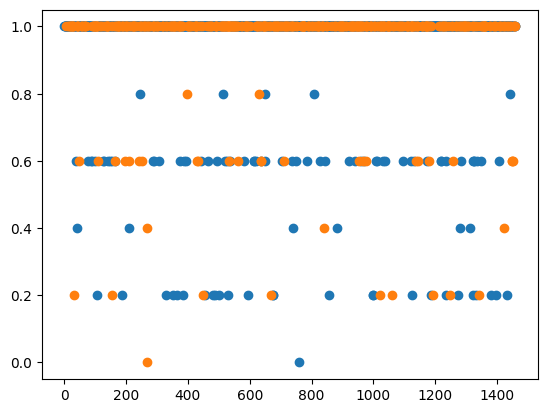

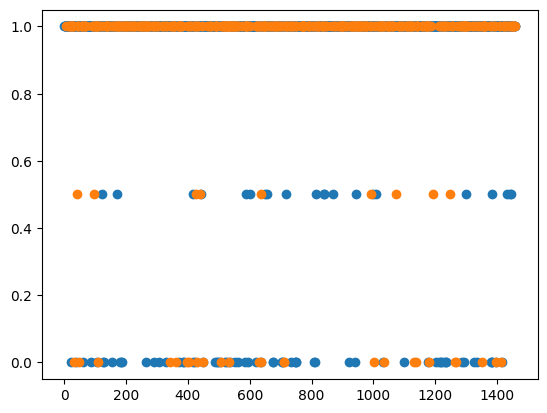

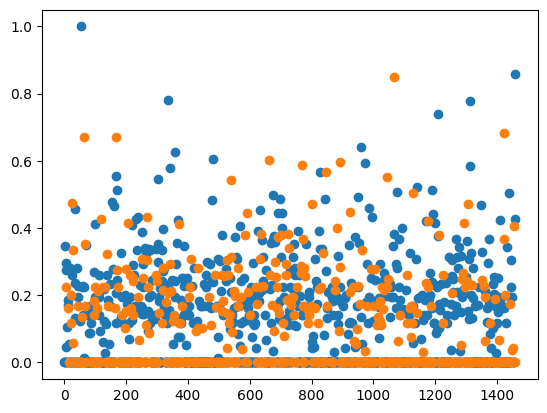

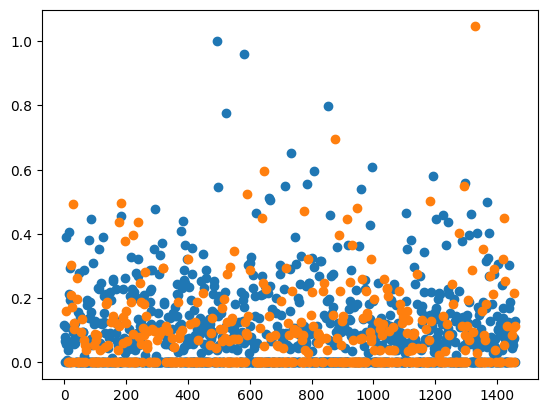

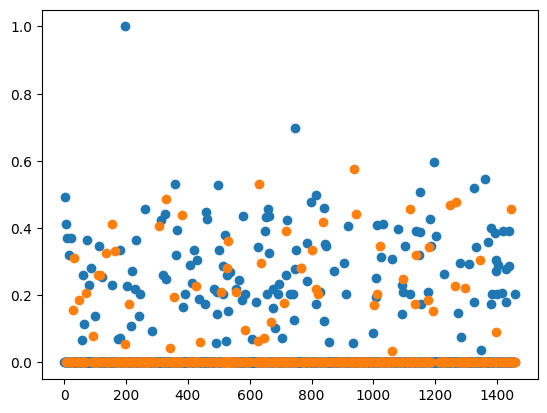

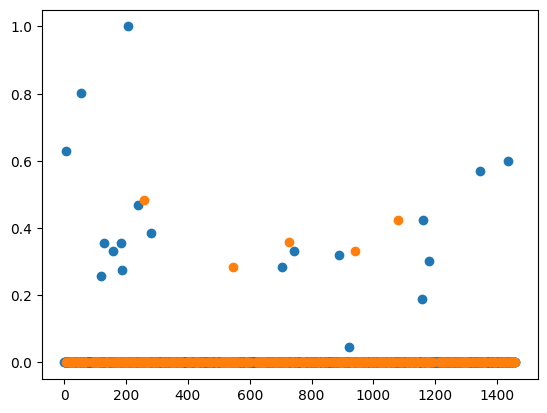

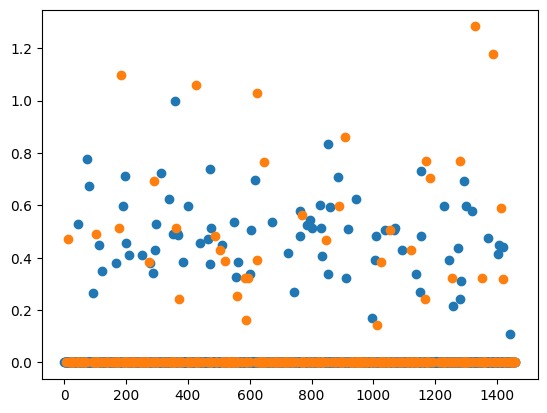

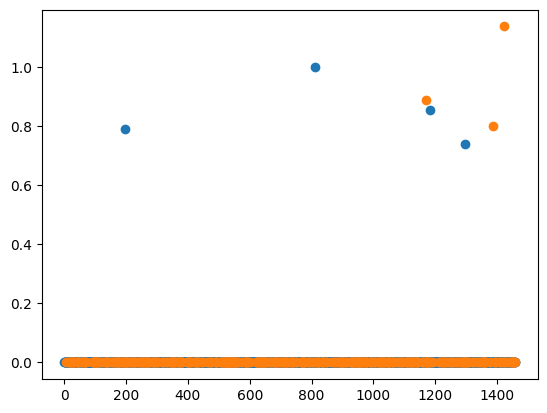

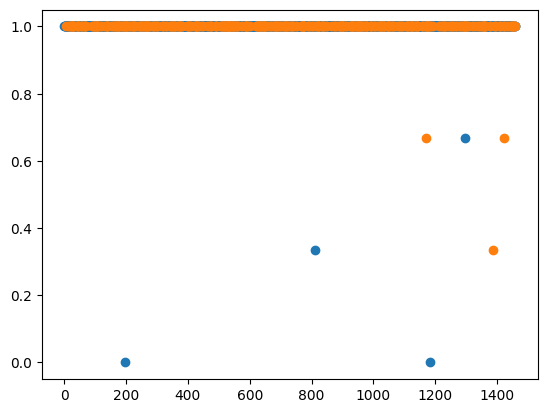

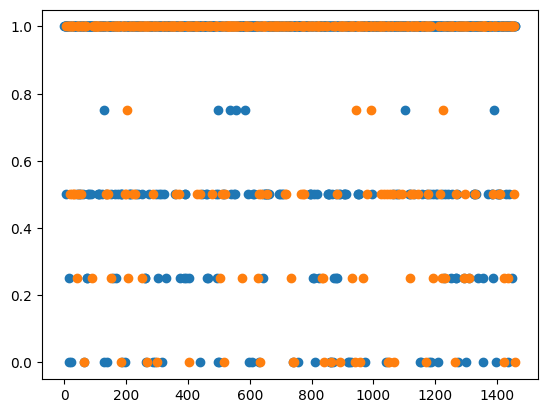

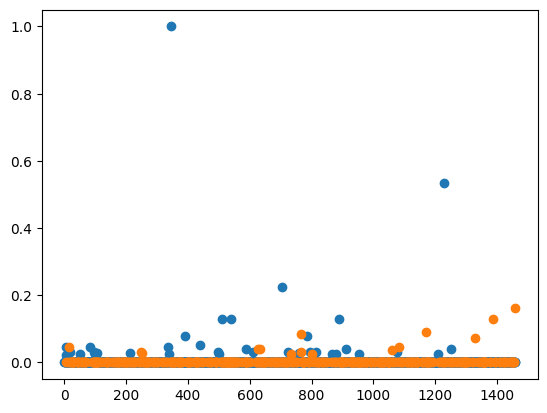

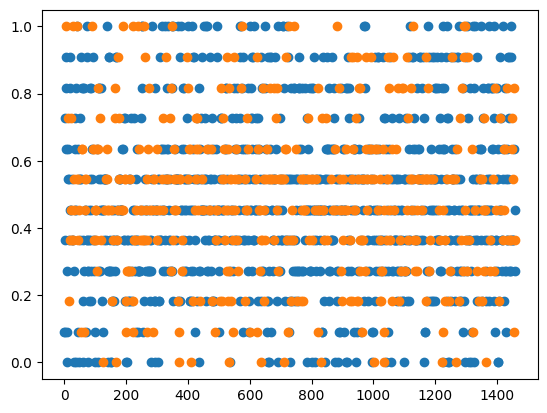

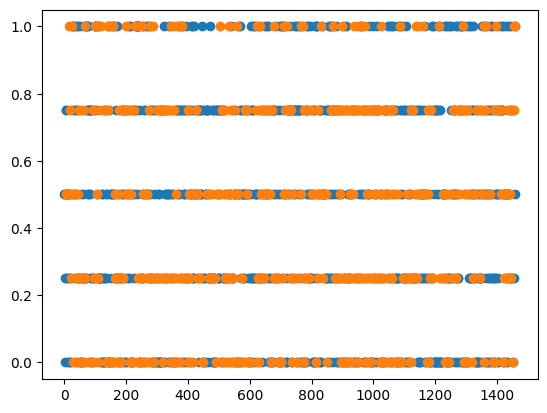

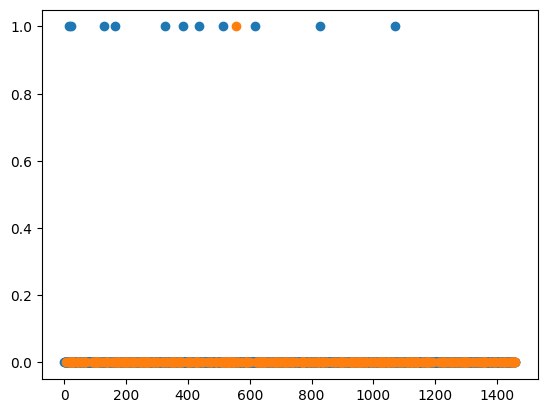

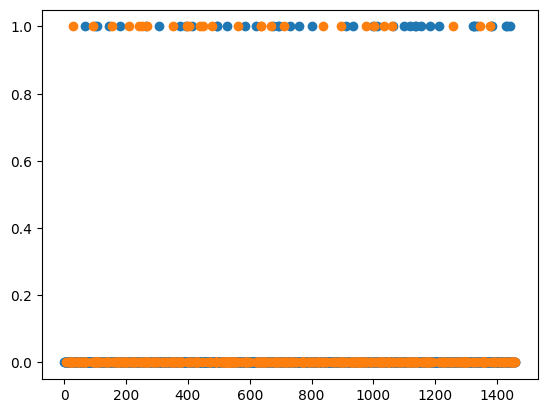

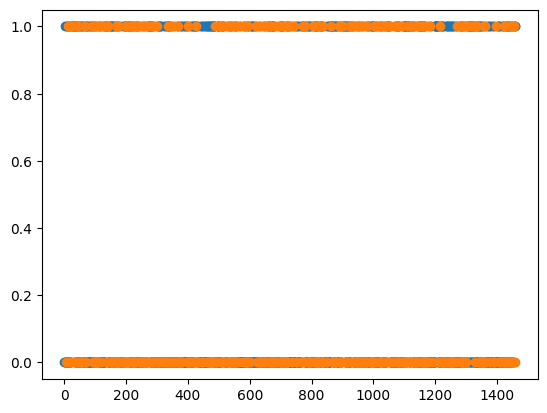

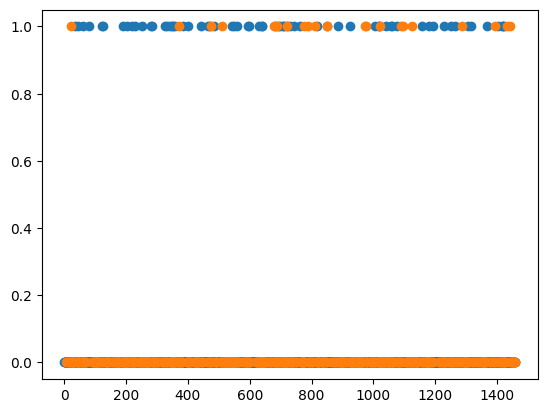

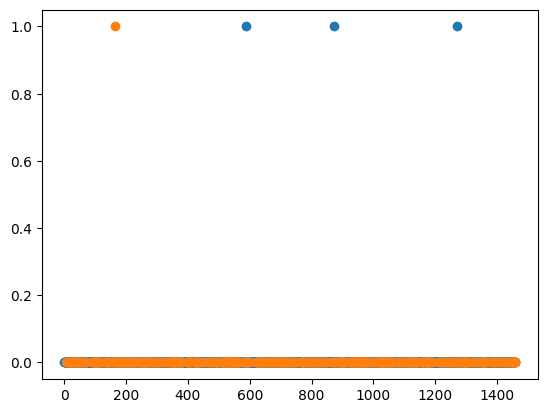

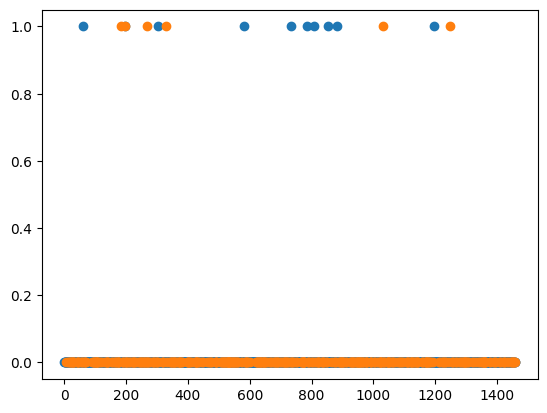

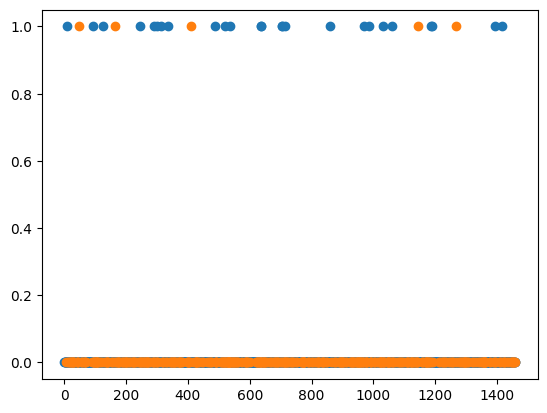

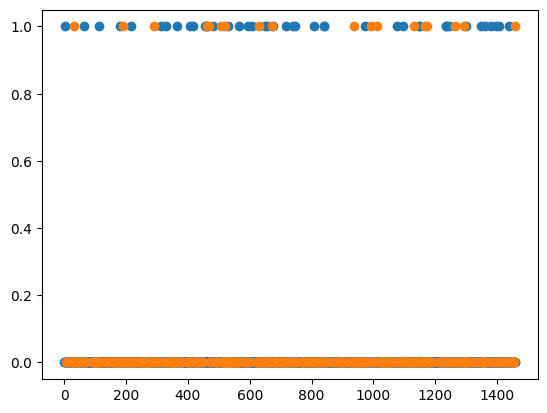

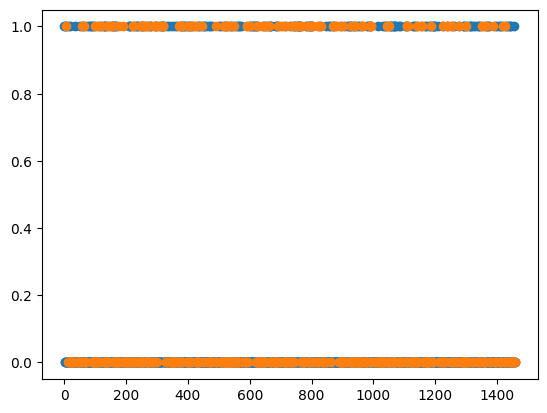

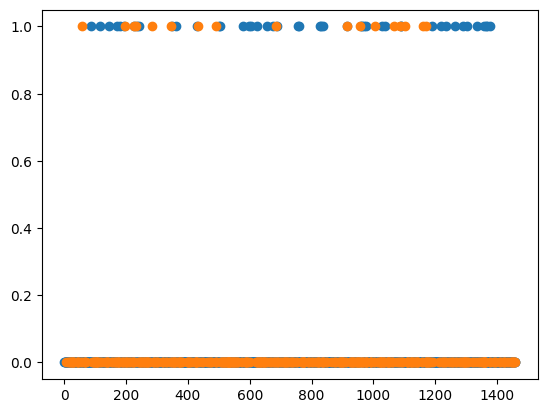

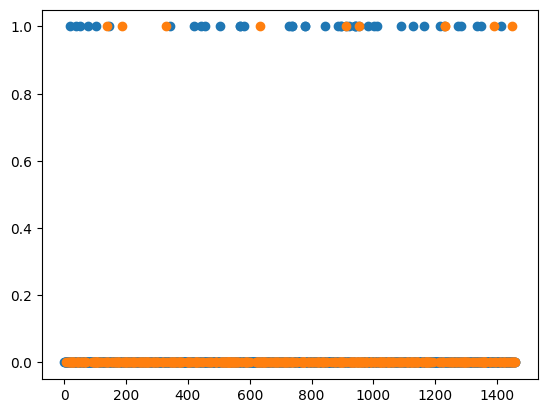

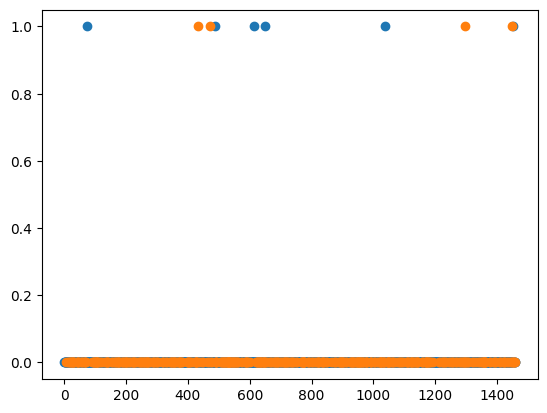

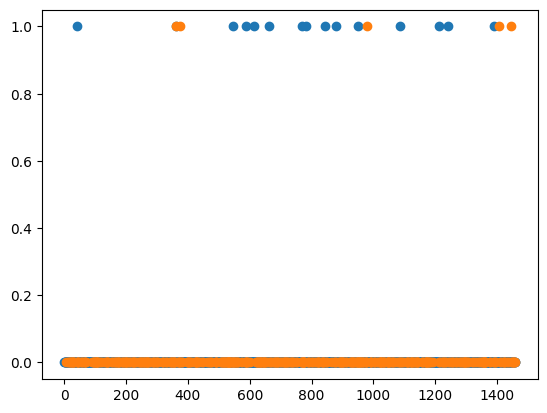

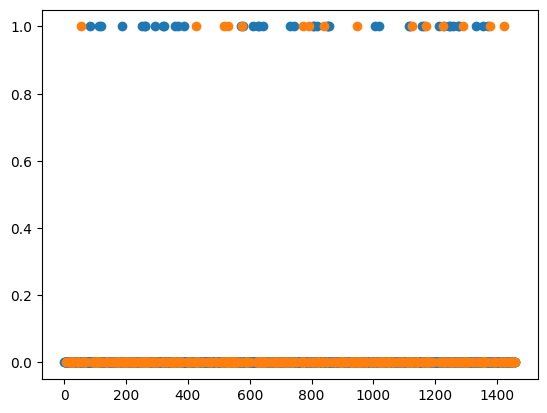

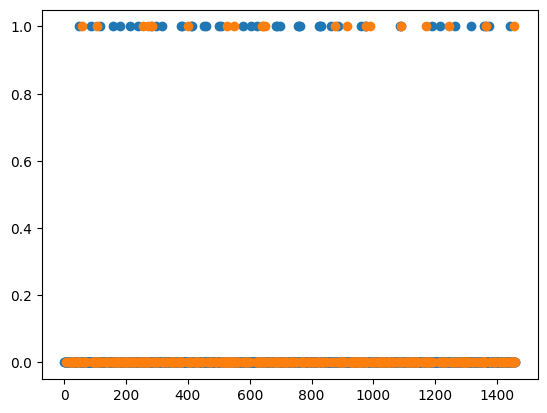

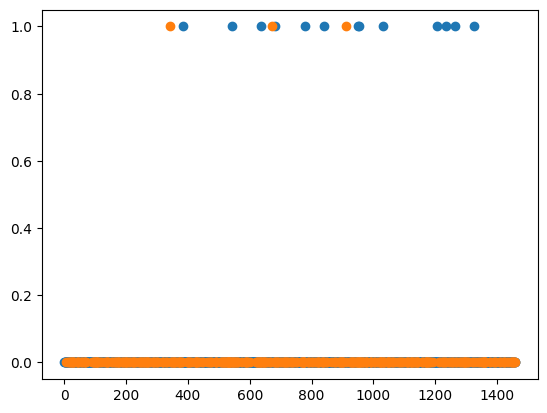

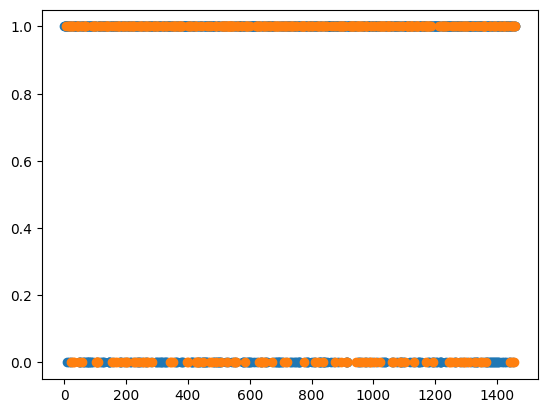

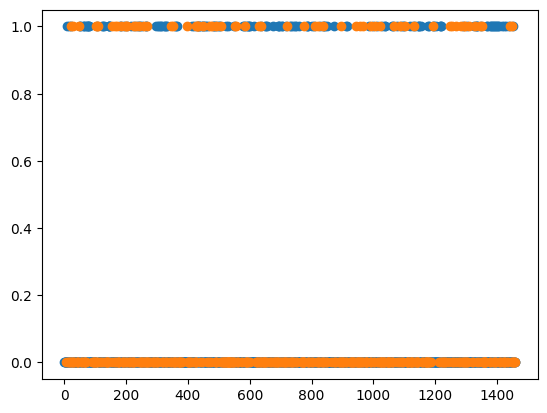

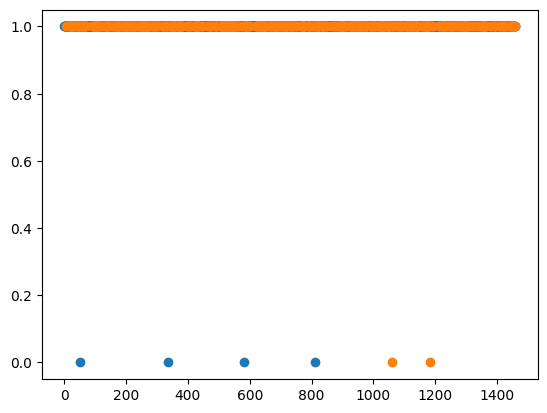

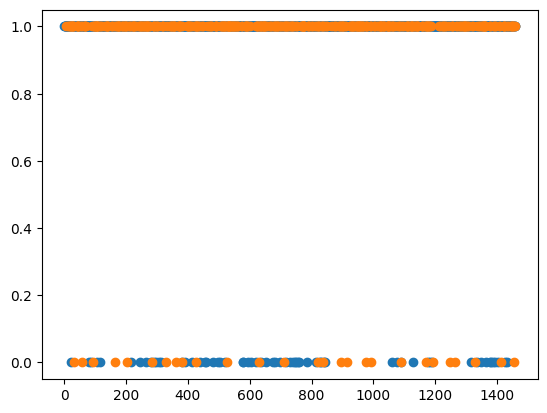

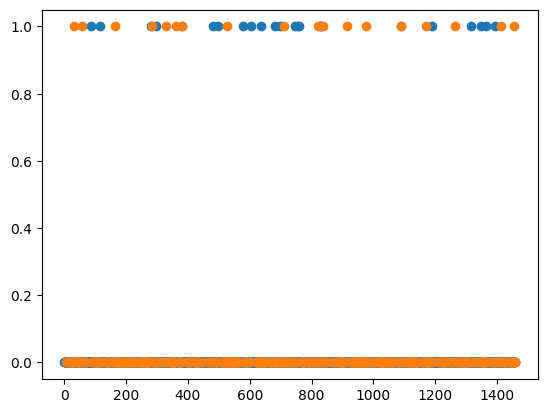

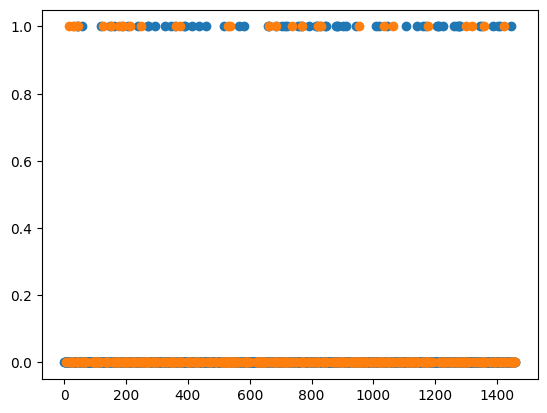

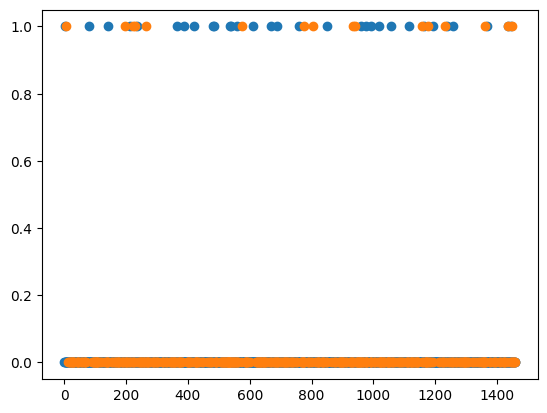

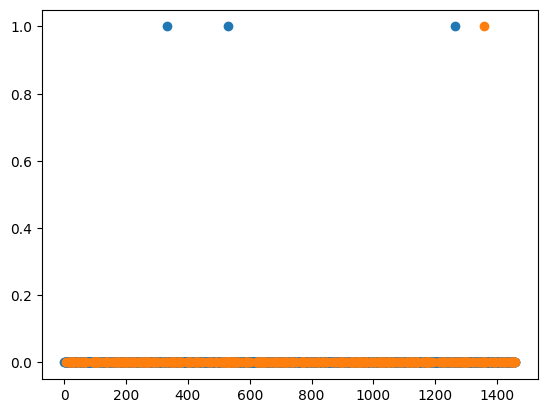

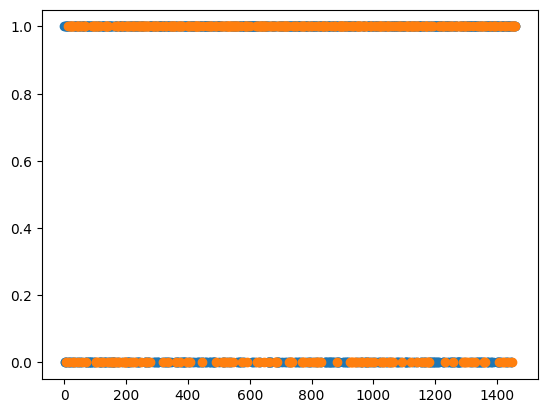

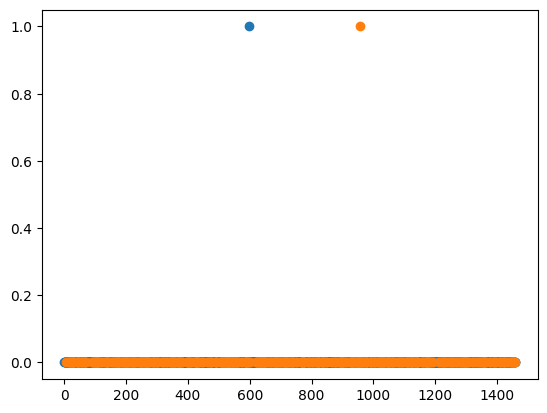

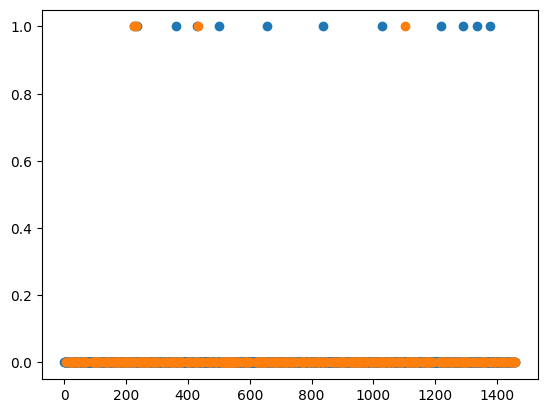

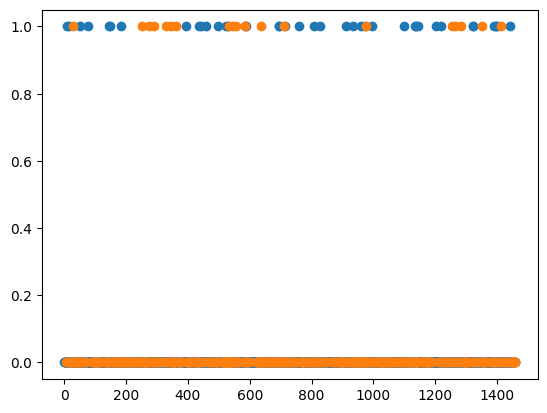

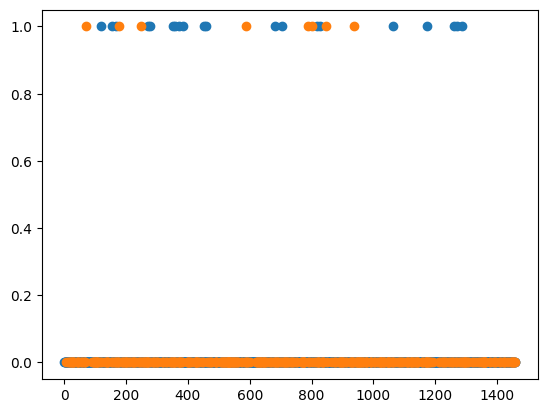

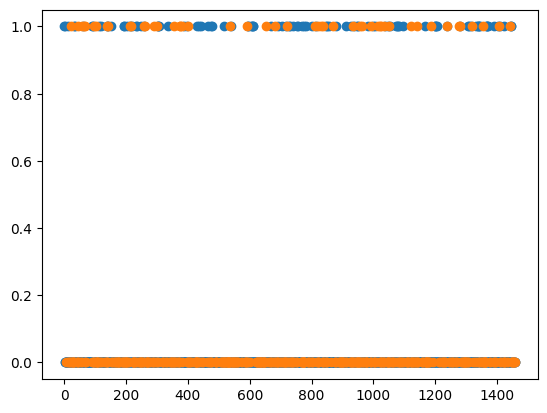

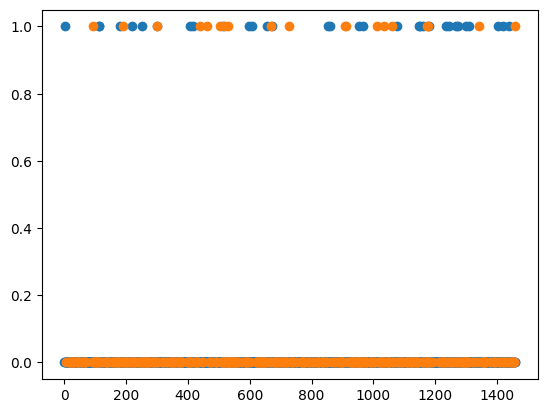

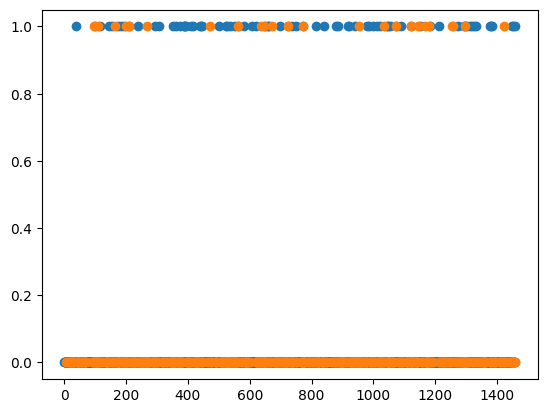

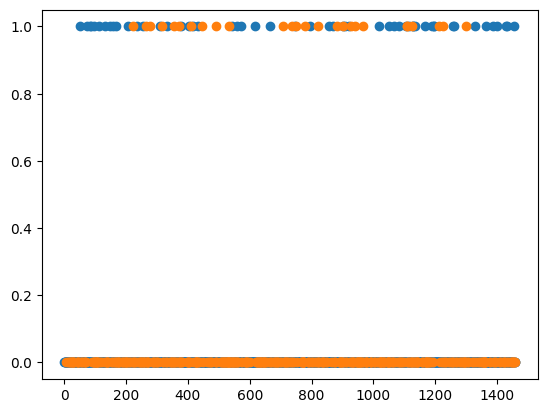

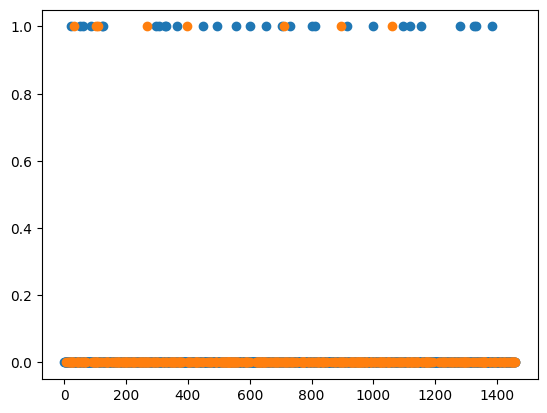

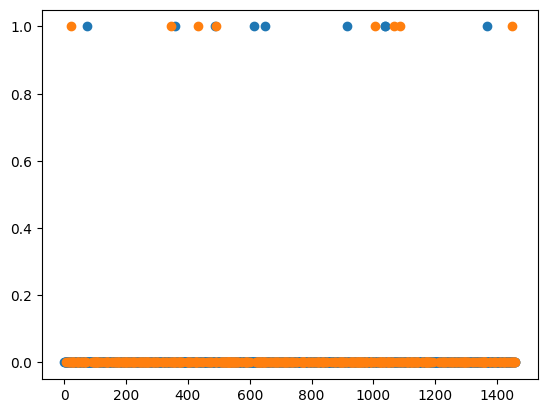

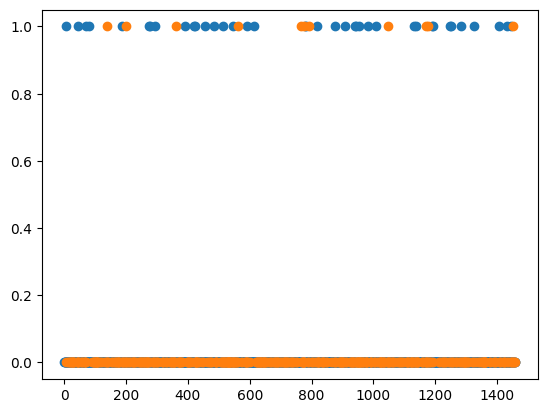

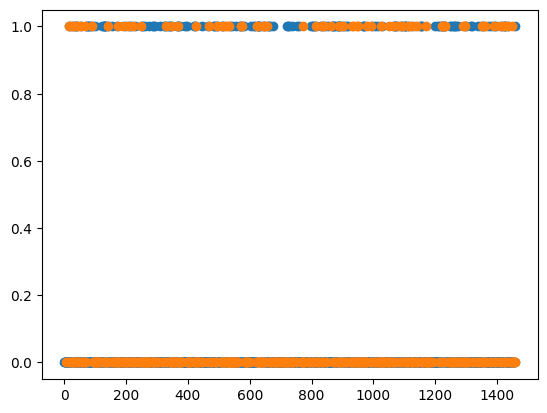

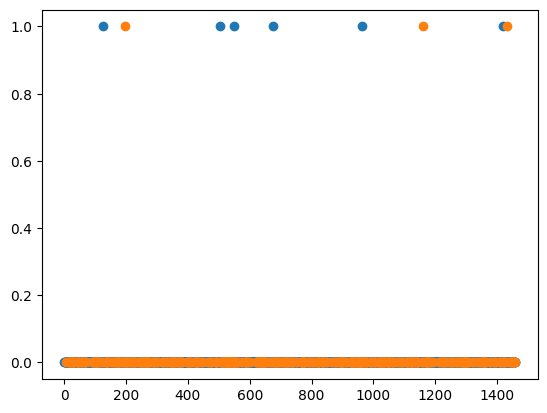

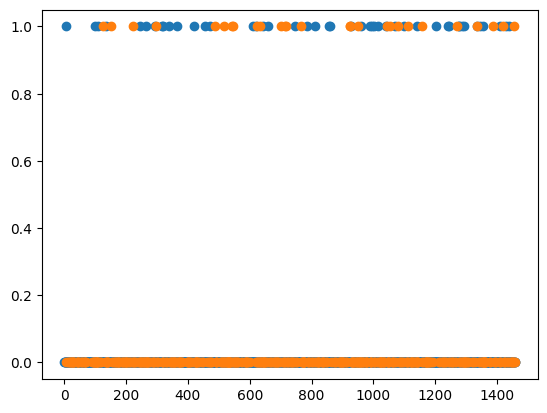

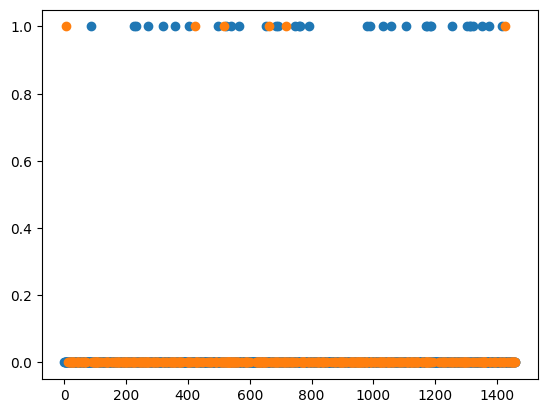

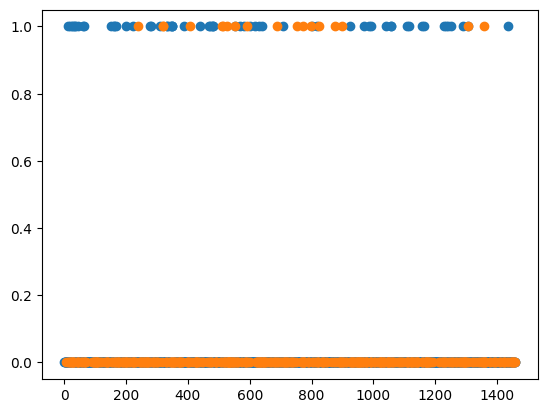

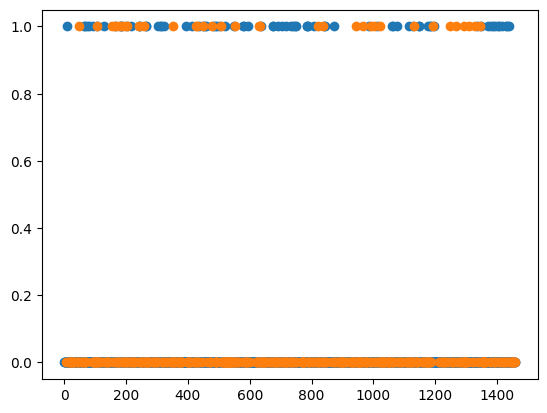

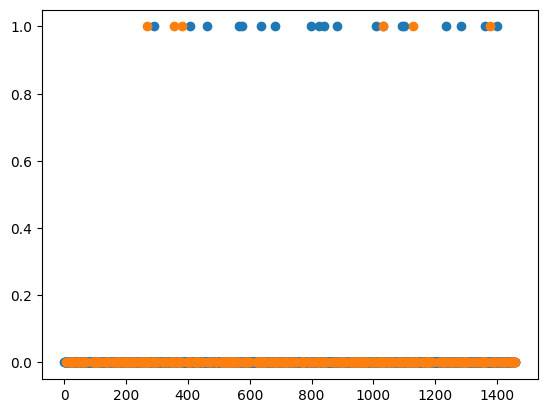

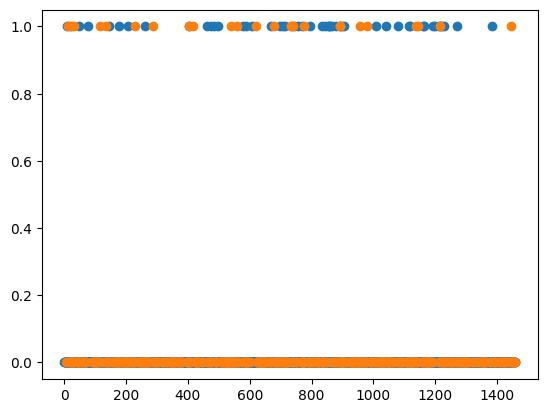

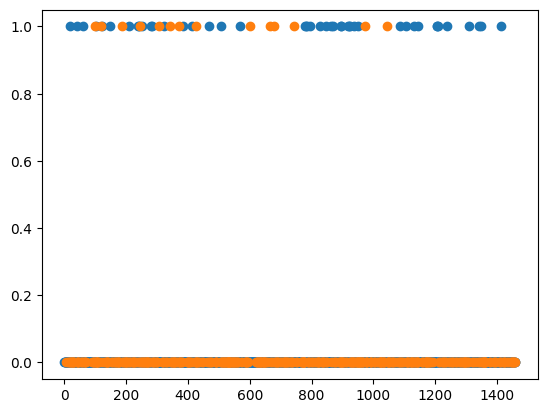

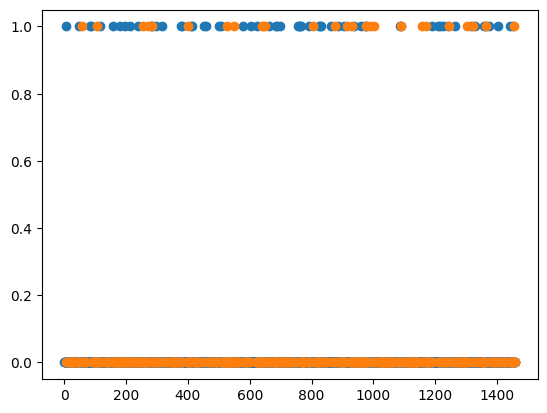

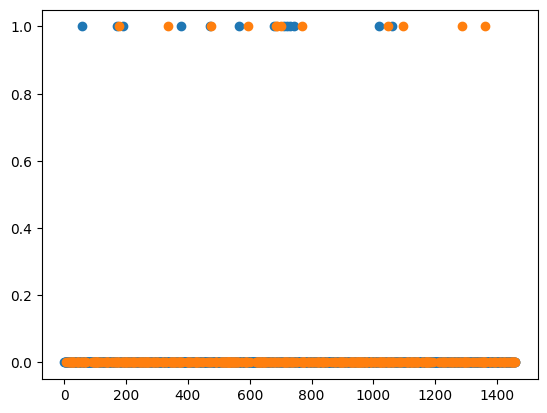

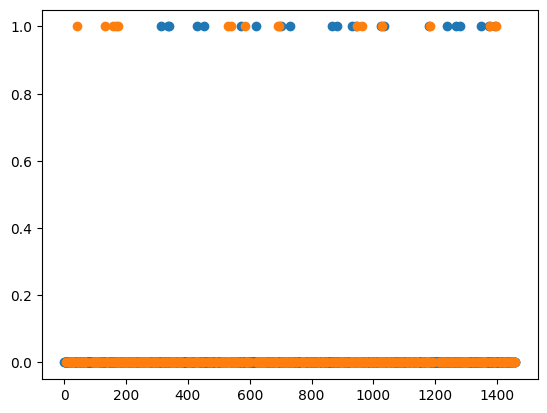

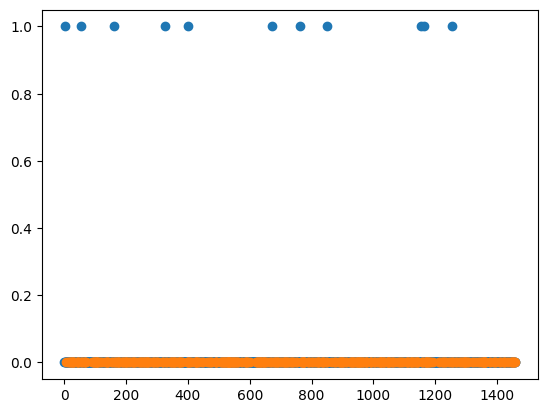

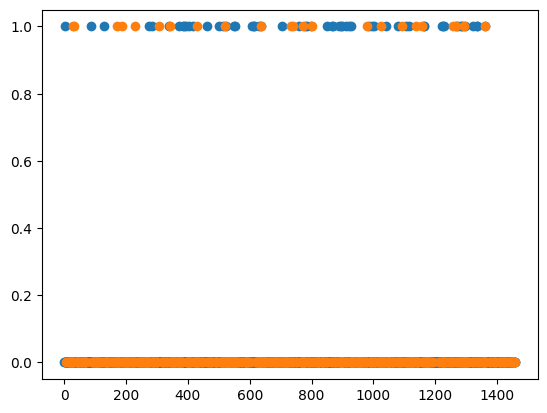

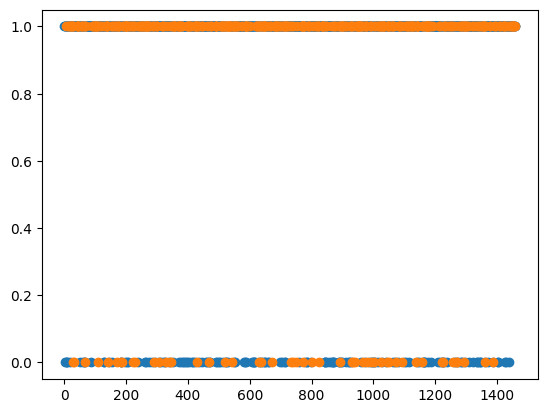

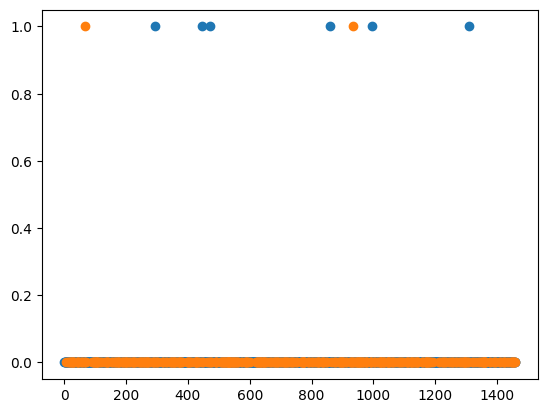

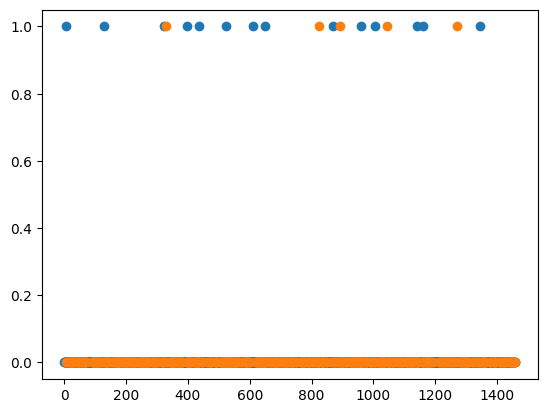

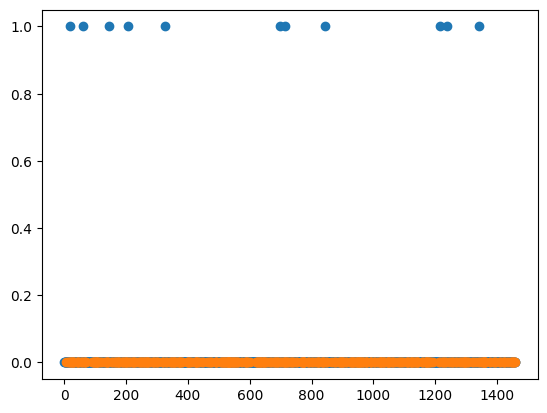

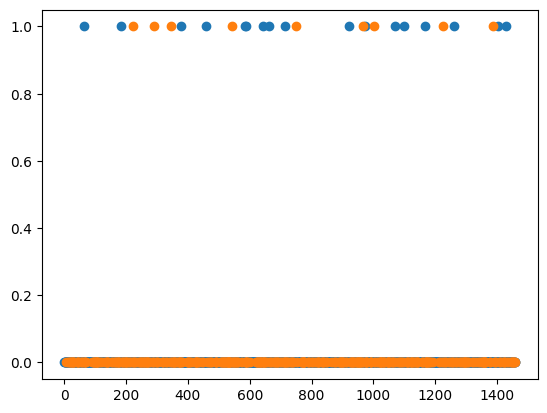

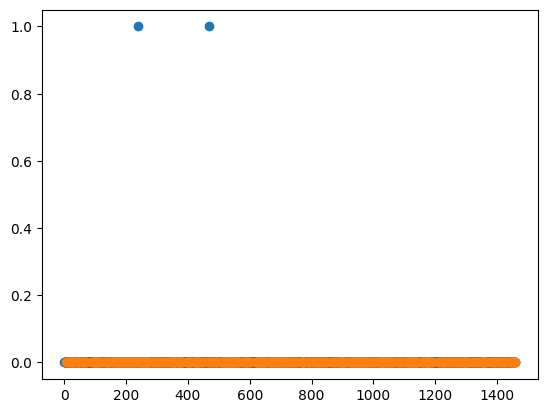

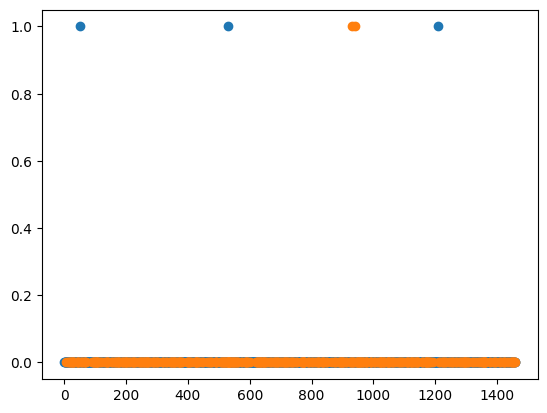

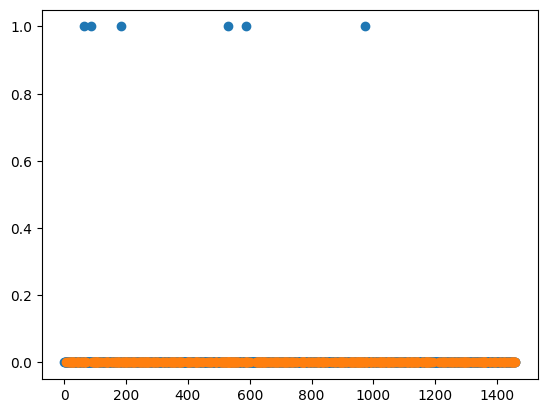

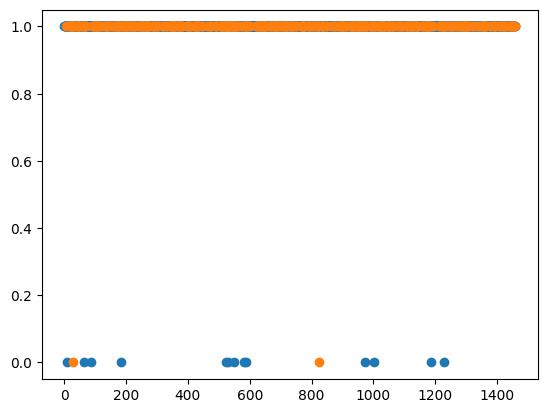

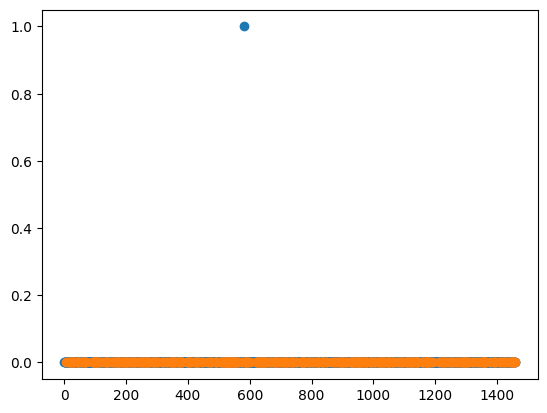

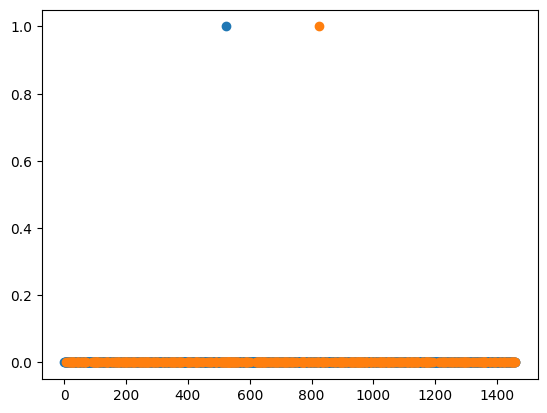

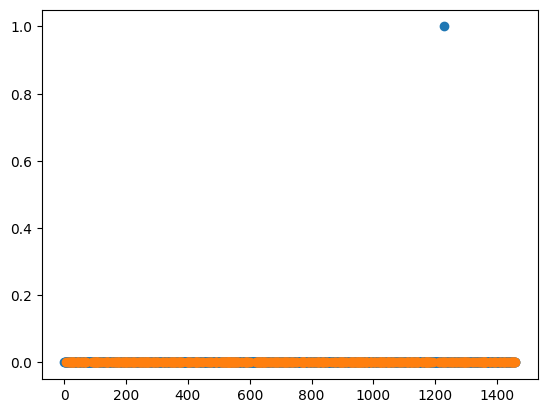

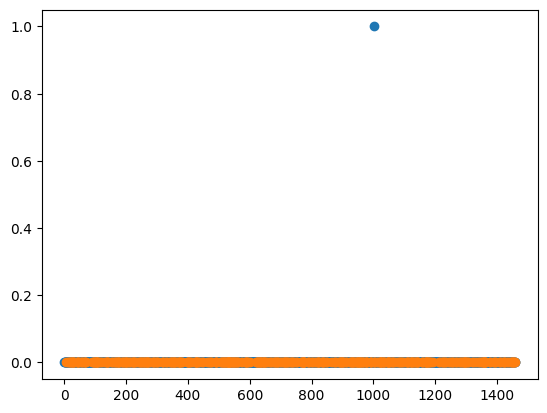

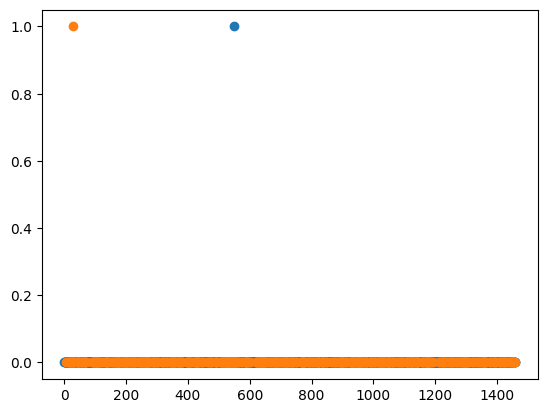

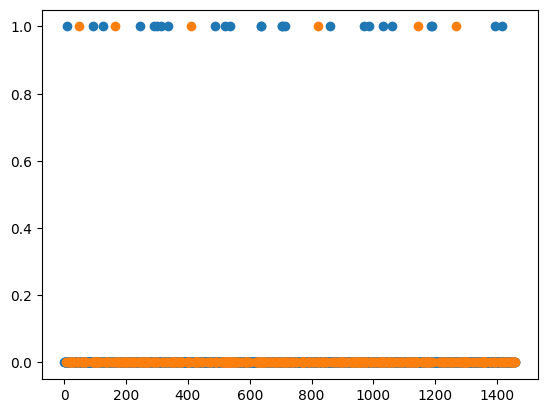

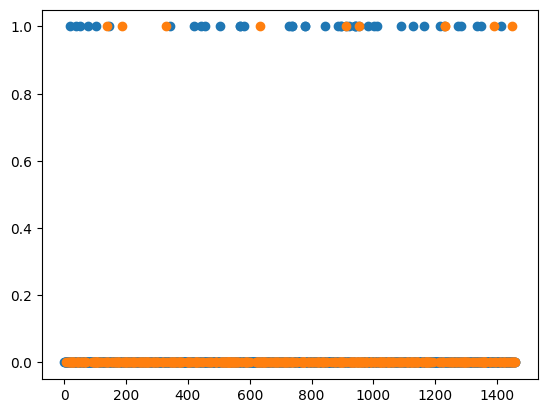

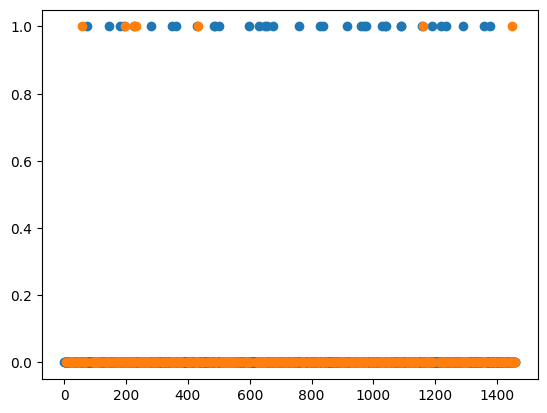

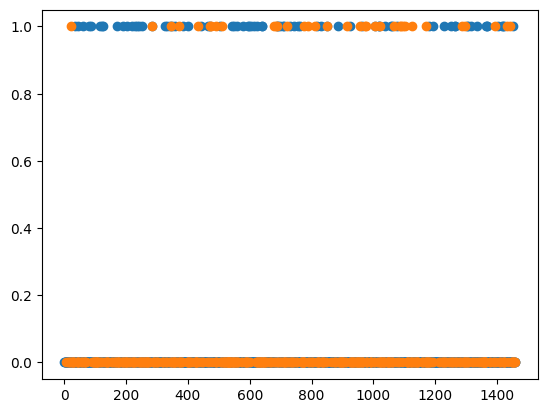

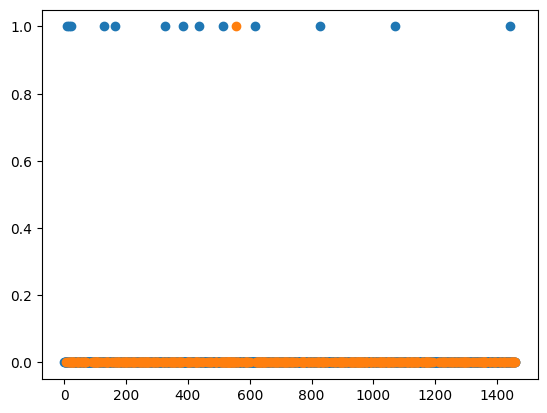

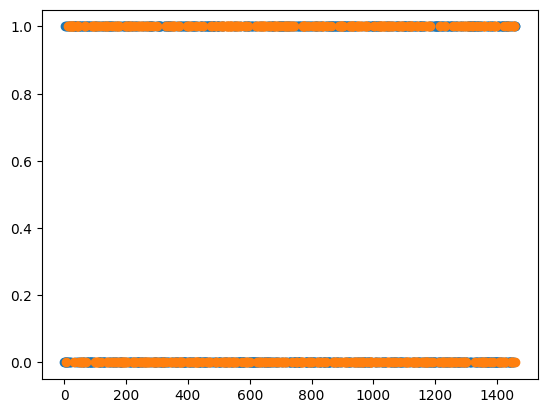

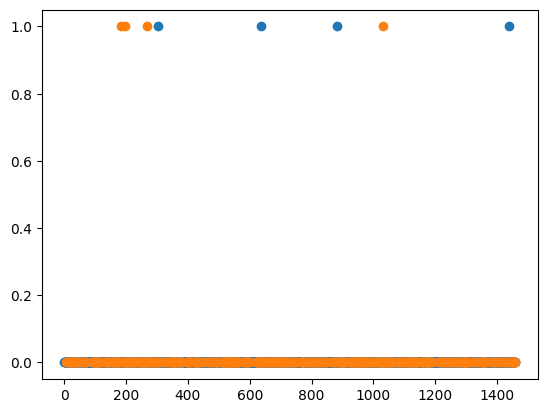

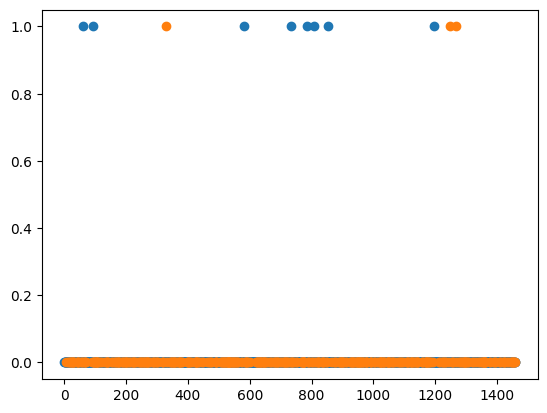

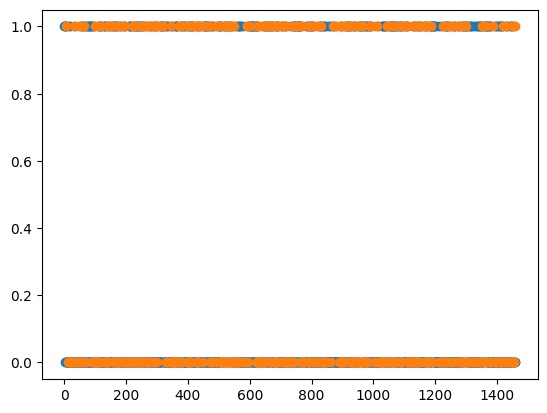

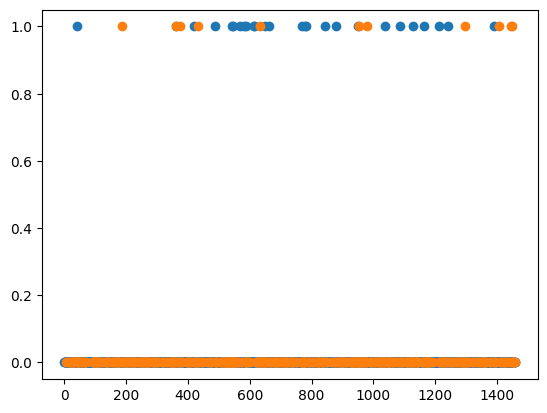

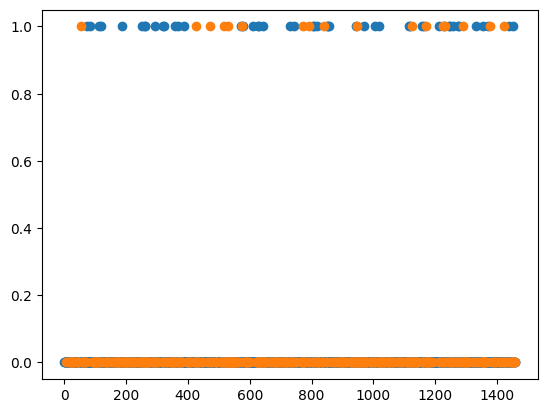

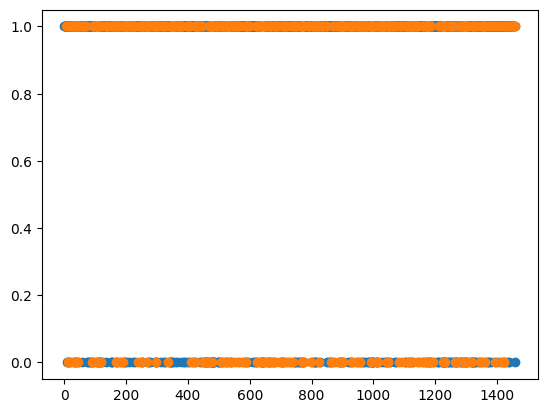

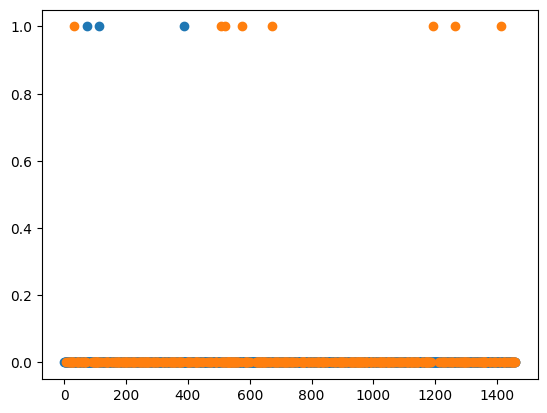

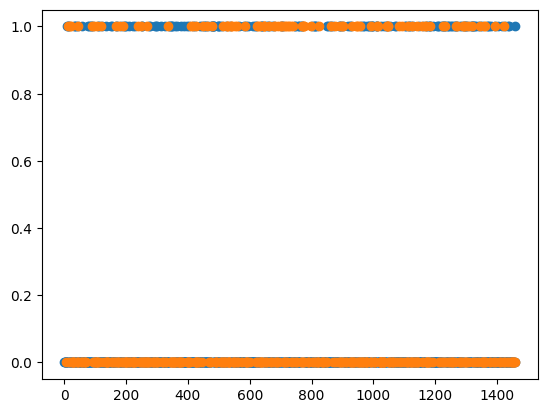

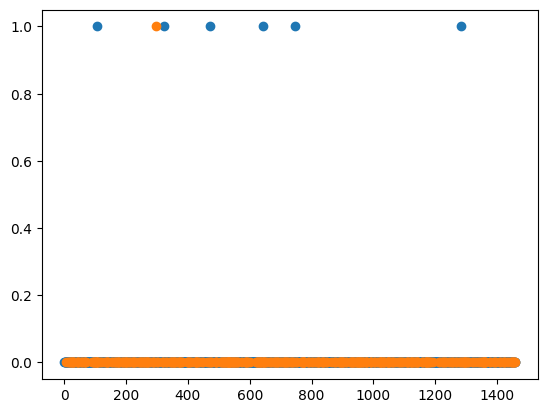

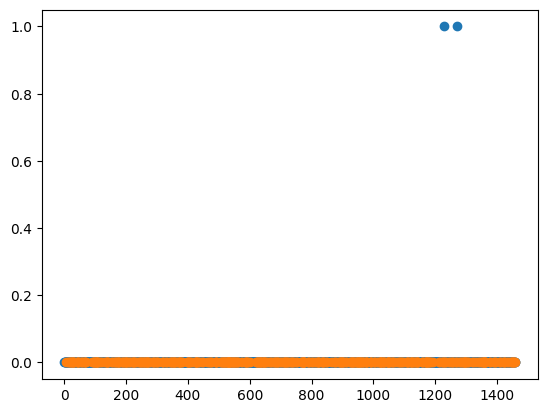

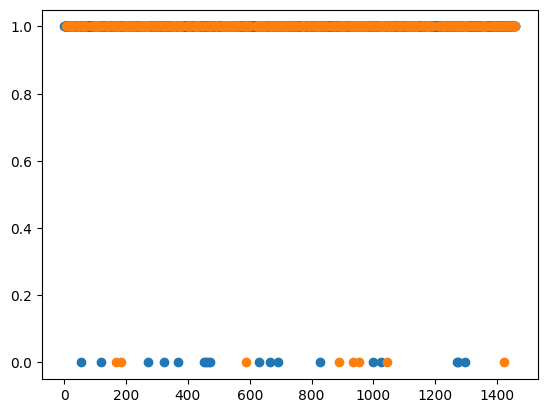

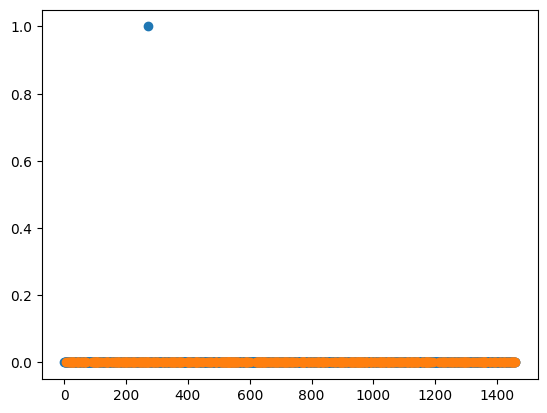

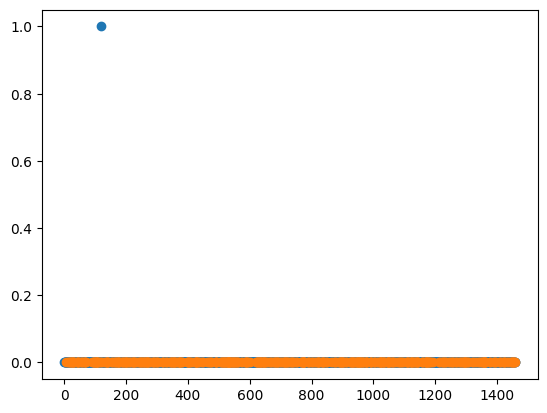

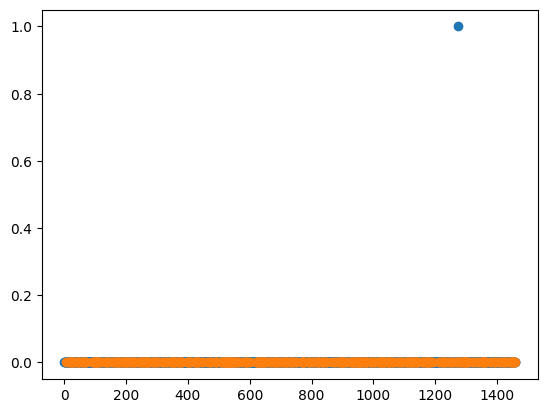

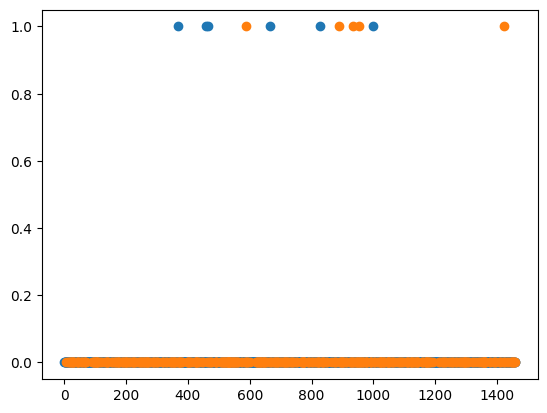

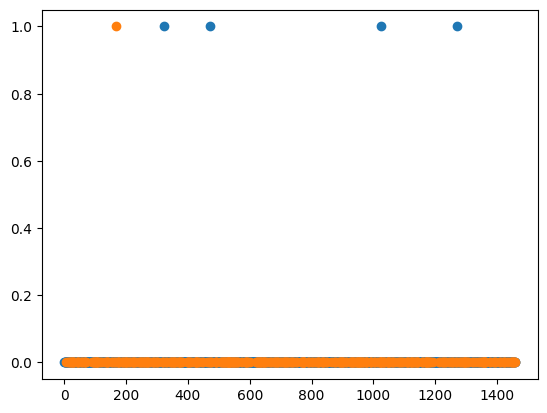

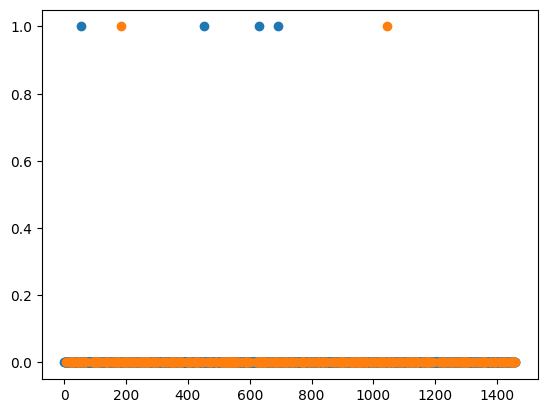

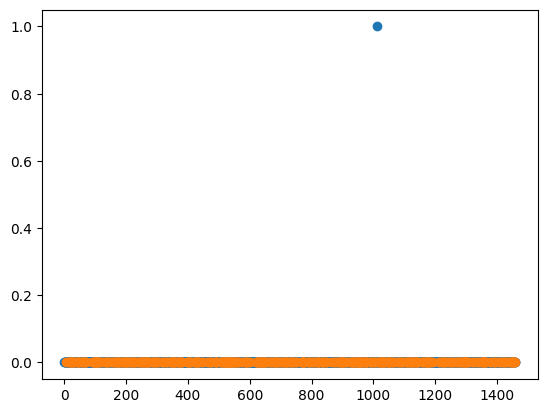

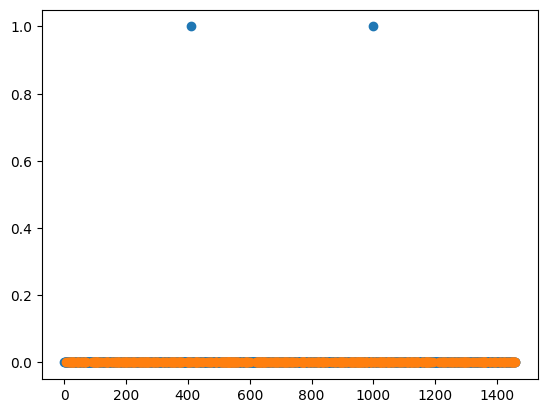

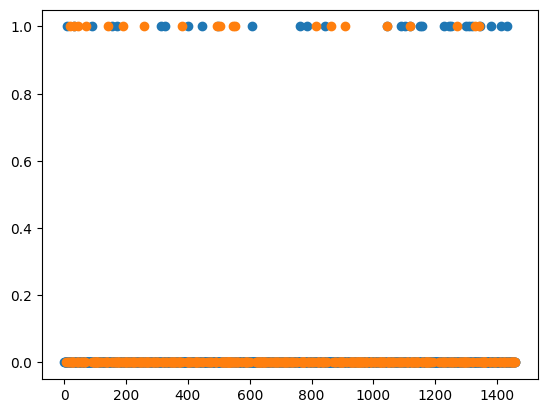

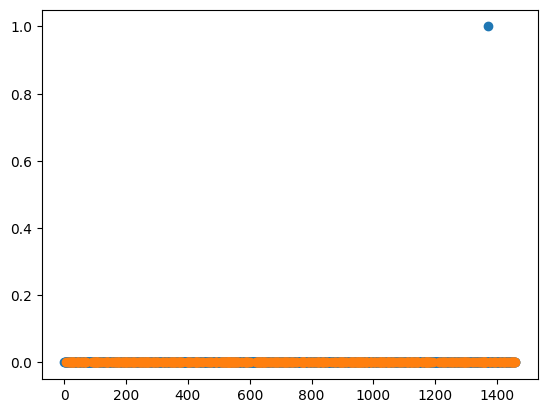

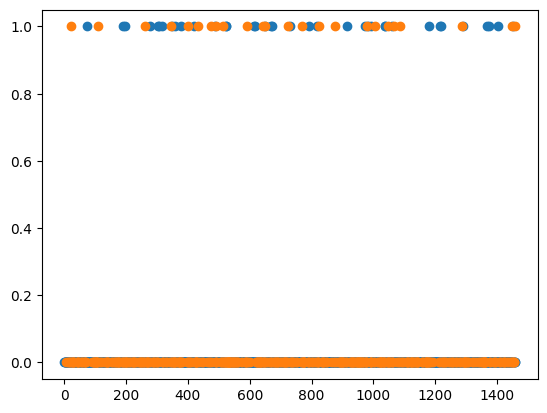

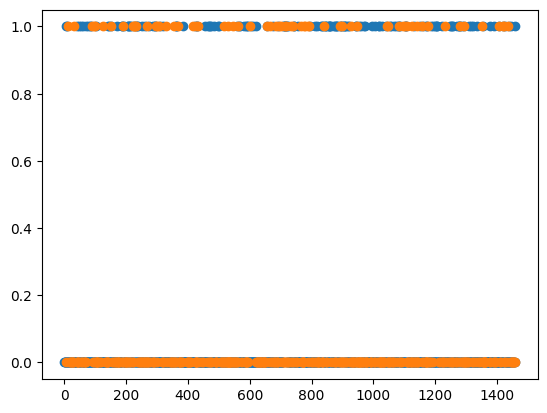

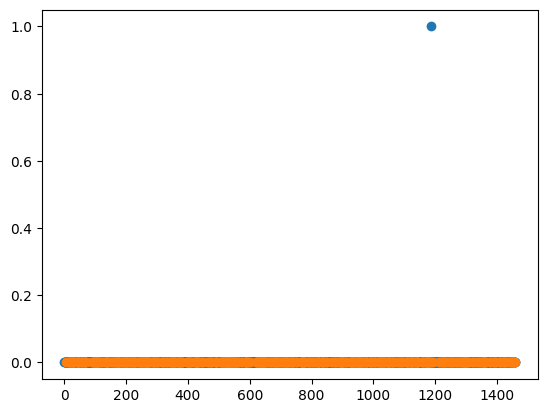

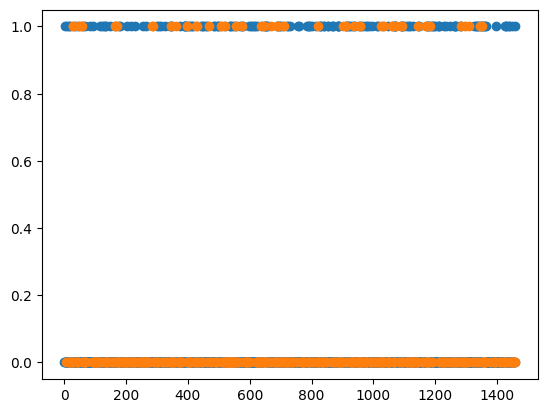

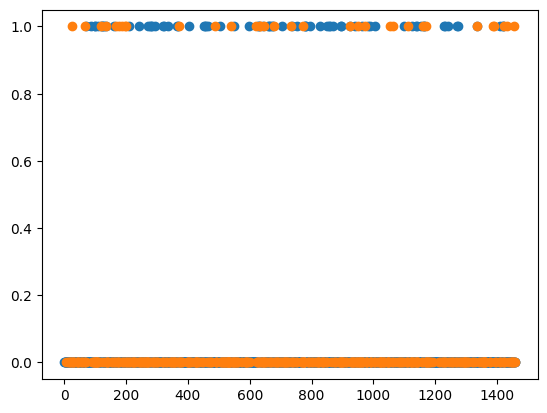

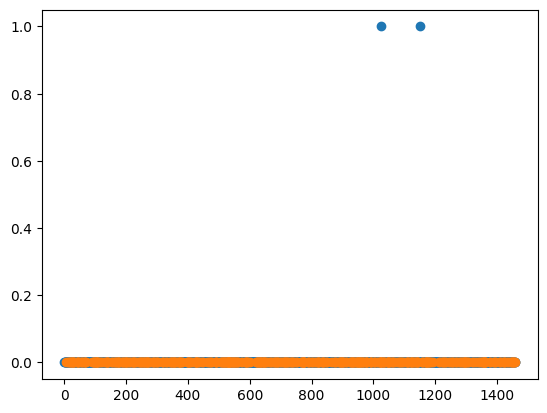

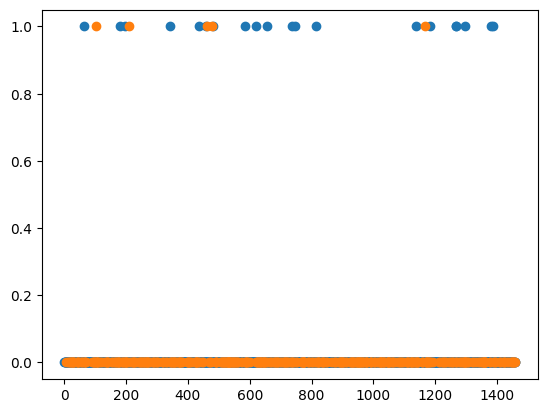

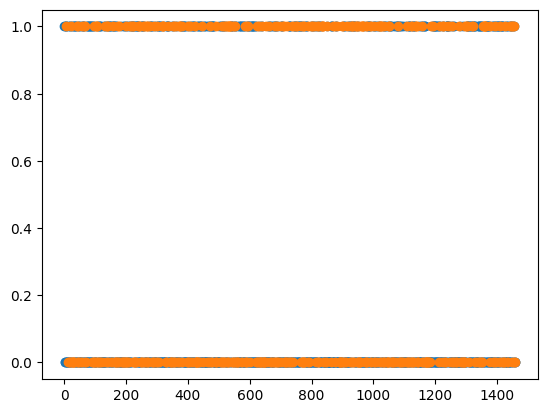

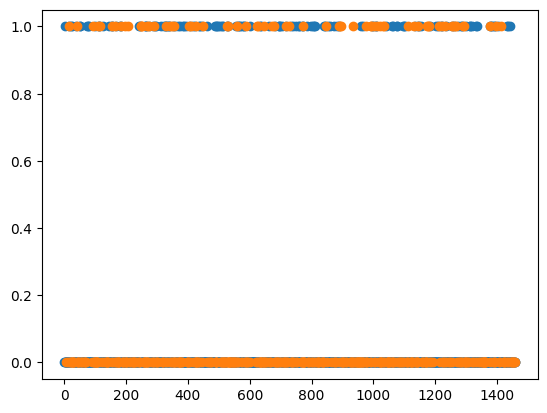

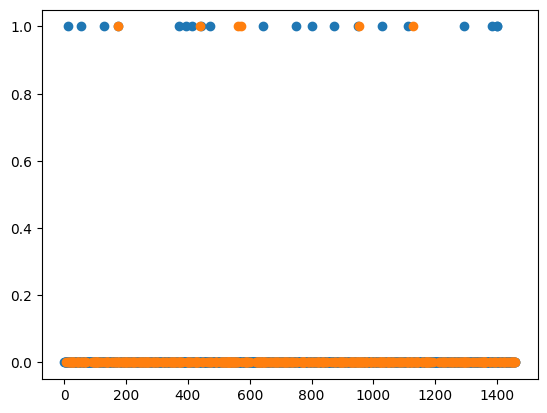

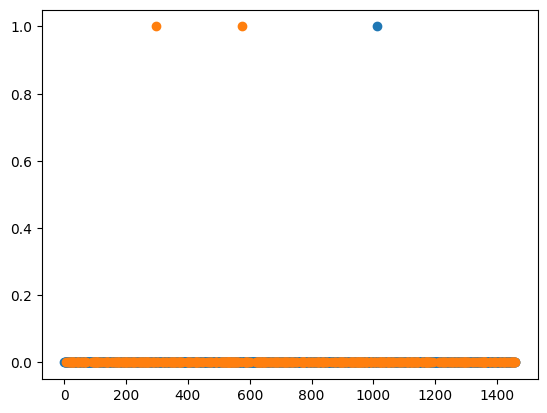

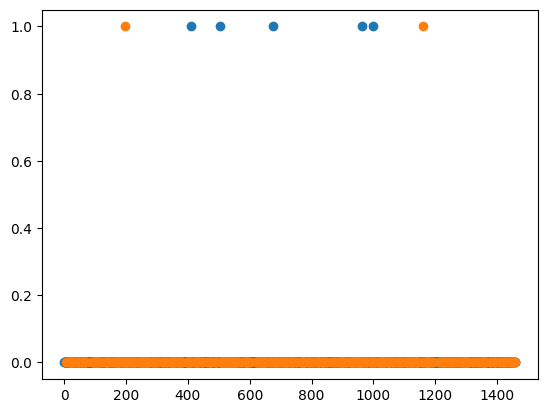

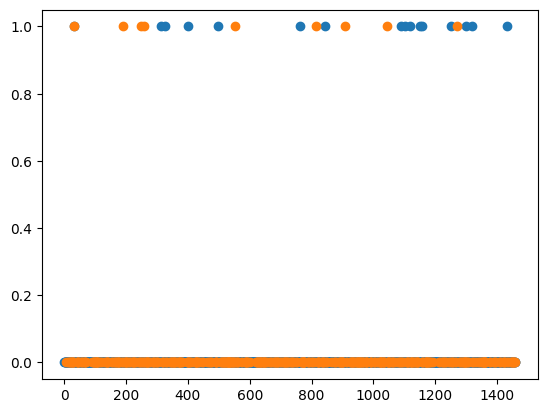

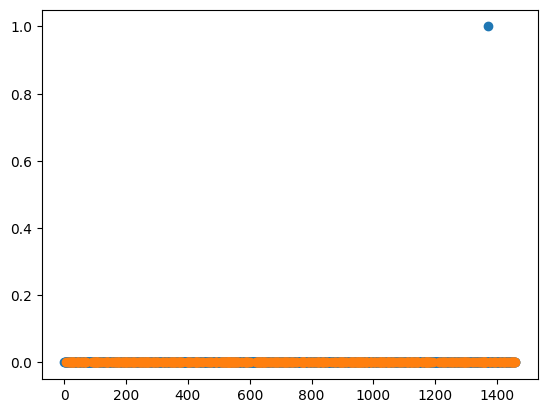

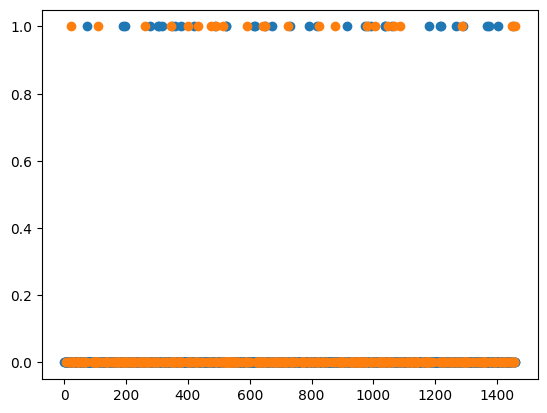

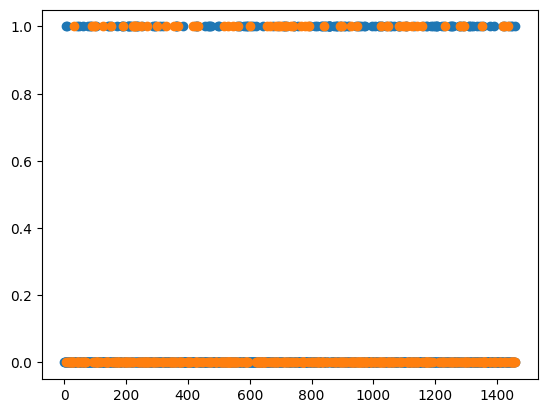

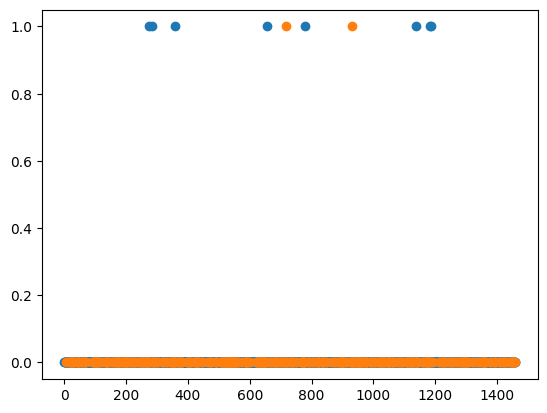

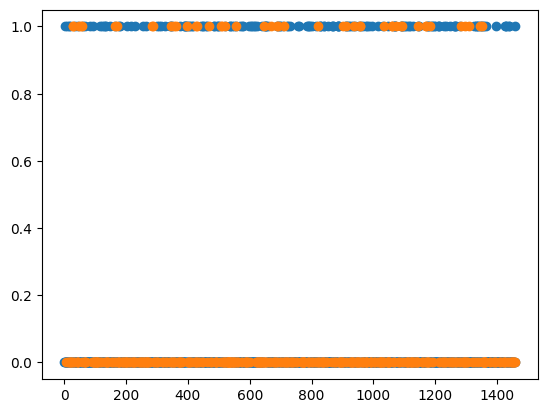

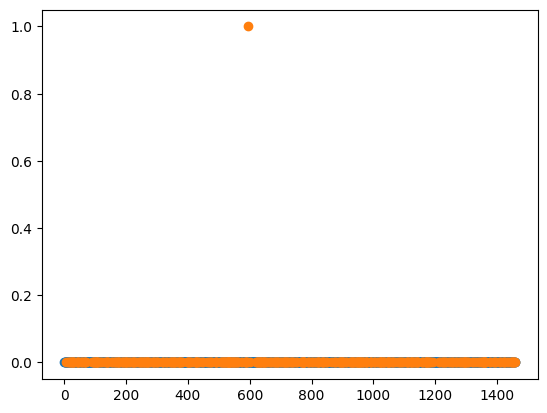

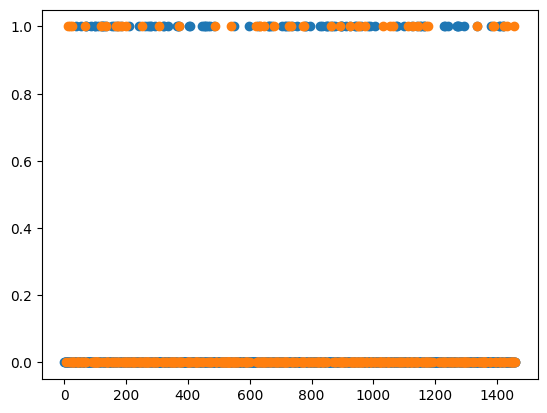

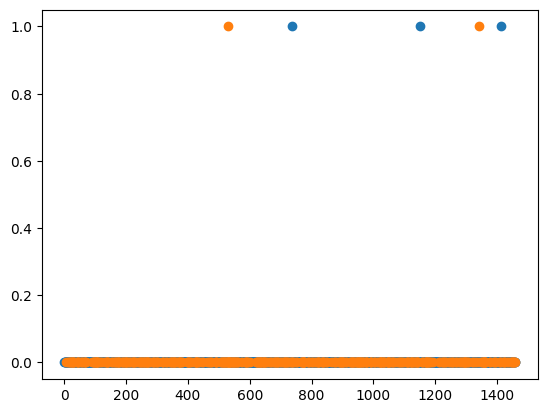

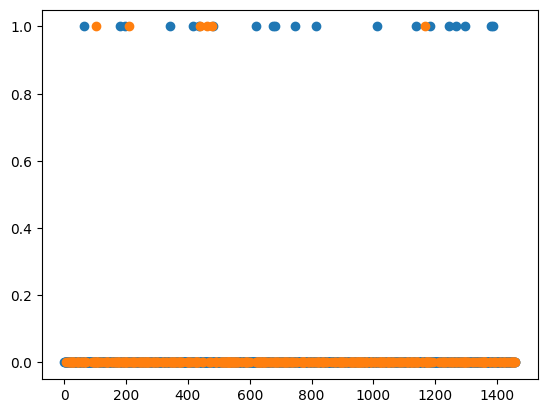

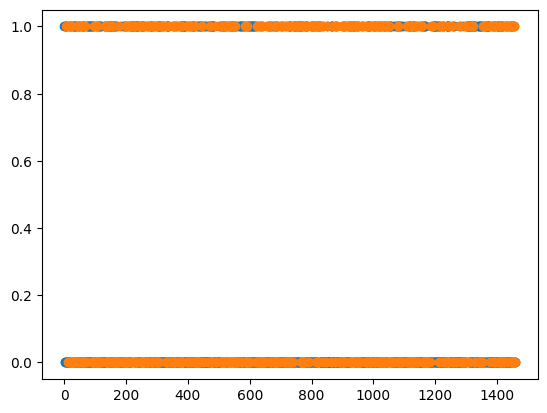

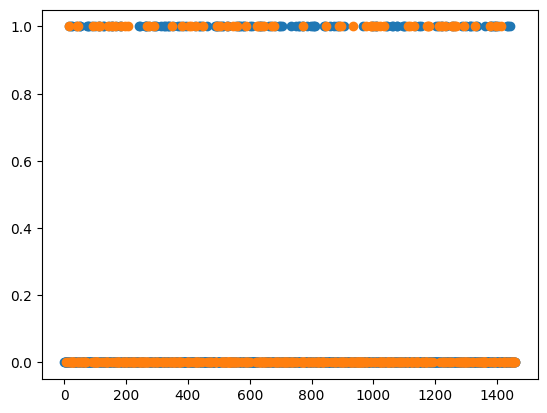

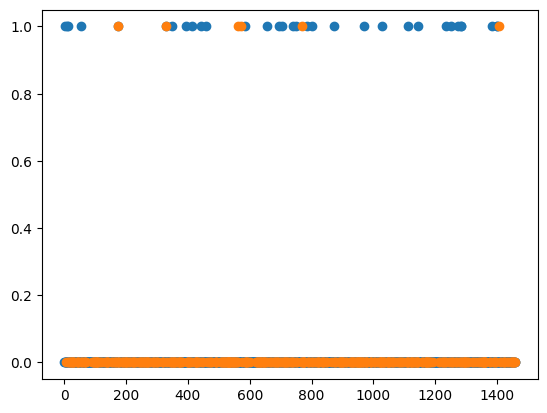

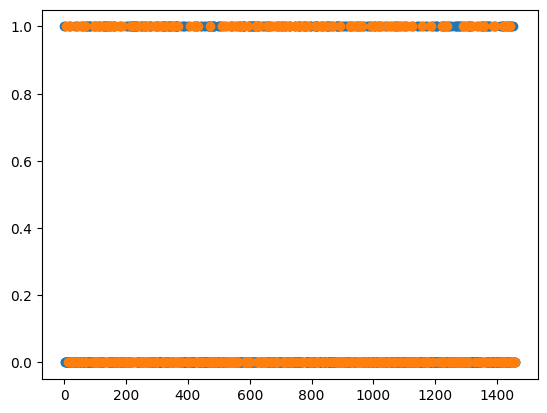

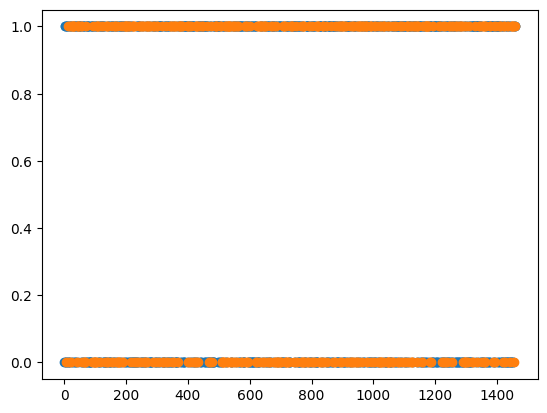

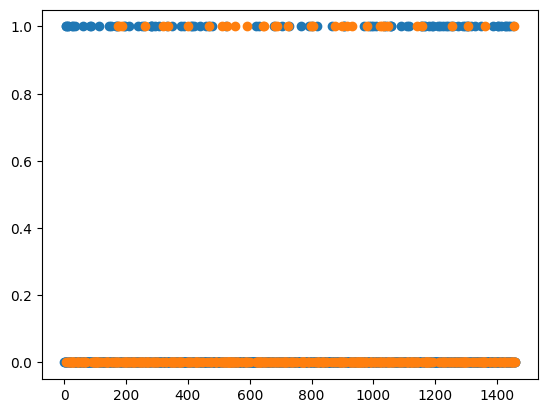

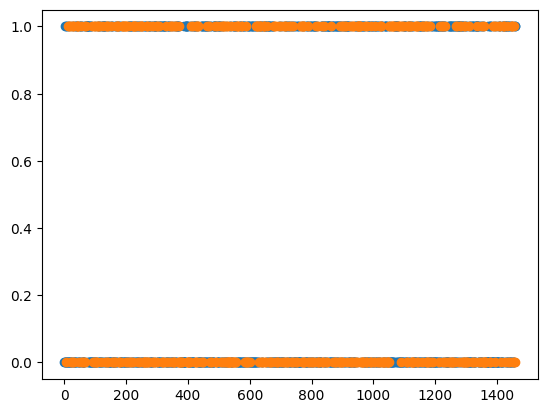

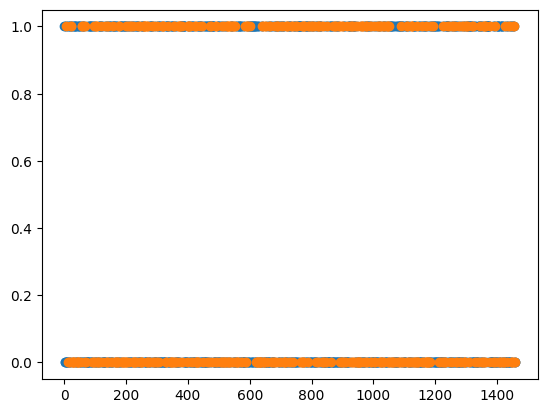

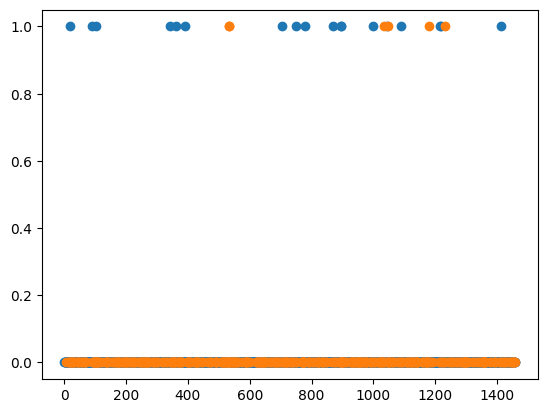

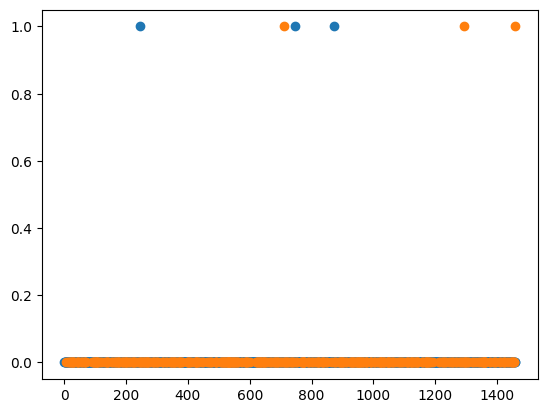

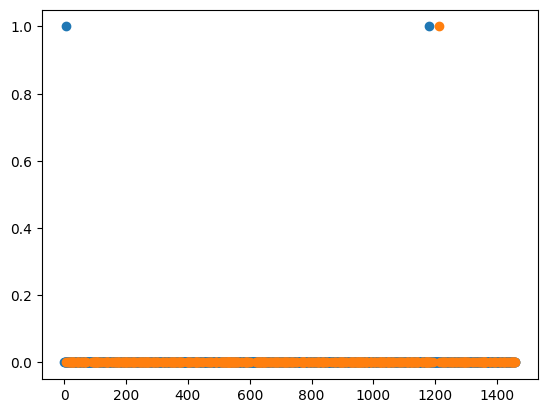

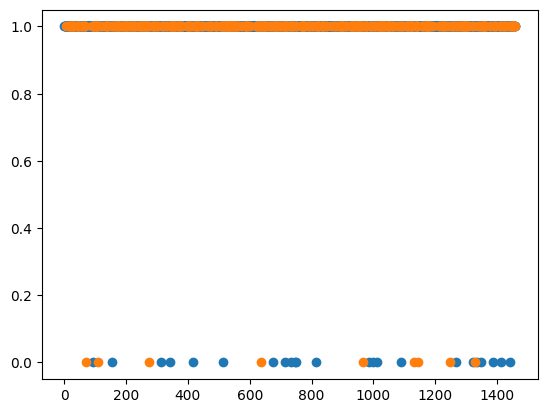

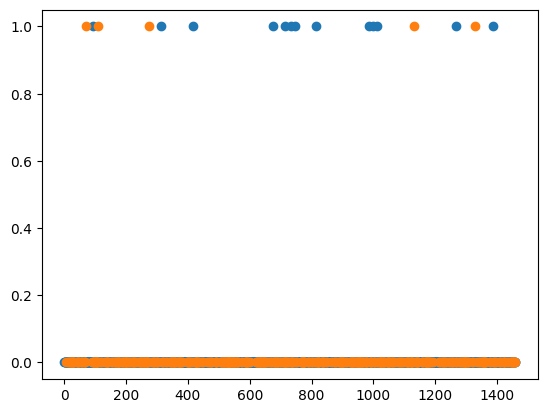

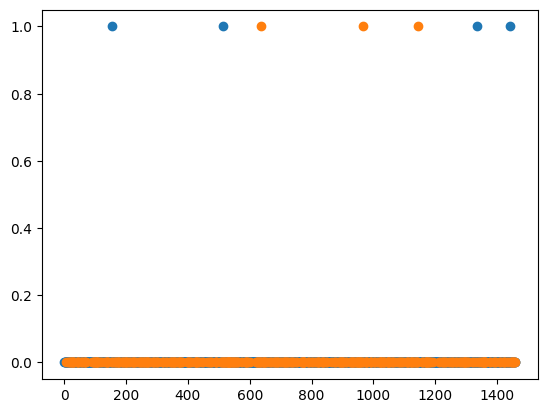

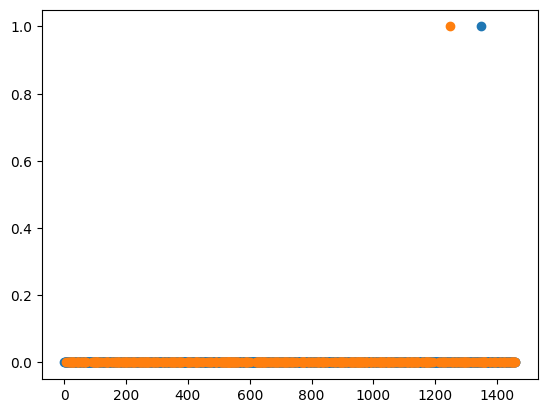

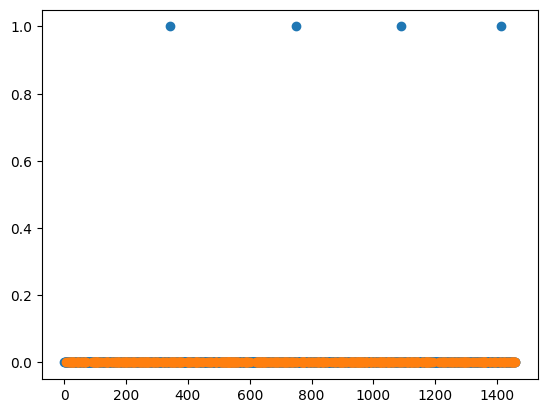

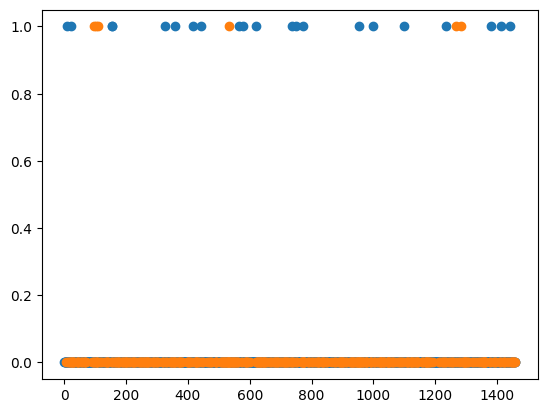

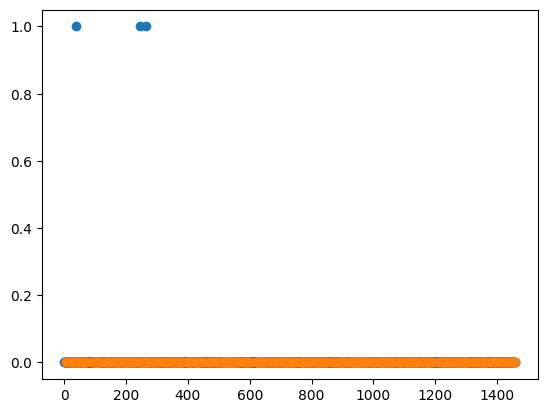

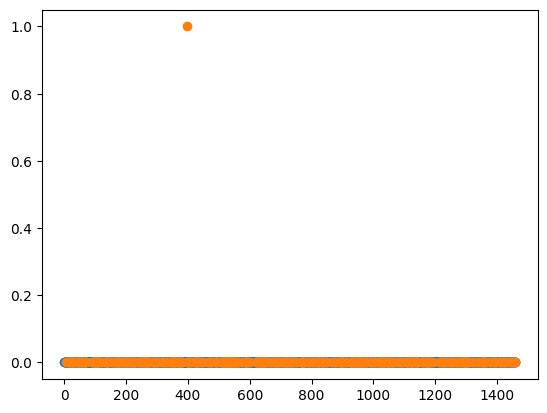

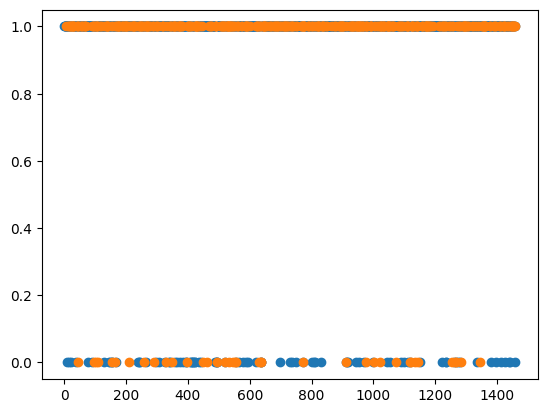

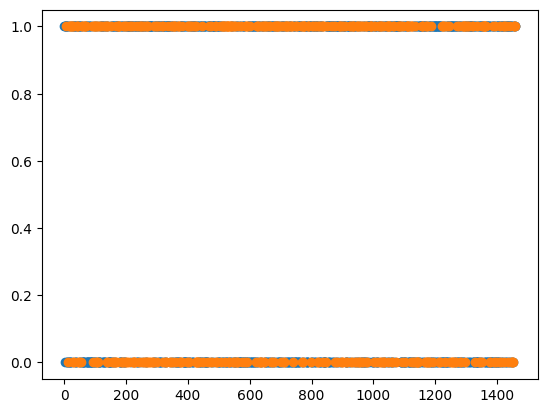

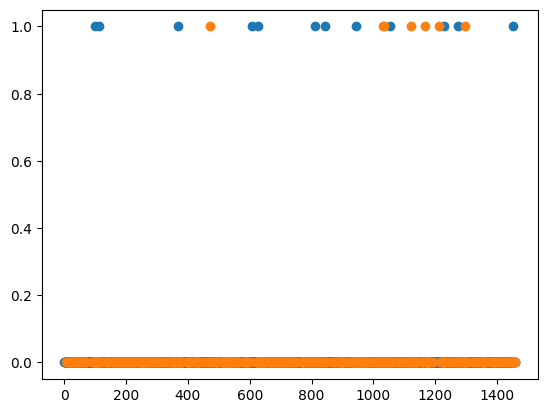

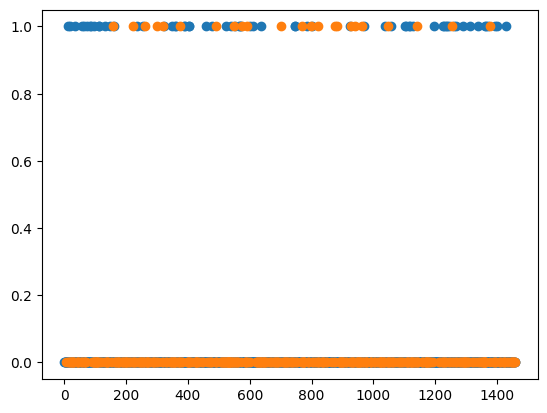

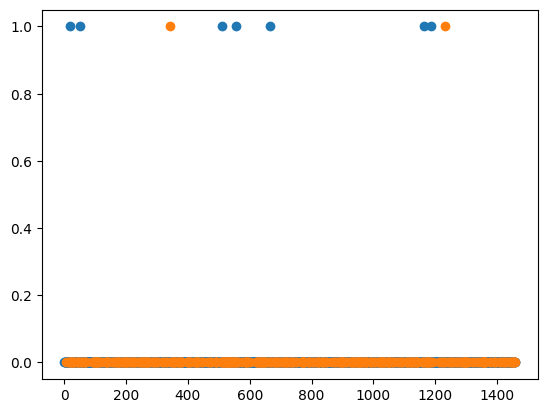

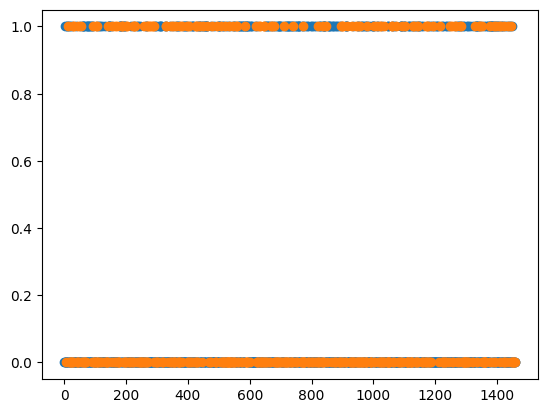

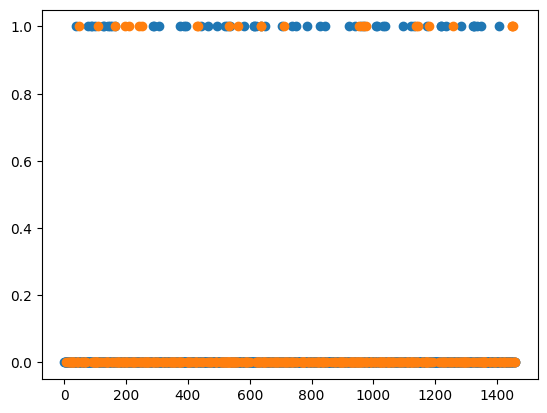

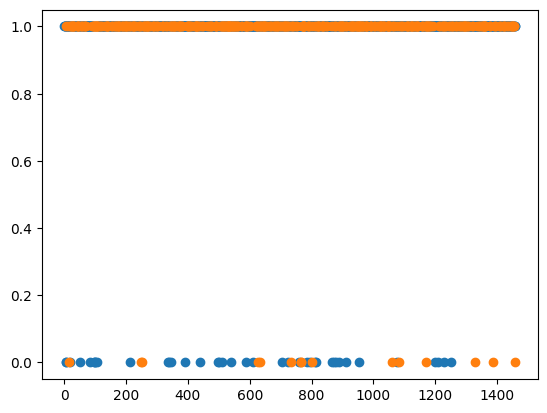

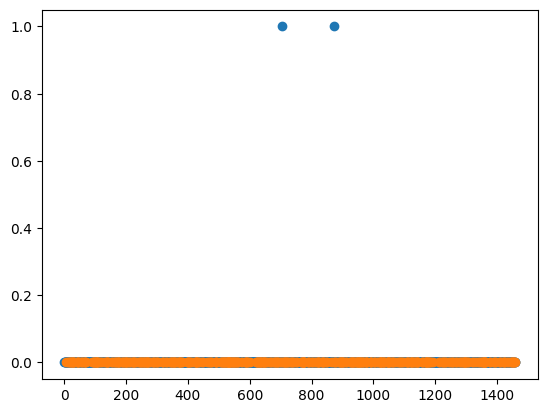

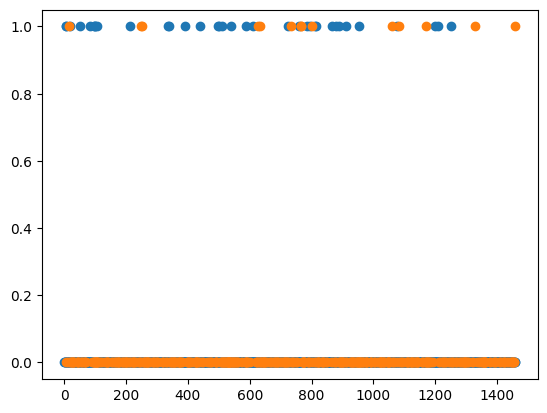

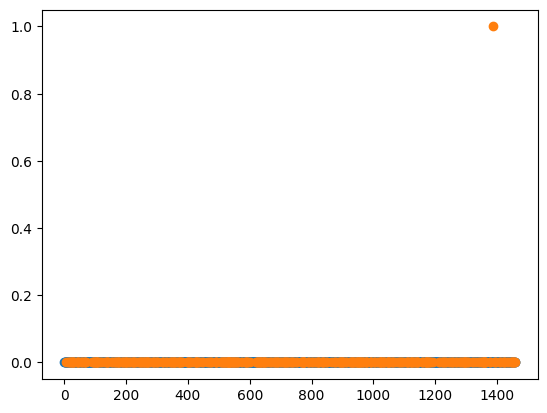

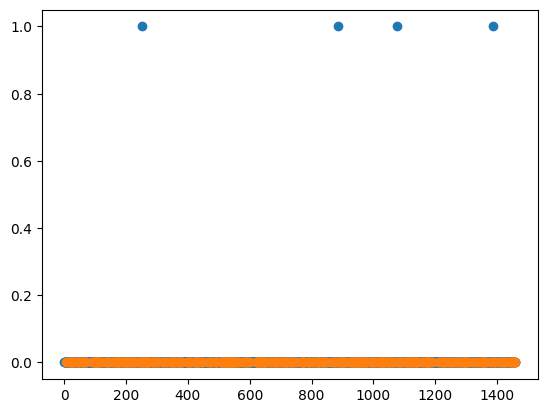

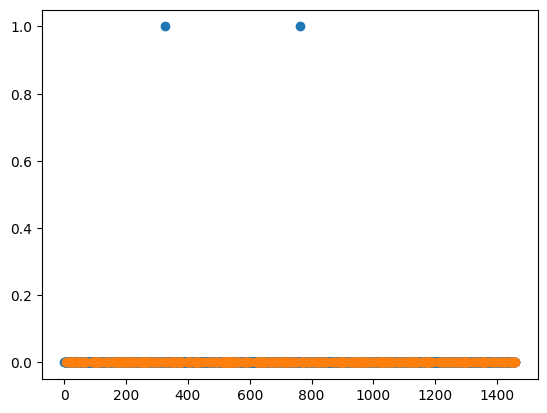

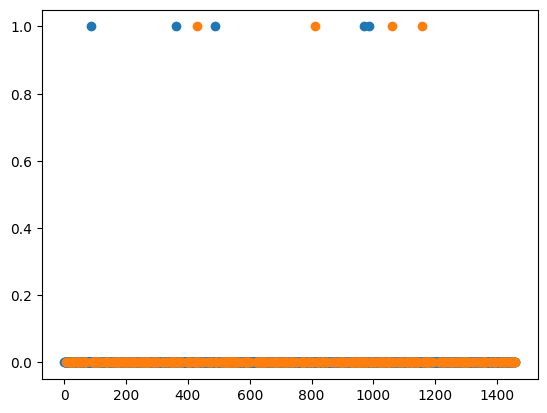

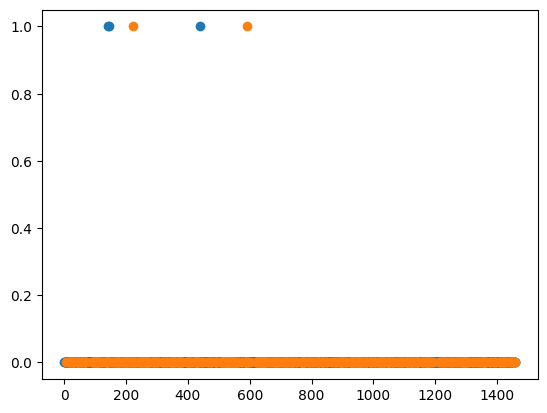

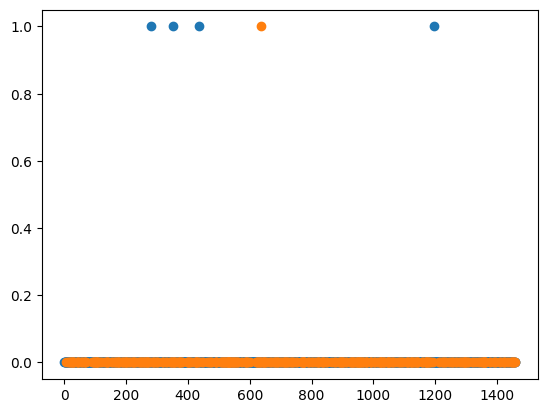

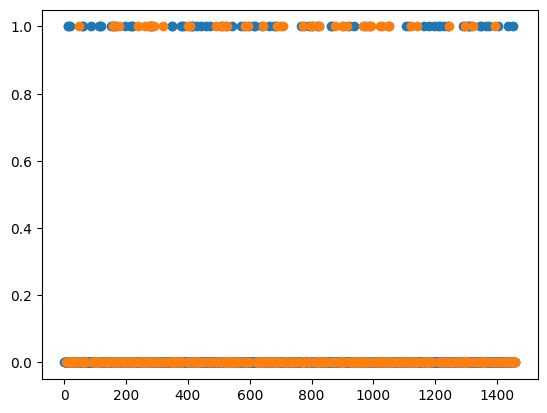

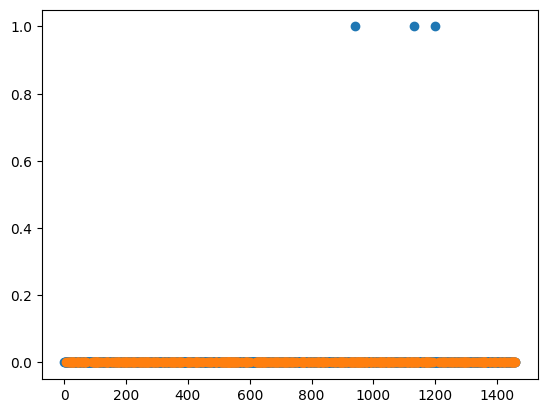

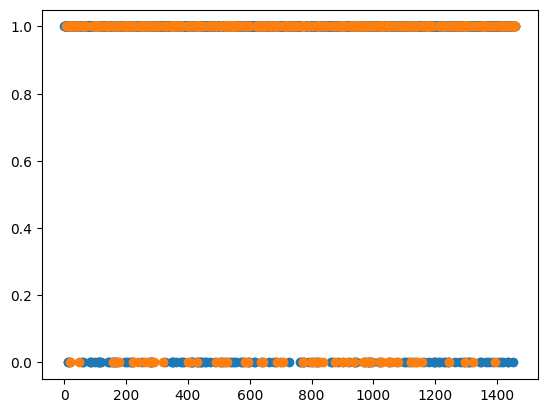

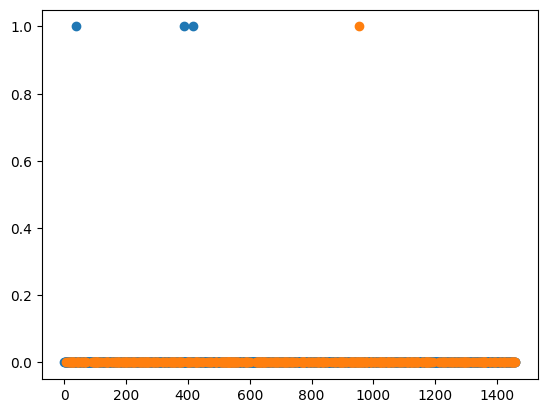

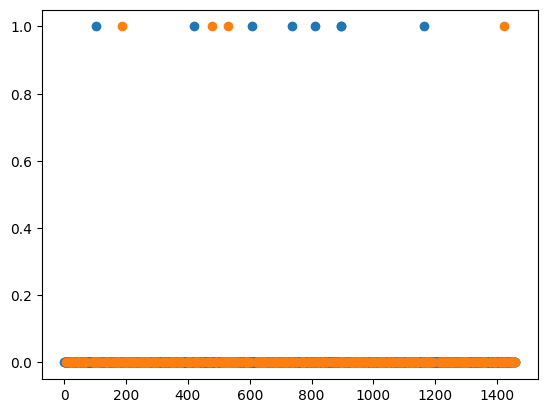

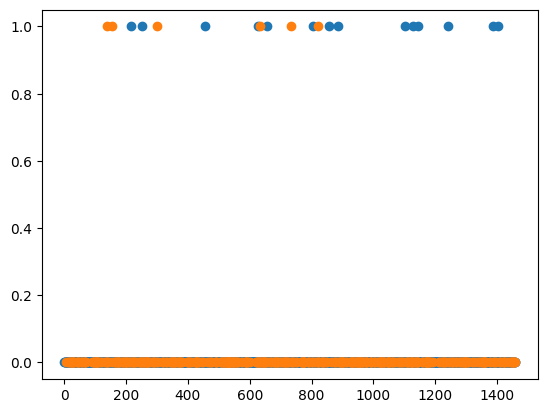

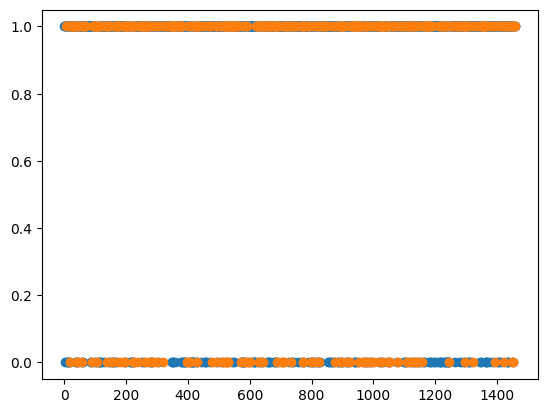

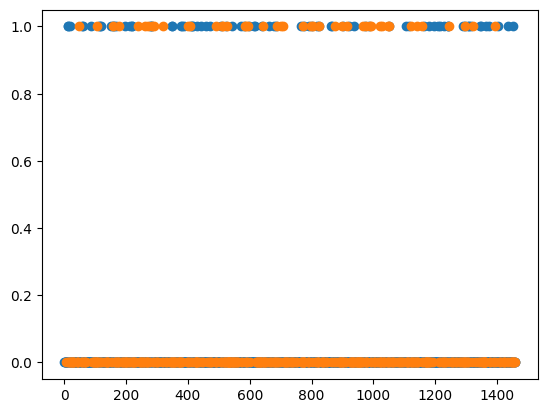

In [136]:
for col in X_train.columns:
    plt.scatter(X_train.index, X_train[col])
    plt.scatter(X_test.index, X_test[col])
    plt.show()

### the test r2 score shows overfitting

## Use RFE to reduce the number of features to 20

In [137]:
from sklearn.feature_selection import RFE

In [138]:
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=20)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 47),
 ('LotArea', True, 1),
 ('LotShape', False, 136),
 ('LandContour', False, 173),
 ('Utilities', False, 16),
 ('LandSlope', False, 193),
 ('OverallQual', True, 1),
 ('OverallCond', False, 5),
 ('YearBuilt', False, 4),
 ('YearRemodAdd', False, 122),
 ('MasVnrArea', False, 8),
 ('ExterQual', True, 1),
 ('ExterCond', False, 108),
 ('BsmtQual', False, 44),
 ('BsmtCond', False, 144),
 ('BsmtExposure', False, 76),
 ('BsmtFinType1', False, 154),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 175),
 ('BsmtFinSF2', False, 31),
 ('BsmtUnfSF', False, 33),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 186),
 ('CentralAir', False, 185),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 165),
 ('BsmtHalfBath', False, 187),
 ('FullBath', False, 84),
 ('HalfBath', False, 82),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 17),
 ('TotRmsAbvGrd', False, 90),
 

In [140]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['LotArea', 'OverallQual', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'PoolQC',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior2nd_CBlock',
       'Heating_OthW'],
      dtype='object')

### Building first linear regression model with RFE selected features

In [141]:
lm = LinearRegression()
lm.fit(X_train[selected_columns], y_train)

LinearRegression()

In [142]:
summary['lr_rfe'] = {}
summary['lr_rfe']['train r2 score'] = r2_score(y_true=y_train, y_pred=y_train_pred)
summary['lr_rfe']['train adj r2 score'] = adj_r2_score(y_train, y_train_pred, X_train)
summary['lr_rfe']['train MSE score'] = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
summary['lr_rfe']['test r2 score'] = r2_score(y_true=y_test, y_pred=y_test_pred)
summary['lr_rfe']['test MSE score'] = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
print('train r2 score', r2_score(y_true=y_train, y_pred=y_train_pred))
print('train adj r2 score', adj_r2_score(y_train, y_train_pred, X_train))
print('train MSE score', mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print('test r2 score', r2_score(y_true=y_test, y_pred=y_test_pred))
print('test MSE score', mean_squared_error(y_true=y_test, y_pred=y_test_pred))

train r2 score 0.9352588011982151
train adj r2 score 0.9181709754921679
train MSE score 0.0007803984673090902
test r2 score -7.156946432127437e+22
test MSE score 8.883979343255111e+20


## Ridge Regression

### with all parameters

In [143]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
#cv
folds = 5
grid_cv = GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
grid_cv.best_params_, grid_cv.best_score_

({'alpha': 7.0}, -0.027857012255830003)

In [145]:
# fitting for best parameter
alpha=7.0
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.36565209e-03  2.00716614e-02 -1.29699930e-03  1.55711436e-02
 -6.82302730e-03  2.00276010e-02  8.45021349e-02  2.60299415e-02
  2.07271348e-03  1.16654589e-02  3.92114074e-02 -2.87928818e-02
 -5.30465852e-04 -3.26108303e-02  5.22254088e-03 -1.94082135e-02
 -1.05991235e-02  2.76810454e-02 -2.26059953e-04  4.98581414e-03
  8.37683167e-03  2.99753173e-02 -2.22795321e-03  1.02415585e-02
  5.02030760e-02  6.99357412e-02 -5.56623050e-03  6.88754776e-02
  3.37863944e-02  4.34101111e-03  3.69621971e-02  1.21845070e-02
  4.18716554e-03 -1.48082711e-02 -3.80090229e-02  4.11885483e-02
  1.68158339e-02  3.12333431e-02 -1.41602715e-02 -1.37062102e-03
 -1.19609641e-02  3.99992632e-02  2.79799083e-02  1.81940556e-03
  6.19549293e-03  3.46504795e-03  1.98733895e-02  7.20127553e-03
  1.97971676e-03  1.33044445e-02  7.81875578e-03 -3.01229362e-03
 -2.87702295e-02  2.46311309e-03 -1.20324499e-03 -4.18983632e-03
 -5.00254004e-03  1.07657012e-03 -4.27977477e-03  8.10982583e-03
 -1.49560061e-02  6.27815

In [146]:
sorted_parameters = sorted(list(zip(X_train.columns, np.round(ridge.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('OverallQual', 0.085),
 ('2ndFlrSF', 0.07),
 ('GrLivArea', 0.069),
 ('Neighborhood_NoRidge', 0.06),
 ('RoofMatl_WdShngl', 0.056),
 ('1stFlrSF', 0.05),
 ('TotRmsAbvGrd', 0.041),
 ('GarageCars', 0.04),
 ('MasVnrArea', 0.039),
 ('KitchenQual', -0.038),
 ('Neighborhood_NridgHt', 0.038),
 ('FullBath', 0.037),
 ('Condition2_PosN', -0.037),
 ('BsmtFullBath', 0.034),
 ('BsmtQual', -0.033),
 ('Fireplaces', 0.031),
 ('TotalBsmtSF', 0.03),
 ('ExterQual', -0.029),
 ('PoolQC', -0.029),
 ('Neighborhood_StoneBr', 0.029),
 ('BsmtFinSF1', 0.028),
 ('GarageArea', 0.028),
 ('OverallCond', 0.026),
 ('Neighborhood_Crawfor', 0.026),
 ('Neighborhood_Edwards', -0.026),
 ('Exterior1st_BrkFace', 0.023),
 ('Exterior2nd_ImStucc', 0.023),
 ('LotArea', 0.02),
 ('LandSlope', 0.02),
 ('WoodDeckSF', 0.02),
 ('BldgType_Twnhs', -0.02),
 ('BsmtExposure', -0.019),
 ('Exterior2nd_Wd Shng', -0.018),
 ('Functional', 0.017),
 ('LandContour', 0.016),
 ('LotConfig_CulDSac', 0.016),
 ('Neighborhood_CollgCr', -0.016),
 ('Neighb

In [147]:
# making prediction and getting metrics
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)
summary['ridge'] = {}
summary['ridge']['train r2 score'] = r2_train
summary['ridge']['train adj r2 score'] = adj_r2_train
summary['ridge']['train MSE score'] = mse_train
summary['ridge']['test r2 score'] = r2_test
summary['ridge']['test MSE score'] = mse_test

r2_train 0.8742309613934397
adj_r2_train 0.841035415887619
mse_train 0.001516035643145854
r2_test 0.8596493718442163
mse_test 0.0017421844541851948


#### this doesnt show any overfitting as the r2 score for train and test data are very close. The difference in r2 score and adjusted r2 score for train data is also less implying no redundant parameters

### With RFE selected parameters

In [148]:
ridge = Ridge()
#cv
folds = 5
grid_cv = GridSearchCV(estimator=ridge,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
grid_cv.fit(X_train[selected_columns], y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [149]:
grid_cv.best_params_, grid_cv.best_score_

({'alpha': 0.1}, -0.03154922590377823)

In [150]:
# fitting for best parameter
alpha=0.1
ridge=Ridge(alpha=alpha)
ridge.fit(X_train[selected_columns], y_train)
print(ridge.coef_)

[ 0.1585718   0.23716218 -0.09144617  0.18992335  0.09722873  0.40245847
  0.14835906  0.02573597 -0.08095438 -0.03396444 -0.52625286  0.53803168
  0.54343676  0.51978594  0.49128011  0.52166394  0.4848825   0.62752334
 -0.06430456 -0.13637513]


In [151]:
sorted_parameters = sorted(list(zip(X_train.columns, np.round(ridge.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('BsmtFinSF1', 0.628),
 ('ExterCond', 0.543),
 ('ExterQual', 0.538),
 ('MasVnrArea', -0.526),
 ('BsmtExposure', 0.522),
 ('BsmtQual', 0.52),
 ('BsmtCond', 0.491),
 ('BsmtFinType1', 0.485),
 ('LandSlope', 0.402),
 ('LotArea', 0.237),
 ('LandContour', 0.19),
 ('LotFrontage', 0.159),
 ('OverallQual', 0.148),
 ('BsmtFinSF2', -0.136),
 ('Utilities', 0.097),
 ('LotShape', -0.091),
 ('YearBuilt', -0.081),
 ('BsmtFinType2', -0.064),
 ('YearRemodAdd', -0.034),
 ('OverallCond', 0.026)]

In [152]:
# making prediction and getting metrics
y_train_pred = ridge.predict(X_train[selected_columns])
y_test_pred = ridge.predict(X_test[selected_columns])

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)
summary['ridge_rfe'] = {}
summary['ridge_rfe']['train r2 score'] = r2_train
summary['ridge_rfe']['train adj r2 score'] = adj_r2_train
summary['ridge_rfe']['train MSE score'] = mse_train
summary['ridge_rfe']['test r2 score'] = r2_test
summary['ridge_rfe']['test MSE score'] = mse_test

r2_train 0.8520697486553914
adj_r2_train 0.8130249611257736
mse_train 0.0017831696594224691
r2_test 0.7814920447416671
mse_test 0.0027123580974950856


## Lasso Regression

### with all parameters

In [153]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()
#cv
folds = 5
grid_cv = GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [154]:
grid_cv.best_params_, grid_cv.best_score_

({'alpha': 0.0001}, -0.02699015829724053)

In [155]:
# fitting for best parameter
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.00000000e+00  1.90642642e-02  0.00000000e+00  1.53788389e-02
 -0.00000000e+00  2.42482585e-02  1.38101263e-01  3.61039980e-02
  0.00000000e+00  5.09501212e-03  4.82295146e-02 -2.13217387e-02
  0.00000000e+00 -2.68980431e-02  5.77084588e-03 -1.71726980e-02
 -1.07036139e-02  1.49375474e-02  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -1.13507627e-03  7.75689402e-03
  0.00000000e+00  4.99996807e-02 -1.61844146e-02  3.35077024e-01
  3.84633276e-02  0.00000000e+00  1.28605773e-02  4.37254020e-04
 -0.00000000e+00 -3.02279958e-02 -3.31927303e-02  2.23215199e-03
  1.64034107e-02  1.62395865e-02 -1.00676526e-02  0.00000000e+00
 -1.14011060e-02  5.45956379e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  9.91236201e-04  1.18003042e-02  1.69784015e-03
 -0.00000000e+00  3.76982424e-03  5.92606915e-03 -4.80748280e-02
 -7.54144509e-02  2.69772474e-03 -0.00000000e+00 -3.80116118e-03
 -3.30955584e-03  0.00000000e+00  0.00000000e+00  5.57303430e-03
 -8.16242325e-03  0.00000

In [156]:
sorted_parameters = sorted(list(zip(X_train.columns, np.round(lasso.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('GrLivArea', 0.335),
 ('Condition2_PosN', -0.287),
 ('RoofMatl_WdShngl', 0.144),
 ('OverallQual', 0.138),
 ('PoolQC', -0.075),
 ('Neighborhood_NoRidge', 0.058),
 ('GarageCars', 0.055),
 ('2ndFlrSF', 0.05),
 ('MasVnrArea', 0.048),
 ('PoolArea', -0.048),
 ('Neighborhood_NridgHt', 0.048),
 ('BsmtFullBath', 0.038),
 ('OverallCond', 0.036),
 ('KitchenQual', -0.033),
 ('KitchenAbvGr', -0.03),
 ('Neighborhood_StoneBr', 0.03),
 ('RoofMatl_CompShg', 0.03),
 ('Neighborhood_Crawfor', 0.029),
 ('BsmtQual', -0.027),
 ('BldgType_Twnhs', -0.027),
 ('Exterior1st_BrkFace', 0.025),
 ('LandSlope', 0.024),
 ('Exterior2nd_ImStucc', 0.022),
 ('ExterQual', -0.021),
 ('BldgType_TwnhsE', -0.021),
 ('Neighborhood_Somerst', 0.02),
 ('Exterior2nd_Stucco', -0.02),
 ('Exterior2nd_Wd Shng', -0.02),
 ('LotArea', 0.019),
 ('BsmtExposure', -0.017),
 ('LotConfig_CulDSac', 0.017),
 ('Neighborhood_Edwards', -0.017),
 ('LowQualFinSF', -0.016),
 ('Functional', 0.016),
 ('Fireplaces', 0.016),
 ('HouseStyle_1Story', 0.016),

In [157]:
# making prediction and getting metrics
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)
summary['lasso'] = {}
summary['lasso']['train r2 score'] = r2_train
summary['lasso']['train adj r2 score'] = adj_r2_train
summary['lasso']['train MSE score'] = mse_train
summary['lasso']['test r2 score'] = r2_test
summary['lasso']['test MSE score'] = mse_test

r2_train 0.8929271919300361
adj_r2_train 0.8646663392424249
mse_train 0.001290668953537767
r2_test 0.853101802913059
mse_test 0.0018234599921322474


#### this also doesnt show any overfitting as the r2 score for train and test data are very close. The difference in r2 score and adjusted r2 score for train data is also less implying no redundant parameters

### With RFE selected parameters

In [158]:
lasso = Lasso()
#cv
folds = 5
grid_cv = GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
grid_cv.fit(X_train[selected_columns], y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [159]:
grid_cv.best_params_, grid_cv.best_score_

({'alpha': 0.0001}, -0.03201793622404194)

In [160]:
# fitting for best parameter
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train[selected_columns], y_train)
print(lasso.coef_)

[ 0.12439993  0.26714685 -0.08682258  0.14767379  0.01225476  0.42260834
  0.13937336  0.         -0.07019803 -0.         -0.42638736  0.0838954
  0.04274482  0.0162468   0.          0.06243948  0.01900124  0.17936017
 -0.         -0.05276733]


In [161]:
sorted_parameters = sorted(list(zip(X_train.columns, np.round(lasso.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('MasVnrArea', -0.426),
 ('LandSlope', 0.423),
 ('LotArea', 0.267),
 ('BsmtFinSF1', 0.179),
 ('LandContour', 0.148),
 ('OverallQual', 0.139),
 ('LotFrontage', 0.124),
 ('LotShape', -0.087),
 ('ExterQual', 0.084),
 ('YearBuilt', -0.07),
 ('BsmtExposure', 0.062),
 ('BsmtFinSF2', -0.053),
 ('ExterCond', 0.043),
 ('BsmtFinType1', 0.019),
 ('BsmtQual', 0.016),
 ('Utilities', 0.012),
 ('OverallCond', 0.0),
 ('YearRemodAdd', -0.0),
 ('BsmtCond', 0.0),
 ('BsmtFinType2', -0.0)]

In [162]:
# making prediction and getting metrics
y_train_pred = lasso.predict(X_train[selected_columns])
y_test_pred = lasso.predict(X_test[selected_columns])

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)
summary['lasso_rfe'] = {}
summary['lasso_rfe']['train r2 score'] = r2_train
summary['lasso_rfe']['train adj r2 score'] = adj_r2_train
summary['lasso_rfe']['train MSE score'] = mse_train
summary['lasso_rfe']['test r2 score'] = r2_test
summary['lasso_rfe']['test MSE score'] = mse_test

r2_train 0.8068567931539793
adj_r2_train 0.7558784746184125
mse_train 0.0023281722517260795
r2_test 0.7883233173023486
mse_test 0.0026275609219219833


# Summary of different models

In [163]:
summary_df = pd.DataFrame.from_dict(summary)
summary_df

lr        lr_rfe     ridge  ridge_rfe     lasso  \
train r2 score      9.352588e-01  9.352588e-01  0.874231   0.852070  0.892927   
train adj r2 score  9.181710e-01  9.181710e-01  0.841035   0.813025  0.864666   
train MSE score     7.803985e-04  7.803985e-04  0.001516   0.001783  0.001291   
test r2 score      -7.156946e+22 -7.156946e+22  0.859649   0.781492  0.853102   
test MSE score      8.883979e+20  8.883979e+20  0.001742   0.002712  0.001823   

                    lasso_rfe  
train r2 score       0.806857  
train adj r2 score   0.755878  
train MSE score      0.002328  
test r2 score        0.788323  
test MSE score       0.002628

#### with above summary, 
- the best model is ridge as it has very close train and test r2 score and adjusted r2 score is also good. 
- Here RFE did not help much as most of the models with RFE have lower r2 score. This could be because of RFE done using Linear Regression rather than ridge/lasso which is not correct
- RFE with Ridge/Lasso can result in better feature selection.

# Best 5 parameters affecting the Sales Price are(Using Ridge):

('OverallQual', 0.085),
 ('2ndFlrSF', 0.07),
 ('GrLivArea', 0.069),
 ('Neighborhood_NoRidge', 0.06),
 ('RoofMatl_WdShngl', 0.056)

# 5. Questions Solved

## Question 1: doubling alpha

In [165]:
# fitting for best parameter
alpha=7.0*2
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

sorted_parameters = sorted(list(zip(X_train.columns, np.round(ridge.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('OverallQual', 0.068),
 ('Neighborhood_NoRidge', 0.056),
 ('GrLivArea', 0.054),
 ('2ndFlrSF', 0.052),
 ('1stFlrSF', 0.04),
 ('KitchenQual', -0.039),
 ('TotRmsAbvGrd', 0.039),
 ('GarageCars', 0.036),
 ('RoofMatl_WdShngl', 0.036),
 ('FullBath', 0.035),
 ('Fireplaces', 0.034),
 ('BsmtQual', -0.033),
 ('Neighborhood_NridgHt', 0.033),
 ('MasVnrArea', 0.032),
 ('ExterQual', -0.031),
 ('BsmtFullBath', 0.029),
 ('GarageArea', 0.029),
 ('TotalBsmtSF', 0.026),
 ('Neighborhood_Edwards', -0.024),
 ('BsmtFinSF1', 0.023),
 ('Neighborhood_Crawfor', 0.022),
 ('Neighborhood_StoneBr', 0.022),
 ('OverallCond', 0.02),
 ('BsmtExposure', -0.02),
 ('WoodDeckSF', 0.019),
 ('Condition2_PosN', -0.019),
 ('Exterior1st_BrkFace', 0.019),
 ('PoolQC', -0.018),
 ('Neighborhood_Gilbert', -0.018),
 ('BldgType_Twnhs', -0.017),
 ('Neighborhood_CollgCr', -0.016),
 ('Exterior2nd_ImStucc', 0.016),
 ('LotArea', 0.015),
 ('LandSlope', 0.015),
 ('FireplaceQu', -0.015),
 ('LotConfig_CulDSac', 0.015),
 ('BldgType_TwnhsE', -0.0

In [166]:
# fitting for best parameter
alpha=0.0001*2
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

sorted_parameters = sorted(list(zip(X_train.columns, np.round(lasso.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('GrLivArea', 0.309),
 ('Condition2_PosN', -0.159),
 ('OverallQual', 0.146),
 ('RoofMatl_WdShngl', 0.104),
 ('Neighborhood_NoRidge', 0.066),
 ('GarageCars', 0.051),
 ('Neighborhood_NridgHt', 0.047),
 ('2ndFlrSF', 0.038),
 ('BsmtFullBath', 0.038),
 ('MasVnrArea', 0.036),
 ('KitchenQual', -0.035),
 ('OverallCond', 0.028),
 ('BsmtQual', -0.028),
 ('Neighborhood_Crawfor', 0.027),
 ('Neighborhood_StoneBr', 0.023),
 ('BldgType_Twnhs', -0.023),
 ('Fireplaces', 0.022),
 ('Exterior1st_BrkFace', 0.021),
 ('LandSlope', 0.02),
 ('ExterQual', -0.02),
 ('Neighborhood_Somerst', 0.02),
 ('BldgType_TwnhsE', -0.019),
 ('BsmtExposure', -0.018),
 ('KitchenAbvGr', -0.018),
 ('LotConfig_CulDSac', 0.016),
 ('Neighborhood_Edwards', -0.015),
 ('LandContour', 0.014),
 ('Exterior2nd_Wd Shng', -0.014),
 ('FullBath', 0.013),
 ('Functional', 0.013),
 ('GarageFinish', -0.013),
 ('Condition1_Norm', 0.013),
 ('SaleType_New', 0.013),
 ('BsmtFinType1', -0.012),
 ('MSSubClass_1_ST_1946_NEW', 0.011),
 ('HouseStyle_1Story

## Question 2: which lambda/alpha?

In [167]:
# fitting for best parameter
print('ALPHA/LAMBDA:7.0')
alpha=7.0
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

alpha=7.0
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# making prediction and getting metrics
print('------RIDGE')
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)

print('------LASSO')
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)

ALPHA/LAMBDA:7.0
------RIDGE
r2_train 0.8742309613934397
adj_r2_train 0.841035415887619
mse_train 0.001516035643145854
r2_test 0.8596493718442163
mse_test 0.0017421844541851948
------LASSO
r2_train 0.0
adj_r2_train -0.2639405204460967
mse_train 0.012054124448612707
r2_test -0.00016684167717184728
mse_test 0.012415157281856942


In [168]:
# fitting for best parameter
print('ALPHA/LAMBDA:0.0001')
alpha=0.0001
ridge=Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# making prediction and getting metrics
print('------RIDGE')
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)

print('------LASSO')
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adj_r2_score(y_train, y_train_pred, X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print('r2_train', r2_train)
print('adj_r2_train', adj_r2_train)
print('mse_train', mse_train)
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('r2_test', r2_test)
print('mse_test', mse_test)

ALPHA/LAMBDA:0.0001
------RIDGE
r2_train 0.9365241689905095
adj_r2_train 0.9197703251181161
mse_train 0.000765145566467508
r2_test 0.8204366681523325
mse_test 0.002228935127668056
------LASSO
r2_train 0.8929271919300361
adj_r2_train 0.8646663392424249
mse_train 0.001290668953537767
r2_test 0.853101802913059
mse_test 0.0018234599921322474


## Question 3: important predictor in lasso after removing best 5 predictors?

In [169]:
lasso_top_5_pred = ['GrLivArea', 'Condition2_PosN', 'RoofMatl_WdShngl', 'OverallQual', 'PoolQC']

In [170]:
lasso = Lasso()
#cv
folds = 5
grid_cv = GridSearchCV(estimator=lasso,
                      param_grid=params,
                      scoring='neg_mean_absolute_error',
                      cv=folds,
                      return_train_score=True,
                      verbose=1)
grid_cv.fit(X_train.drop(lasso_top_5_pred, axis=1), y_train)
grid_cv.best_params_, grid_cv.best_score_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


({'alpha': 0.0001}, -0.029135926257110423)

In [171]:
alpha=0.0001
lasso=Lasso(alpha=alpha)
lasso.fit(X_train.drop(lasso_top_5_pred, axis=1), y_train)

sorted_parameters = sorted(list(zip(X_train.drop(lasso_top_5_pred, axis=1).columns, np.round(lasso.coef_,3))), key=lambda x: abs(x[1]), reverse=True)
sorted_parameters

[('1stFlrSF', 0.279),
 ('2ndFlrSF', 0.198),
 ('Neighborhood_NoRidge', 0.071),
 ('GarageCars', 0.066),
 ('Neighborhood_NridgHt', 0.058),
 ('Neighborhood_StoneBr', 0.053),
 ('OverallCond', 0.041),
 ('BsmtFullBath', 0.041),
 ('KitchenQual', -0.041),
 ('TotalBsmtSF', 0.04),
 ('MasVnrArea', 0.039),
 ('KitchenAbvGr', -0.038),
 ('LotArea', 0.037),
 ('BsmtQual', -0.035),
 ('ExterQual', -0.033),
 ('Neighborhood_Crawfor', 0.033),
 ('BldgType_Twnhs', -0.032),
 ('Neighborhood_Somerst', 0.029),
 ('Neighborhood_Edwards', -0.028),
 ('Exterior1st_BrkFace', 0.028),
 ('Exterior2nd_ImStucc', 0.028),
 ('Fireplaces', 0.027),
 ('Functional', 0.025),
 ('Neighborhood_Veenker', 0.025),
 ('BldgType_TwnhsE', -0.025),
 ('FullBath', 0.02),
 ('BsmtExposure', -0.019),
 ('LandContour', 0.017),
 ('WoodDeckSF', 0.017),
 ('HouseStyle_2Story', -0.017),
 ('LotFrontage', -0.016),
 ('LandSlope', 0.016),
 ('FireplaceQu', -0.015),
 ('Neighborhood_OldTown', -0.015),
 ('Condition1_Norm', 0.015),
 ('HouseStyle_1.5Unf', 0.015),
 